### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
pd.pandas.set_option('display.max_columns', None)
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import scipy.stats as stats
import statsmodels.stats.api as sms
from sklearn.datasets import make_regression
from scipy import stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr



#### Importing csv file and using the selected features as the subset for feature interpretation

In [2]:
kclr = pd.read_csv('kc_train.csv')
subset = ['bedrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'year', 'month', 'day',
       'yr_age_of_house', 'yr_age_of_renovation', 'price_in_millions']
kclr1 = kclr.loc[:, subset] 
kclr1.head() 

bedrooms  sqft_living  floors  waterfront  view  condition  grade  \
0   0.06250     0.322166     0.0         0.0   0.0        0.5    0.4   
1   0.06250     0.538392     0.4         0.0   0.0        0.5    0.4   
2   0.03125     0.203585     0.0         0.0   0.0        0.5    0.3   
3   0.09375     0.463123     0.0         0.0   0.0        1.0    0.4   
4   0.06250     0.420302     0.0         0.0   0.0        0.5    0.5   

   sqft_above  sqft_basement  yr_built   zipcode       lat      long  \
0    0.358392       0.000000  0.478261  0.893939  0.571498  0.217608   
1    0.546652       0.082988  0.443478  0.626263  0.908959  0.166113   
2    0.226478       0.000000  0.286957  0.136364  0.936143  0.237542   
3    0.322322       0.188797  0.565217  0.681818  0.586939  0.104651   
4    0.467563       0.000000  0.756522  0.368687  0.741354  0.393688   

   sqft_living15  sqft_lot15  year     month       day  yr_age_of_house  \
0       0.441342    0.300162   0.0  0.818182  0.400000         0.517241   
1       0.525882    0.342058   0.0  1.000000  0.266667         0.551724   
2       0.699256    0.349544   1.0  0.090909  0.800000         0.715517   
3       0.446739    0.283185   0.0  1.000000  0.266667         0.431034   
4       0.548854    0.339562   1.0  0.090909  0.566667         0.250000   

   yr_age_of_renovation  price_in_millions  
0              0.000000           0.018880  
1              0.350877           0.060352  
2              0.000000           0.013382  
3              0.192982           0.069011  
4              0.122807           0.056678

#### Creating histogram and check the shape to see if it is uniform or not

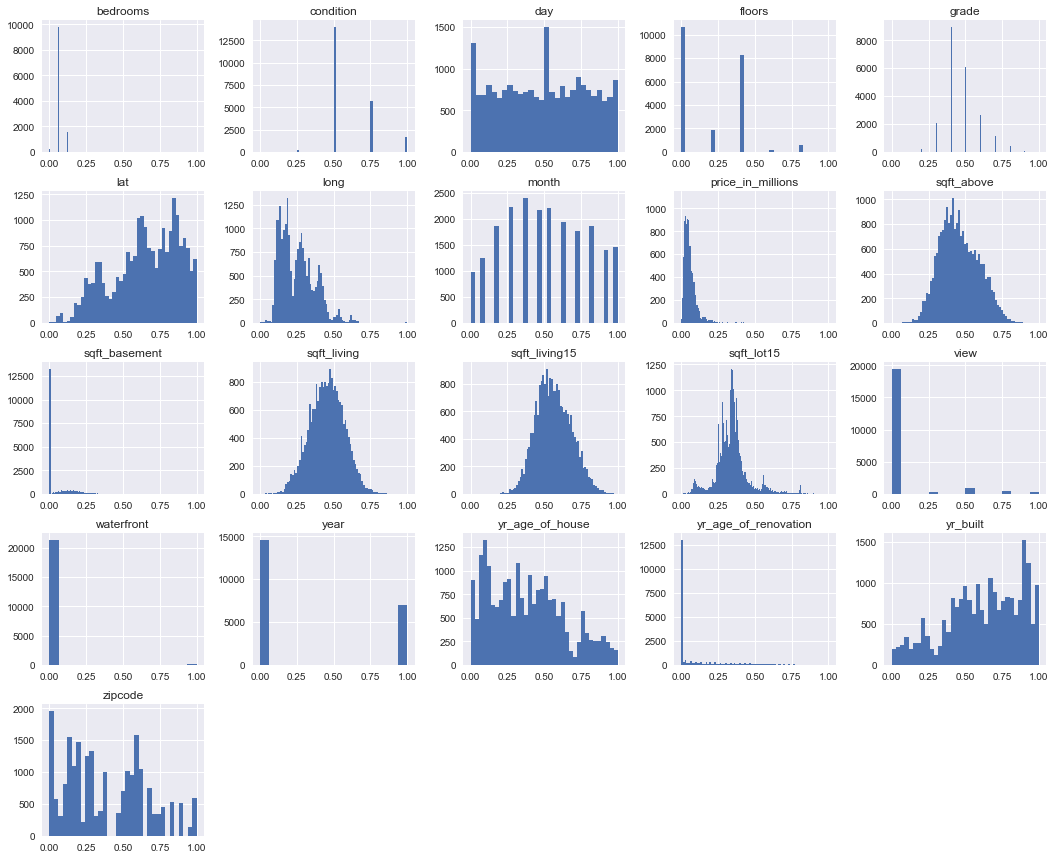

In [3]:
kclr1.hist(figsize=(18,15), bins='auto');

#### Observations
* The newer built and renovated houses were sold the most
* The lower valued houses has been sold the maximum
* Sqft_living, sqft_living15 & Sqft_lot15, grade are concentrated towards the center
* Average or better condition has an influence in the house being sold
* The house with view and water front has an higher price and lower volume of sales


#### Check the linearity assumption for all chosen features with target variable using scatter plots

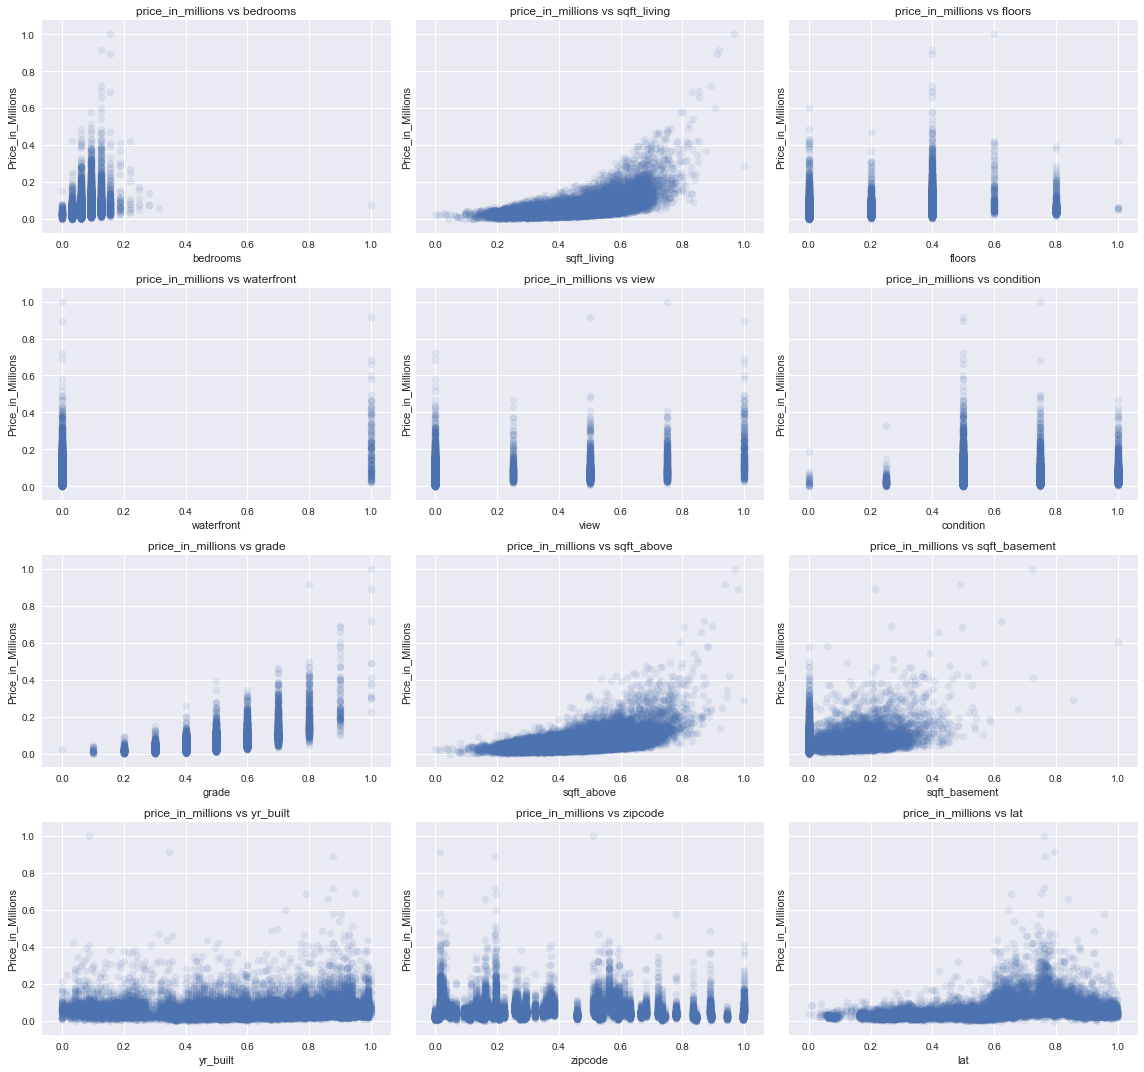

In [4]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), kclr1.columns):
    ax.scatter(kclr1[column], kclr1['price_in_millions'], label=column, alpha=.1)
    ax.set_title(f'price_in_millions vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price_in_Millions')

fig.tight_layout()

Kings County Housing Data - Regression Analysis and Diagnostics for price_in_millions~bedrooms
-------------------------------------------------------------------------------------


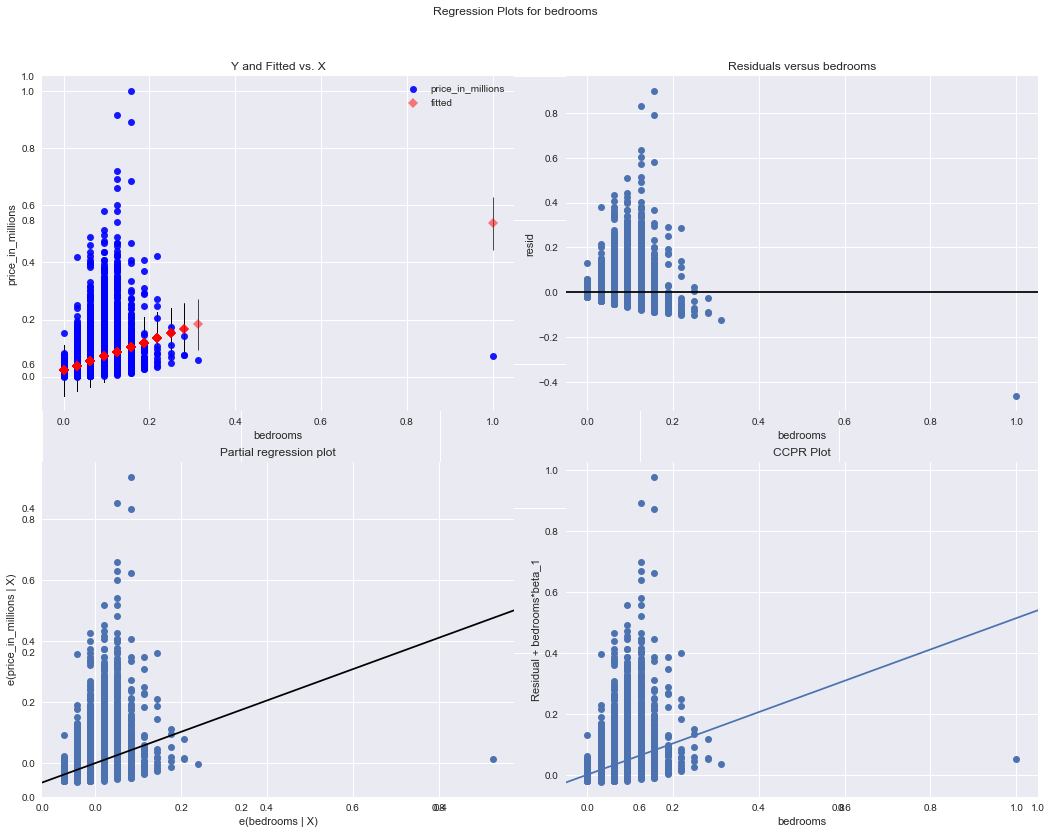

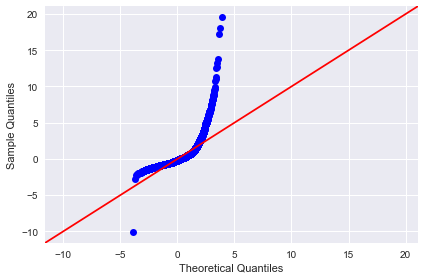

Kings County Housing Data - Regression Analysis and Diagnostics for price_in_millions~sqft_living
-------------------------------------------------------------------------------------


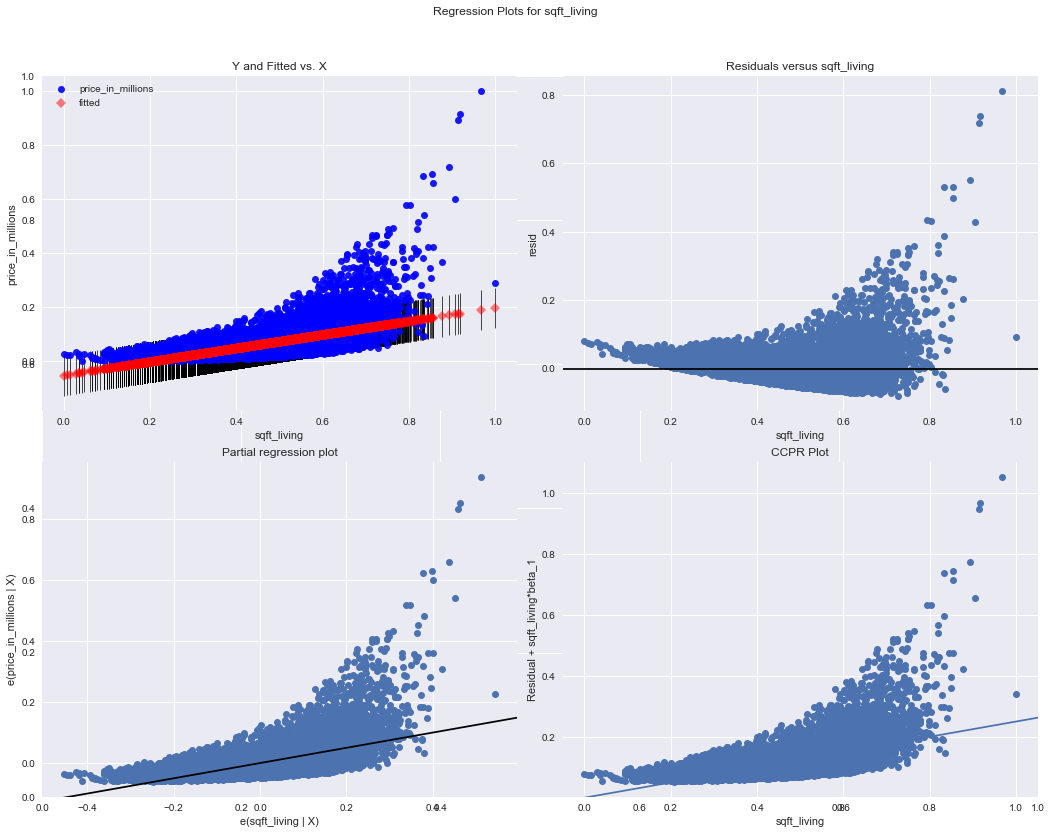

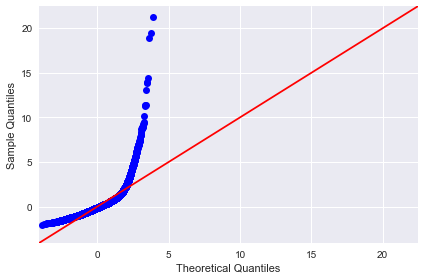

Kings County Housing Data - Regression Analysis and Diagnostics for price_in_millions~floors
-------------------------------------------------------------------------------------


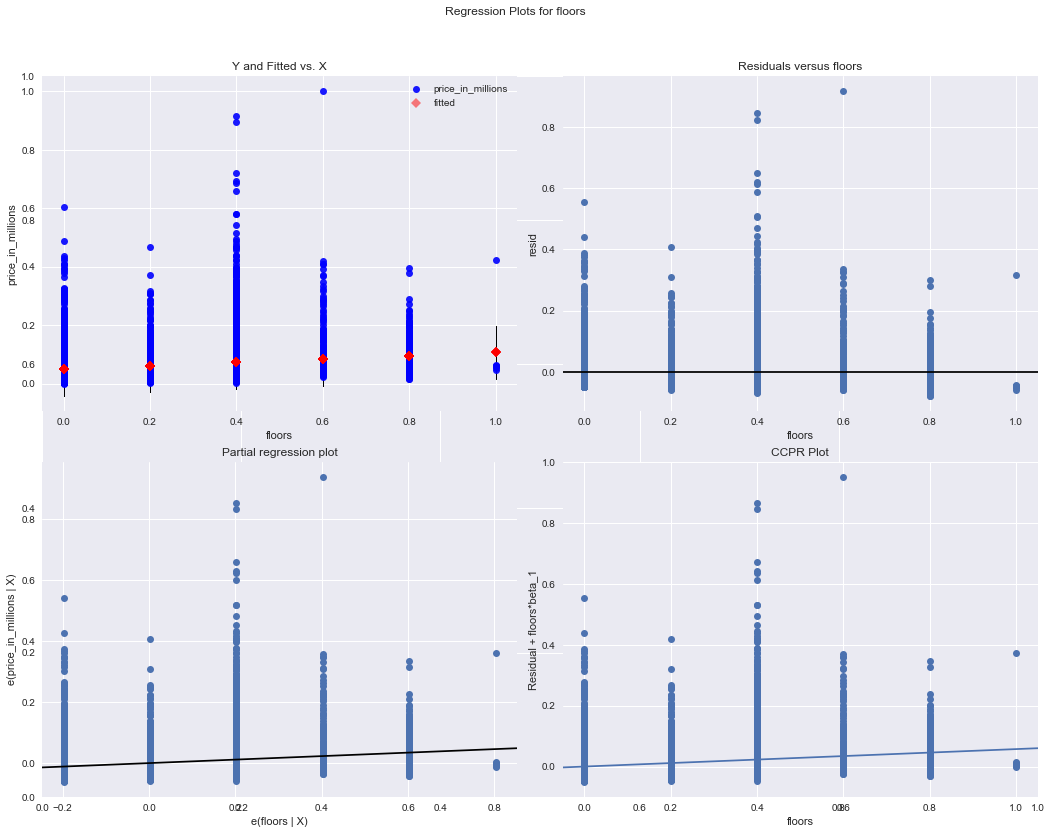

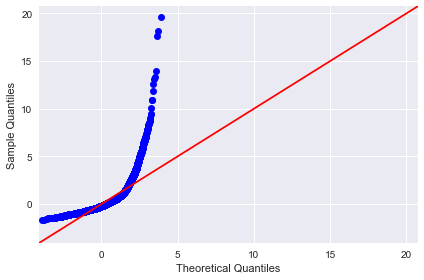

Kings County Housing Data - Regression Analysis and Diagnostics for price_in_millions~waterfront
-------------------------------------------------------------------------------------


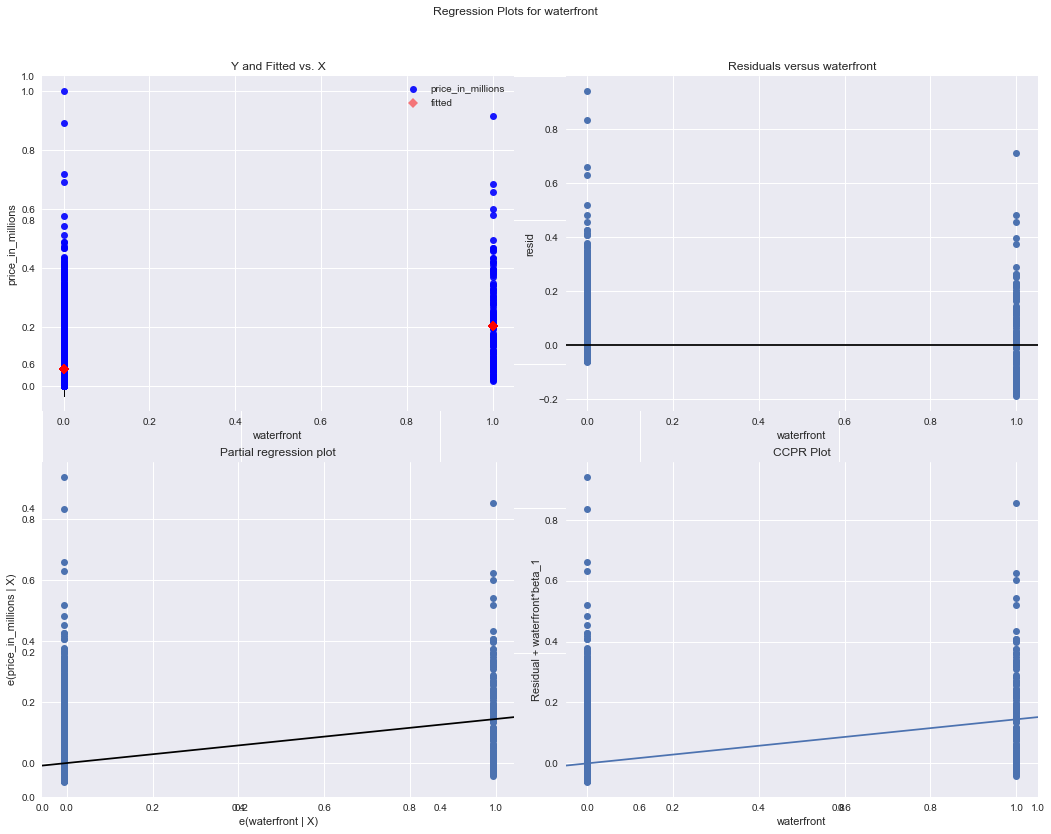

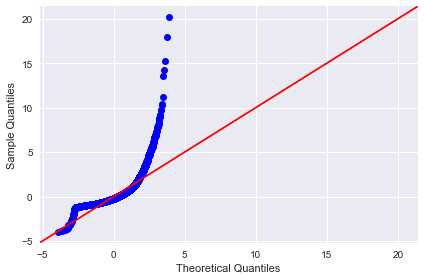

Kings County Housing Data - Regression Analysis and Diagnostics for price_in_millions~view
-------------------------------------------------------------------------------------


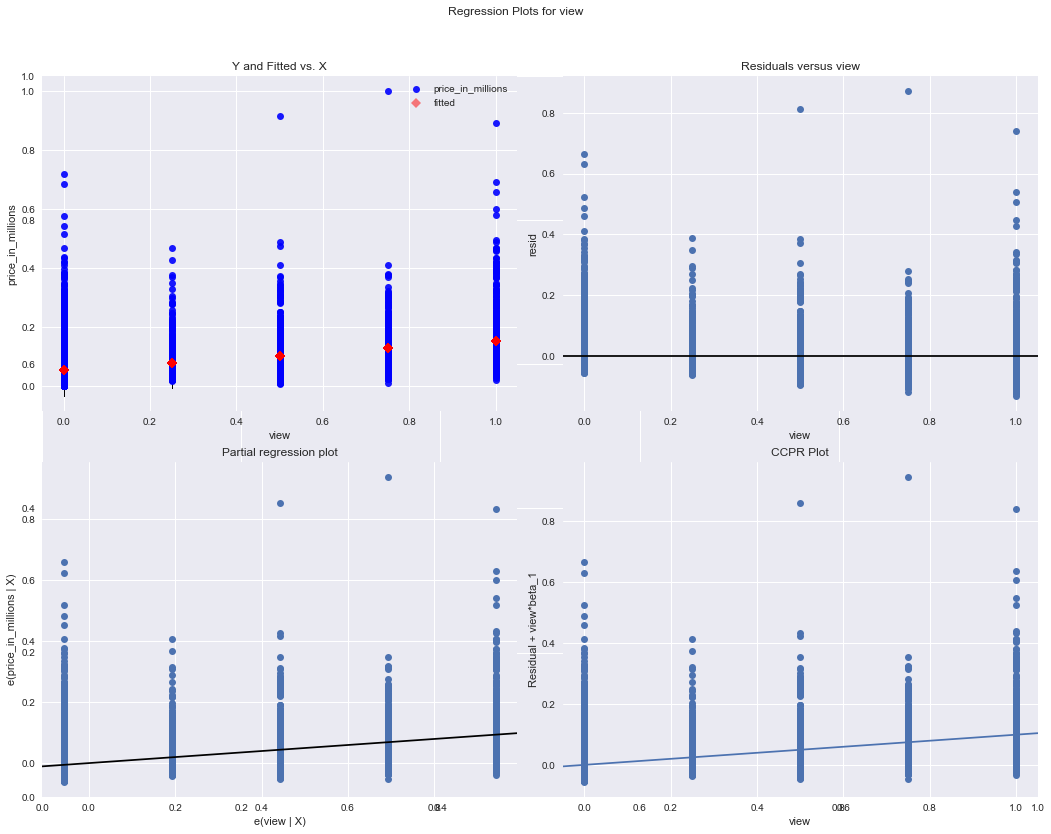

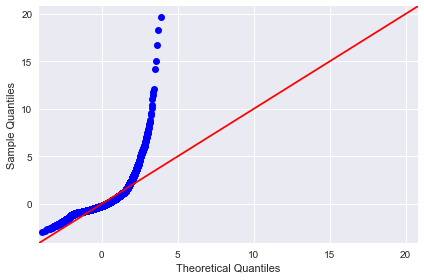

Kings County Housing Data - Regression Analysis and Diagnostics for price_in_millions~condition
-------------------------------------------------------------------------------------


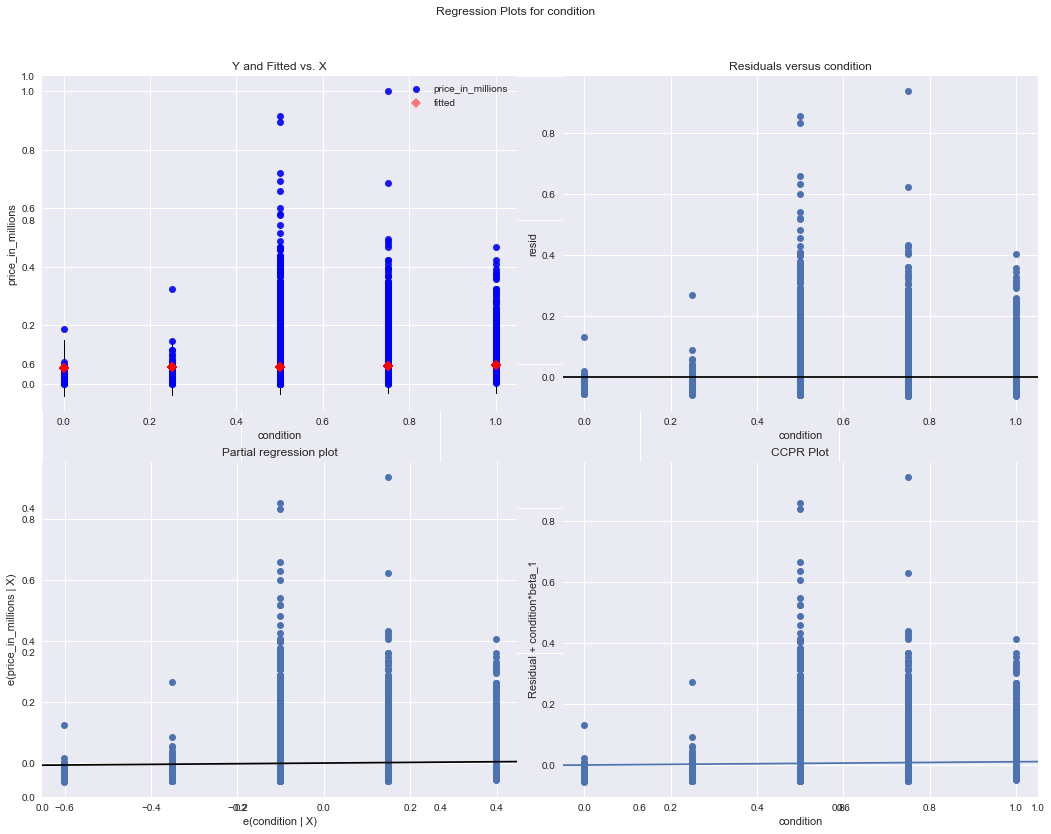

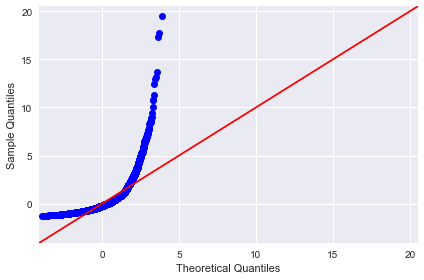

Kings County Housing Data - Regression Analysis and Diagnostics for price_in_millions~grade
-------------------------------------------------------------------------------------


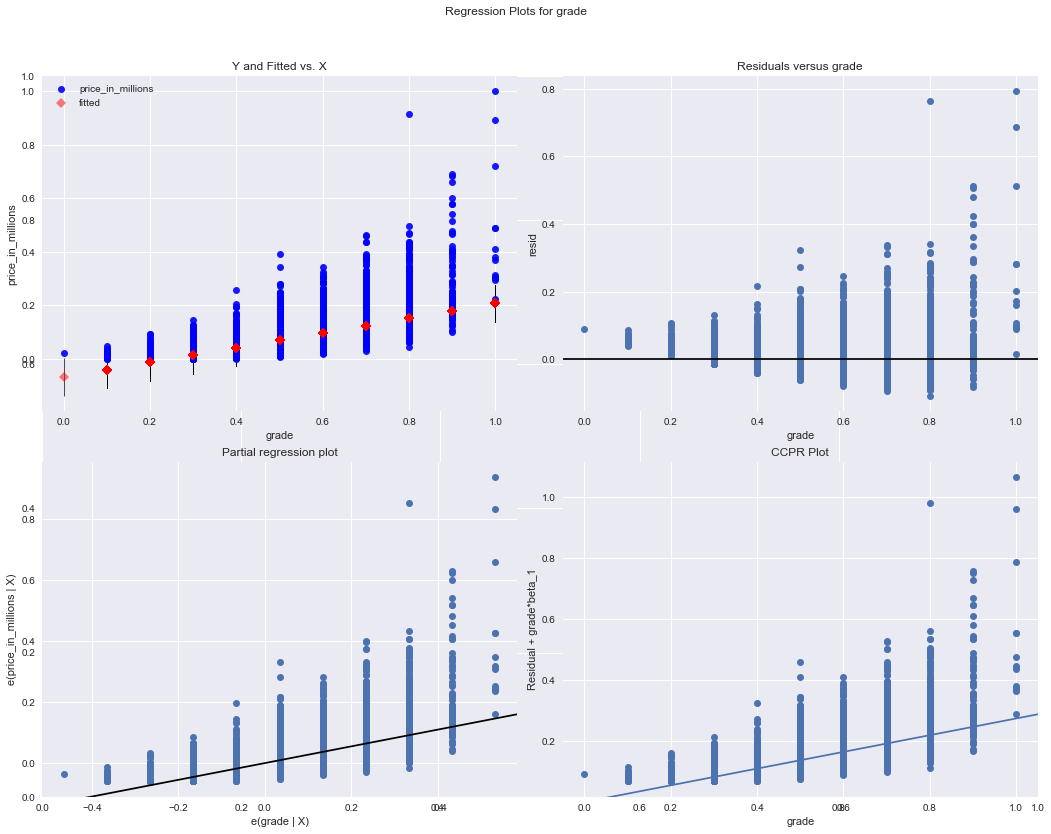

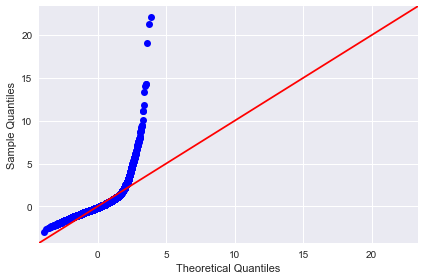

Kings County Housing Data - Regression Analysis and Diagnostics for price_in_millions~sqft_above
-------------------------------------------------------------------------------------


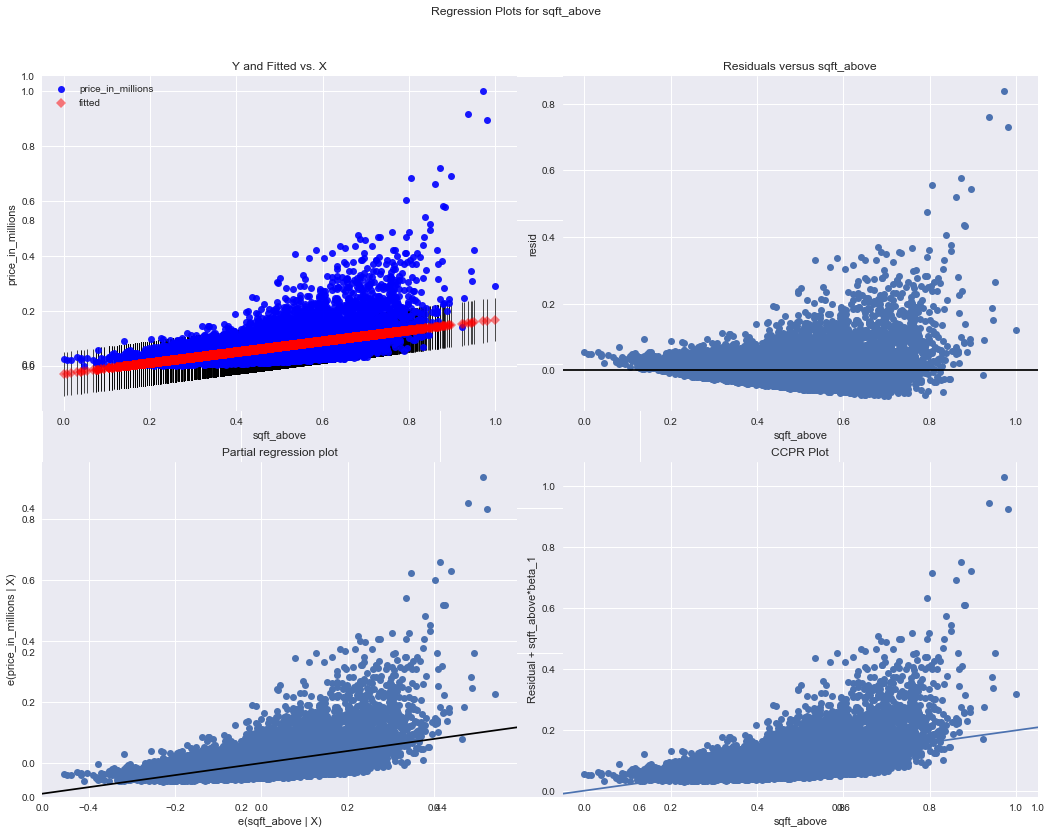

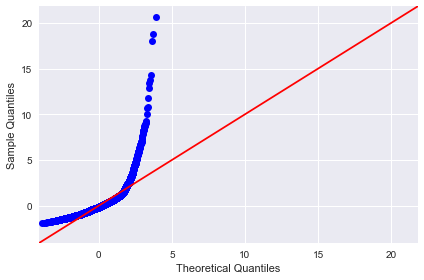

Kings County Housing Data - Regression Analysis and Diagnostics for price_in_millions~sqft_basement
-------------------------------------------------------------------------------------


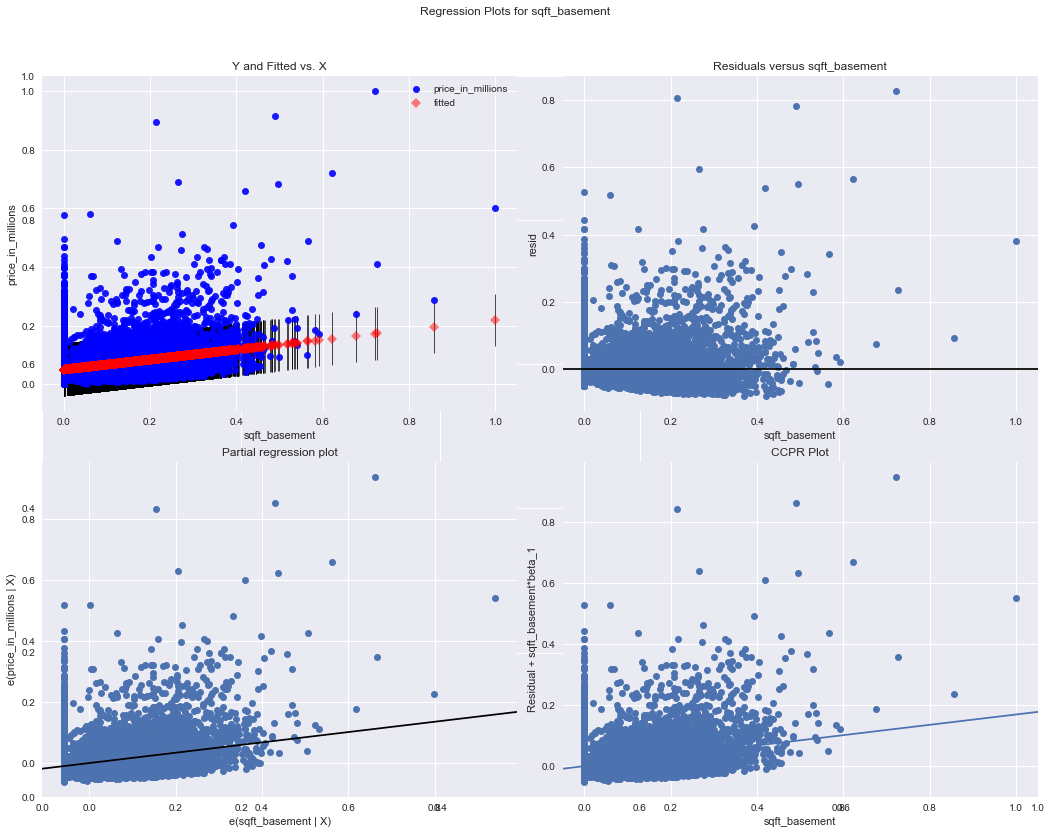

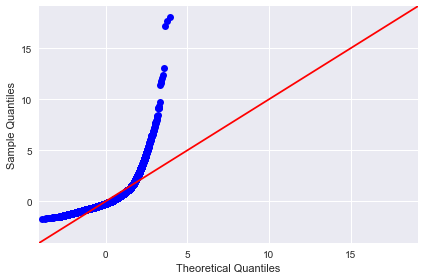

Kings County Housing Data - Regression Analysis and Diagnostics for price_in_millions~yr_built
-------------------------------------------------------------------------------------


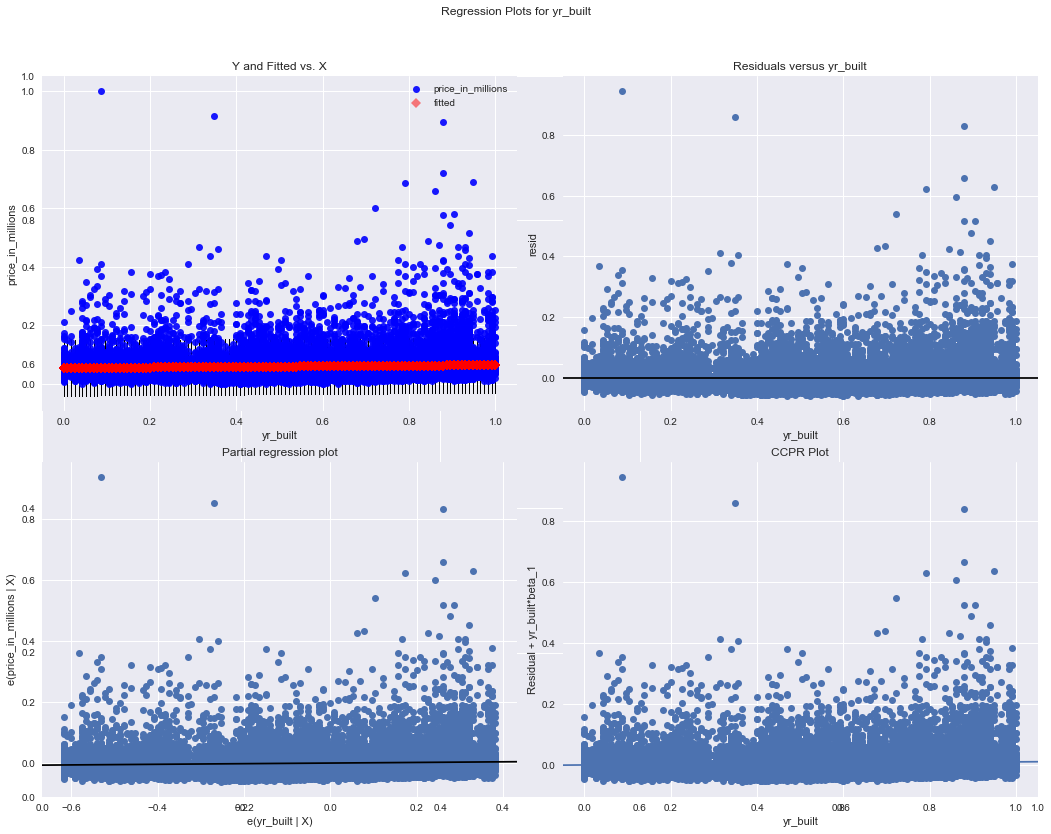

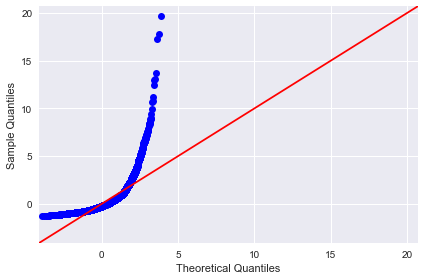

Kings County Housing Data - Regression Analysis and Diagnostics for price_in_millions~zipcode
-------------------------------------------------------------------------------------


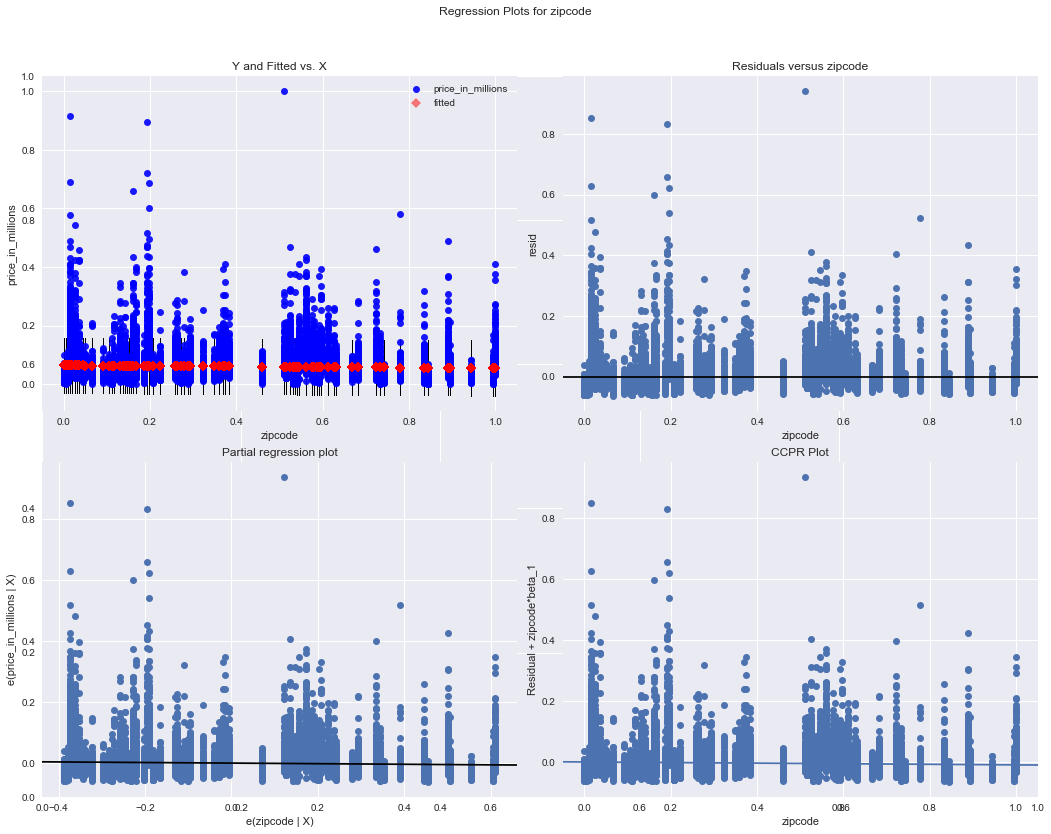

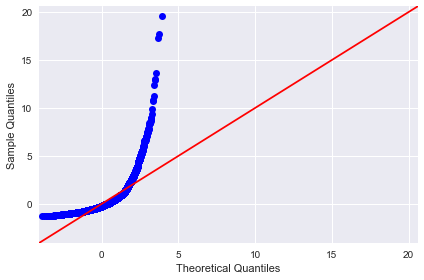

Kings County Housing Data - Regression Analysis and Diagnostics for price_in_millions~lat
-------------------------------------------------------------------------------------


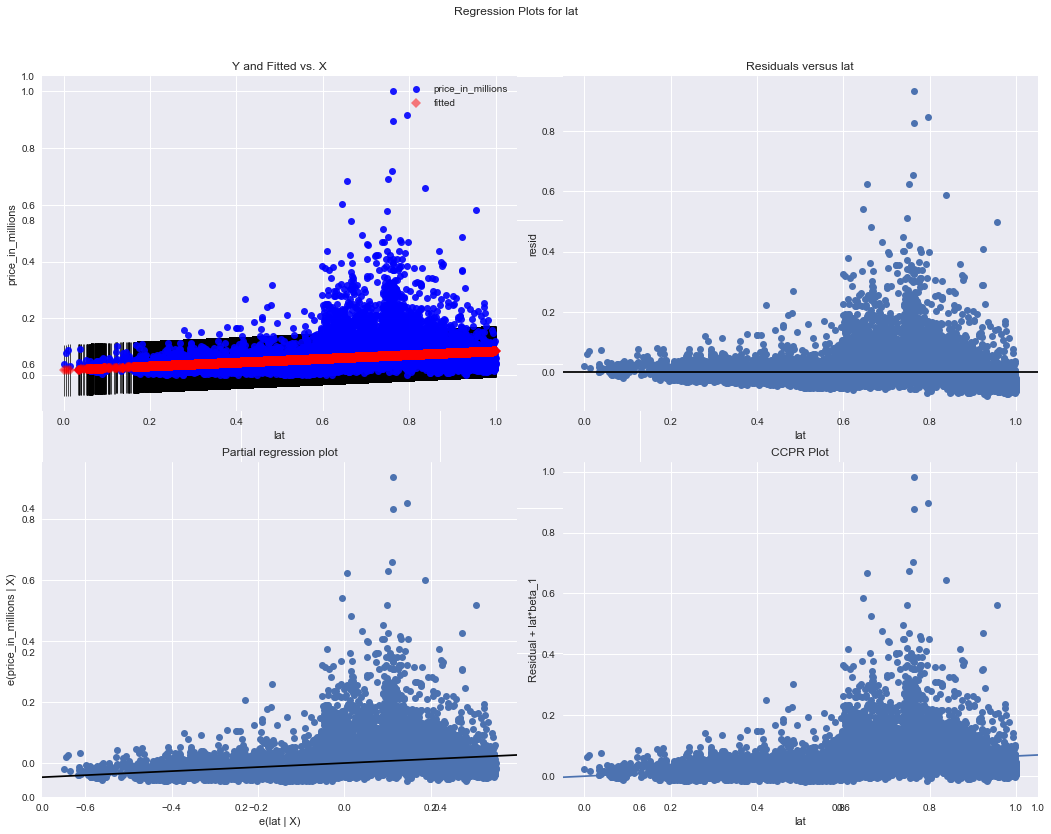

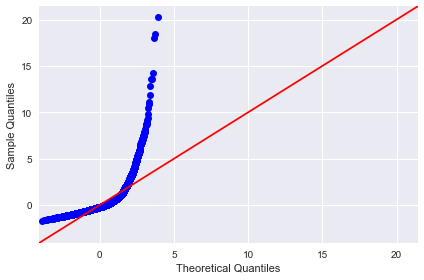

Kings County Housing Data - Regression Analysis and Diagnostics for price_in_millions~long
-------------------------------------------------------------------------------------


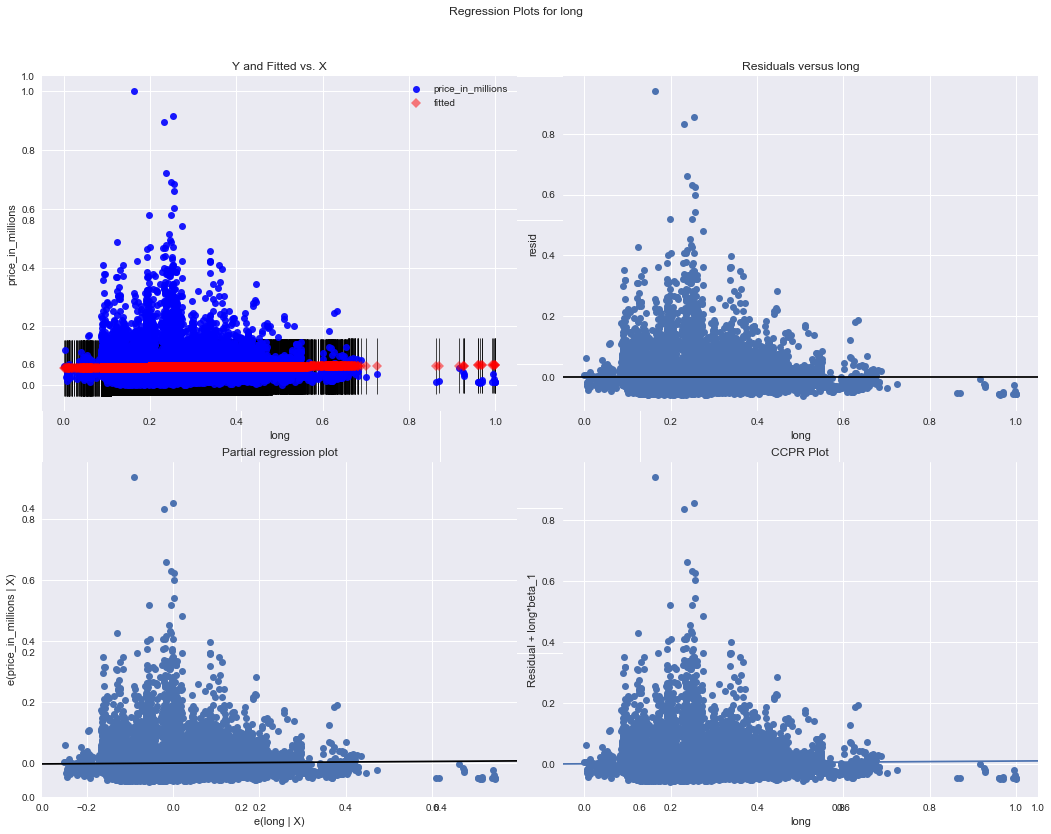

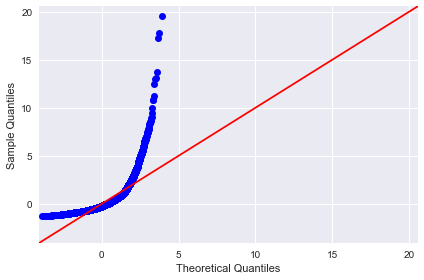

Kings County Housing Data - Regression Analysis and Diagnostics for price_in_millions~sqft_living15
-------------------------------------------------------------------------------------


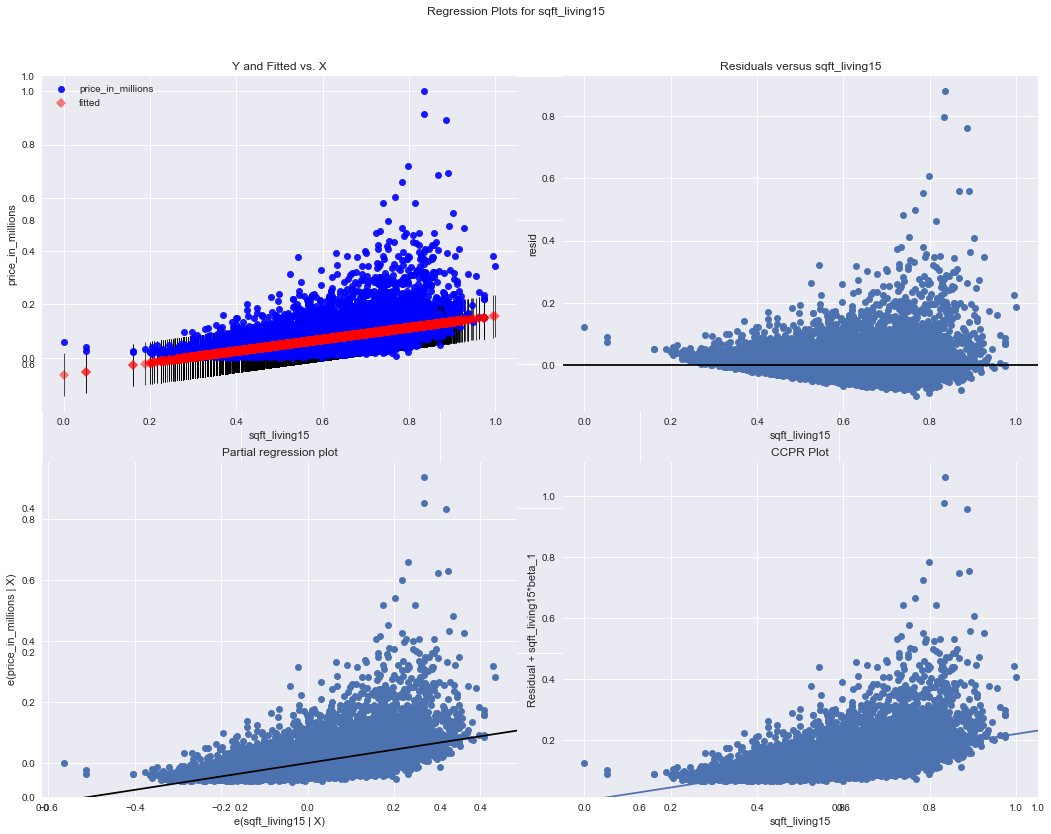

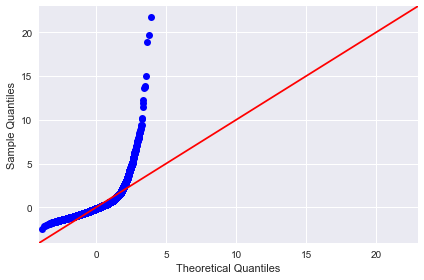

Kings County Housing Data - Regression Analysis and Diagnostics for price_in_millions~sqft_lot15
-------------------------------------------------------------------------------------


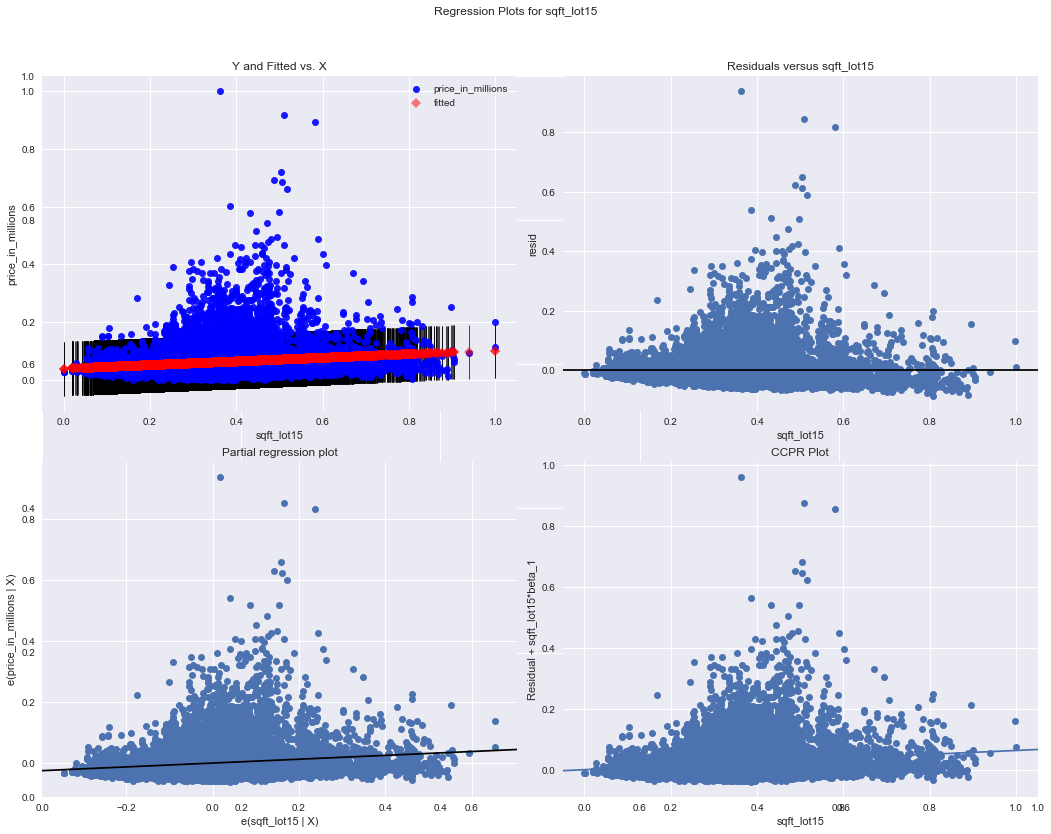

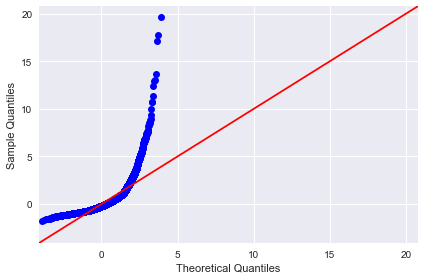

Kings County Housing Data - Regression Analysis and Diagnostics for price_in_millions~year
-------------------------------------------------------------------------------------


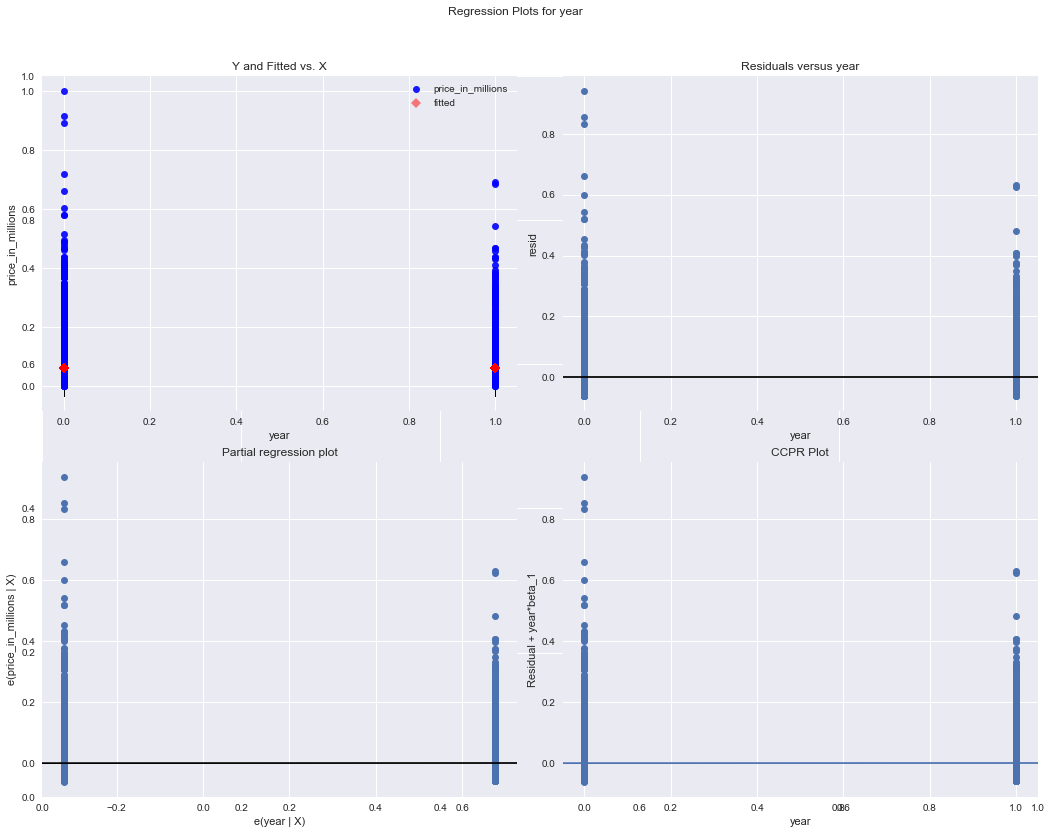

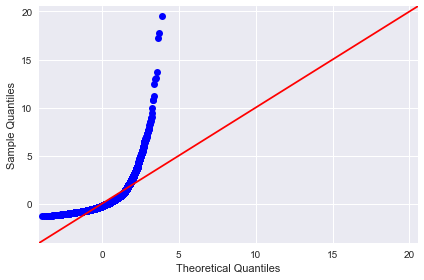

Kings County Housing Data - Regression Analysis and Diagnostics for price_in_millions~month
-------------------------------------------------------------------------------------


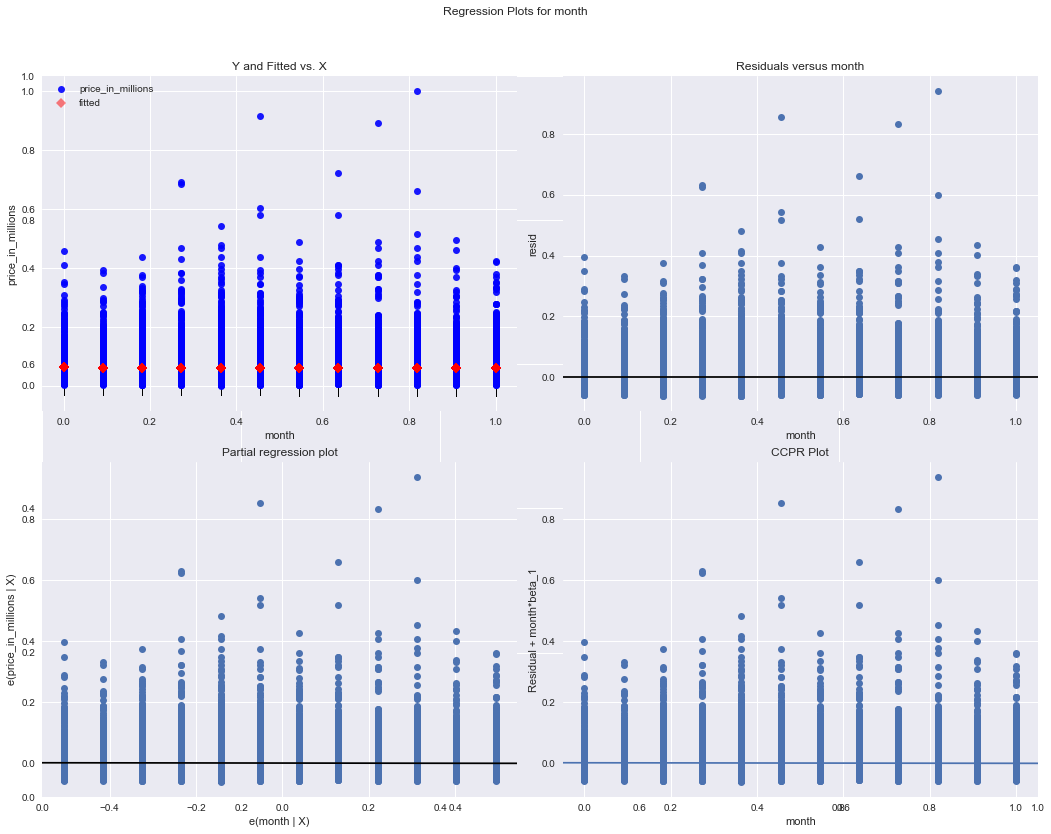

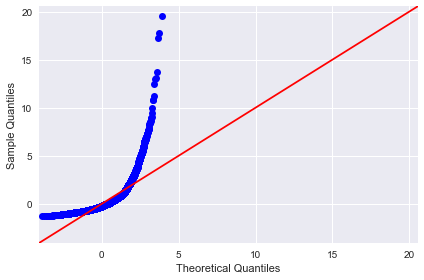

Kings County Housing Data - Regression Analysis and Diagnostics for price_in_millions~day
-------------------------------------------------------------------------------------


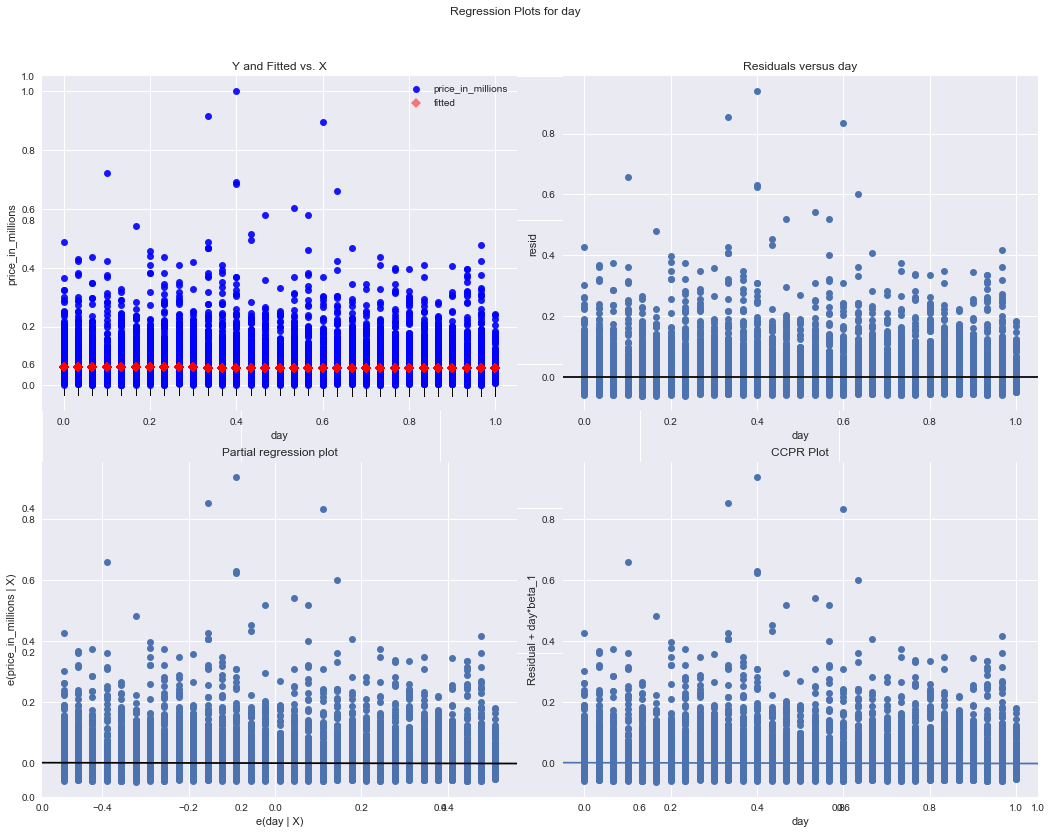

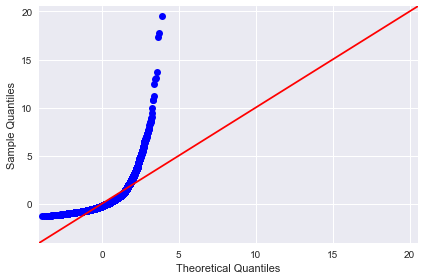

Kings County Housing Data - Regression Analysis and Diagnostics for price_in_millions~yr_age_of_house
-------------------------------------------------------------------------------------


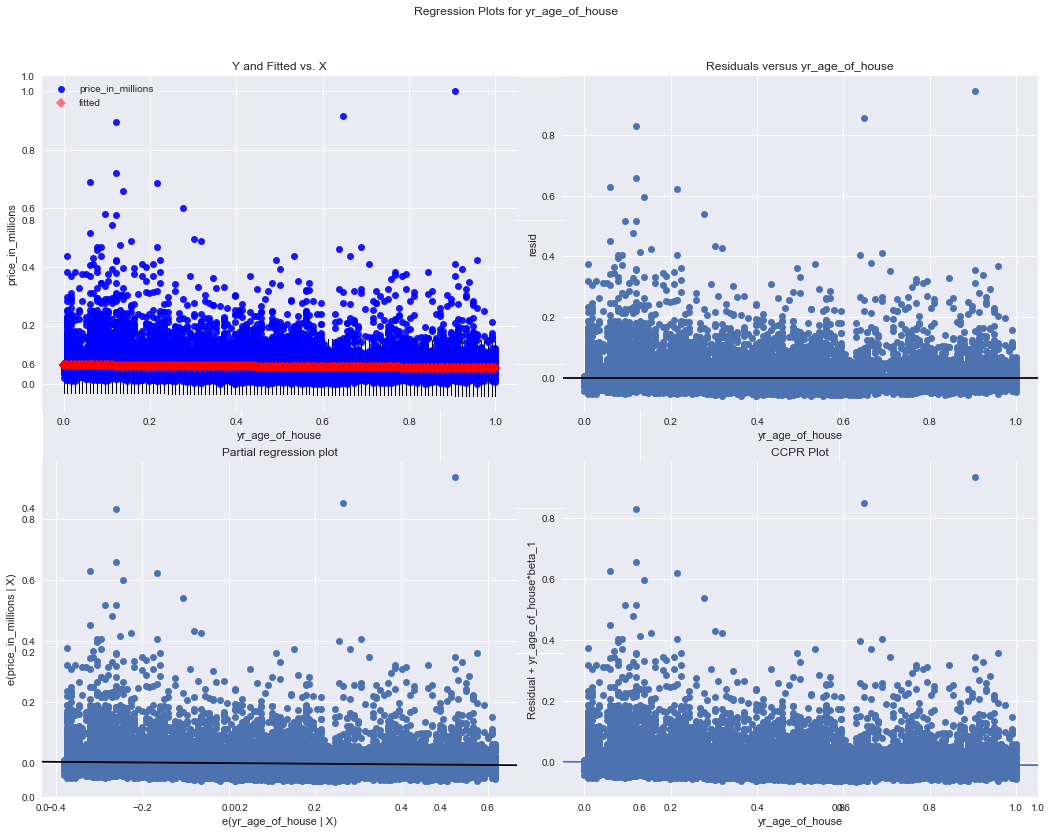

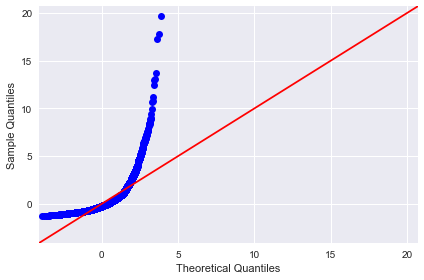

Kings County Housing Data - Regression Analysis and Diagnostics for price_in_millions~yr_age_of_renovation
-------------------------------------------------------------------------------------


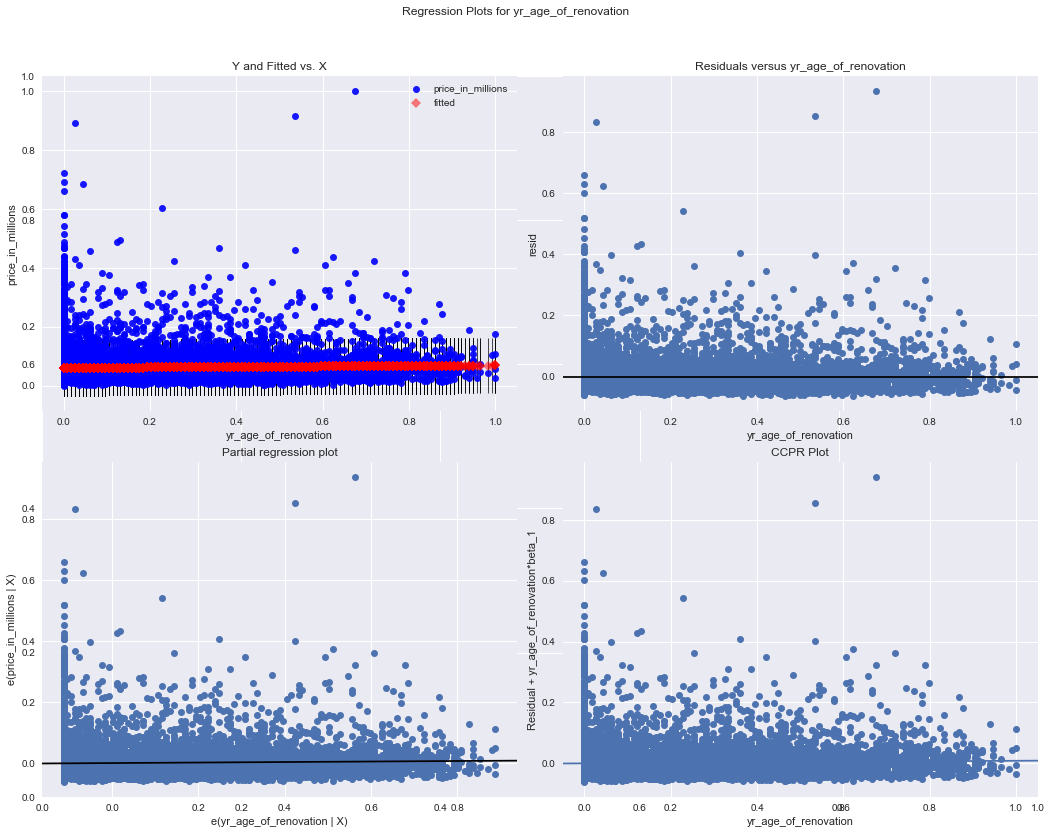

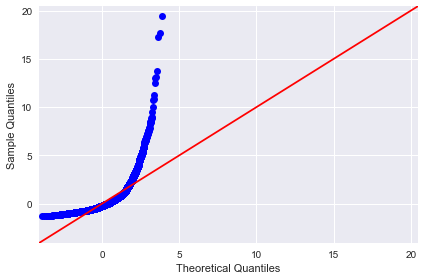

Kings County Housing Data - Regression Analysis and Diagnostics for price_in_millions~price_in_millions
-------------------------------------------------------------------------------------


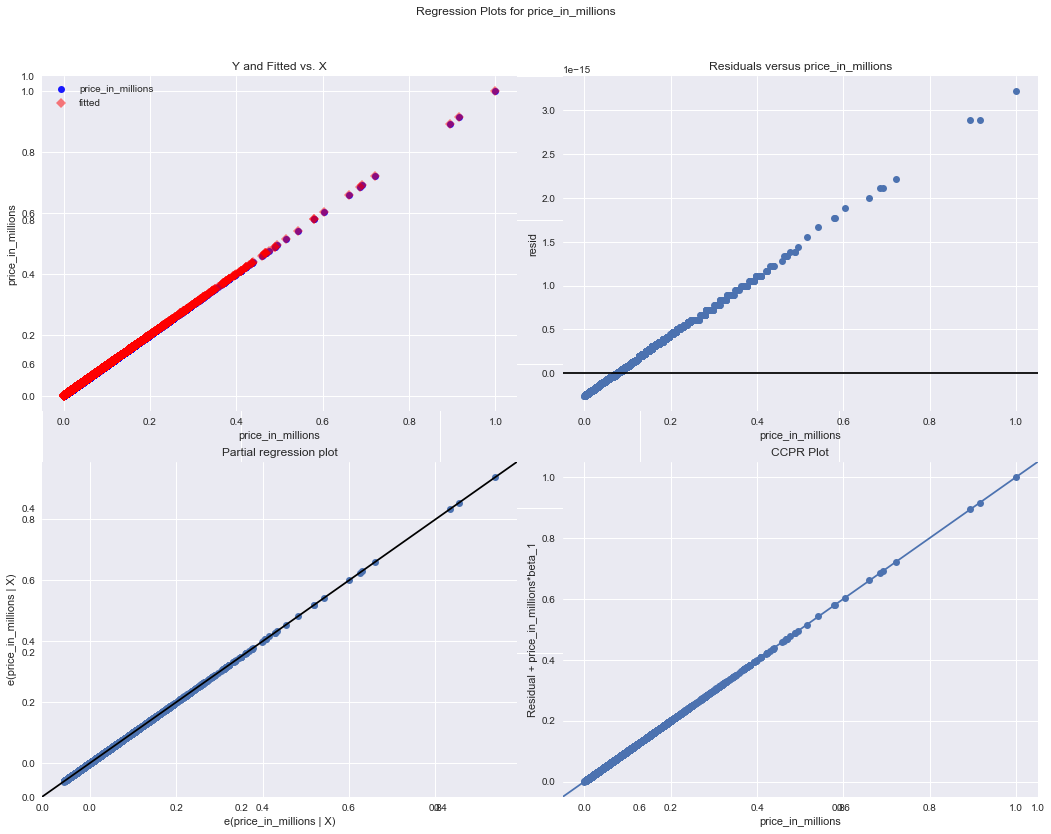

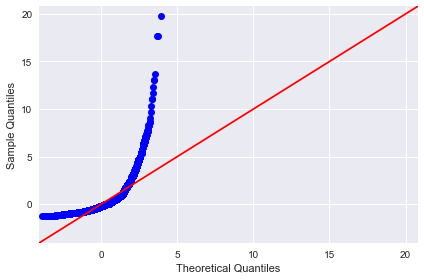

In [5]:
results = []
for idx, column in enumerate(kclr1.columns): #iterating through the columns
    print (f"Kings County Housing Data - Regression Analysis and Diagnostics for price_in_millions~{column}")
    print ("-------------------------------------------------------------------------------------")

    f = f'price_in_millions~{column}' #building the formula
    model = smf.ols(formula=f, data=kclr1).fit() # fitting the line
    
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()
    
    results.append([column, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])
   

In [6]:
pd.DataFrame(results, columns=['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]) # converting the array of results into dataframe for easy viewing)

ind_var  r_squared     intercept     slope        p-value  \
0               bedrooms   0.095350  2.252217e-02  0.514151   0.000000e+00   
1            sqft_living   0.374346 -5.316595e-02  0.250264   0.000000e+00   
2                 floors   0.065948  4.932092e-02  0.057337   0.000000e+00   
3             waterfront   0.065455  5.959435e-02  0.144696   0.000000e+00   
4                   view   0.154650  5.486968e-02  0.099108   0.000000e+00   
5              condition   0.001300  5.421535e-02  0.010686   1.156557e-07   
6                  grade   0.446158 -6.716645e-02  0.274413   0.000000e+00   
7             sqft_above   0.294497 -3.007611e-02  0.198159   0.000000e+00   
8          sqft_basement   0.103110  5.059881e-02  0.169612   0.000000e+00   
9               yr_built   0.002911  5.436762e-02  0.010180   2.117581e-15   
10               zipcode   0.002852  6.435421e-02 -0.009524   4.057896e-15   
11                   lat   0.094060  1.752961e-02  0.066329   0.000000e+00   
12                  long   0.000486  5.835079e-02  0.009087   1.200988e-03   
13         sqft_living15   0.295749 -6.345731e-02  0.219716   0.000000e+00   
14            sqft_lot15   0.021878  3.887573e-02  0.063159  6.772714e-106   
15                  year   0.000014  6.052885e-02  0.000384   5.838927e-01   
16                 month   0.000099  6.150918e-02 -0.001690   1.445638e-01   
17                   day   0.000216  6.185678e-02 -0.002459   3.092905e-02   
18       yr_age_of_house   0.002904  6.457181e-02 -0.010256   2.282093e-15   
19  yr_age_of_renovation   0.001130  5.970868e-02  0.008431   7.737006e-07   
20     price_in_millions   1.000000  2.591269e-16  1.000000   0.000000e+00   

    normality (JB)  
0     1.195105e+06  
1     1.655522e+06  
2     1.255748e+06  
3     9.117312e+05  
4     1.077710e+06  
5     1.136802e+06  
6     2.043899e+06  
7     1.392066e+06  
8     8.842936e+05  
9     1.142512e+06  
10    1.123392e+06  
11    1.511478e+06  
12    1.137713e+06  
13    1.914774e+06  
14    1.105628e+06  
15    1.131923e+06  
16    1.133360e+06  
17    1.130369e+06  
18    1.142372e+06  
19    1.124790e+06  
20    1.173063e+06

#### Observation
The columns with highest r_squared

* sqft_living	0.374346
* view	0.154650
* grade	0.446158
* sqft_above	0.294497
* sqft_basement	0.103110
* sqft_living15	0.295749

In [7]:
plt.style.use('ggplot')

In [8]:
kclr1.head(2)

bedrooms  sqft_living  floors  waterfront  view  condition  grade  \
0    0.0625     0.322166     0.0         0.0   0.0        0.5    0.4   
1    0.0625     0.538392     0.4         0.0   0.0        0.5    0.4   

   sqft_above  sqft_basement  yr_built   zipcode       lat      long  \
0    0.358392       0.000000  0.478261  0.893939  0.571498  0.217608   
1    0.546652       0.082988  0.443478  0.626263  0.908959  0.166113   

   sqft_living15  sqft_lot15  year     month       day  yr_age_of_house  \
0       0.441342    0.300162   0.0  0.818182  0.400000         0.517241   
1       0.525882    0.342058   0.0  1.000000  0.266667         0.551724   

   yr_age_of_renovation  price_in_millions  
0              0.000000           0.018880  
1              0.350877           0.060352

In [9]:
kclr1.describe() 

bedrooms   sqft_living        floors    waterfront          view  \
count  21597.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean       0.074162      0.454795      0.197639      0.007316      0.058353   
std        0.028947      0.117834      0.215873      0.085221      0.191249   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.062500      0.375546      0.000000      0.000000      0.000000   
50%        0.062500      0.455945      0.200000      0.000000      0.000000   
75%        0.093750      0.536222      0.400000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          condition         grade    sqft_above  sqft_basement      yr_built  \
count  21597.000000  21597.000000  21597.000000   21597.000000  21597.000000   
mean       0.602456      0.465792      0.457860       0.059277      0.617388   
std        0.162636      0.117320      0.131995       0.091249      0.255437   
min        0.000000      0.000000      0.000000       0.000000      0.000000   
25%        0.500000      0.400000      0.361000       0.000000      0.443478   
50%        0.500000      0.400000      0.444662       0.000000      0.652174   
75%        0.750000      0.500000      0.552296       0.114108      0.843478   
max        1.000000      1.000000      1.000000       1.000000      1.000000   

            zipcode           lat          long  sqft_living15    sqft_lot15  \
count  21597.000000  21597.000000  21597.000000   21597.000000  21597.000000   
mean       0.388646      0.650142      0.253337       0.564866      0.344799   
std        0.270268      0.222860      0.116880       0.119298      0.112877   
min        0.000000      0.000000      0.000000       0.000000      0.000000   
25%        0.161616      0.506997      0.158638       0.479997      0.285936   
50%        0.323232      0.668972      0.239203       0.556861      0.341712   
75%        0.590909      0.839794      0.327243       0.647535      0.380616   
max        1.000000      1.000000      1.000000       1.000000      1.000000   

               year         month           day  yr_age_of_house  \
count  21597.000000  21597.000000  21597.000000     21597.000000   
mean       0.322962      0.506724      0.489582         0.382097   
std        0.467619      0.283187      0.287830         0.253252   
min        0.000000      0.000000      0.000000         0.000000   
25%        0.000000      0.272727      0.233333         0.163793   
50%        0.000000      0.454545      0.500000         0.353448   
75%        1.000000      0.727273      0.733333         0.551724   
max        1.000000      1.000000      1.000000         1.000000   

       yr_age_of_renovation  price_in_millions  
count          21597.000000       21597.000000  
mean               0.111996           0.060653  
std                0.192198           0.048198  
min                0.000000           0.000000  
25%                0.000000           0.032013  
50%                0.000000           0.048806  
75%                0.166667           0.074390  
max                1.000000           1.000000

### Probability distribution

##### Distribution plots are used to show a probality distribution. 

##### For a normal distribution, the ideal skewness and kurtosis value is approximately 0.

##### Skewness is a measure of the asymmetry of the probability distribution of a random variable about its mean.

##### Kurtosis is used to describe the extreme values in one versus the other tail of a distribution.

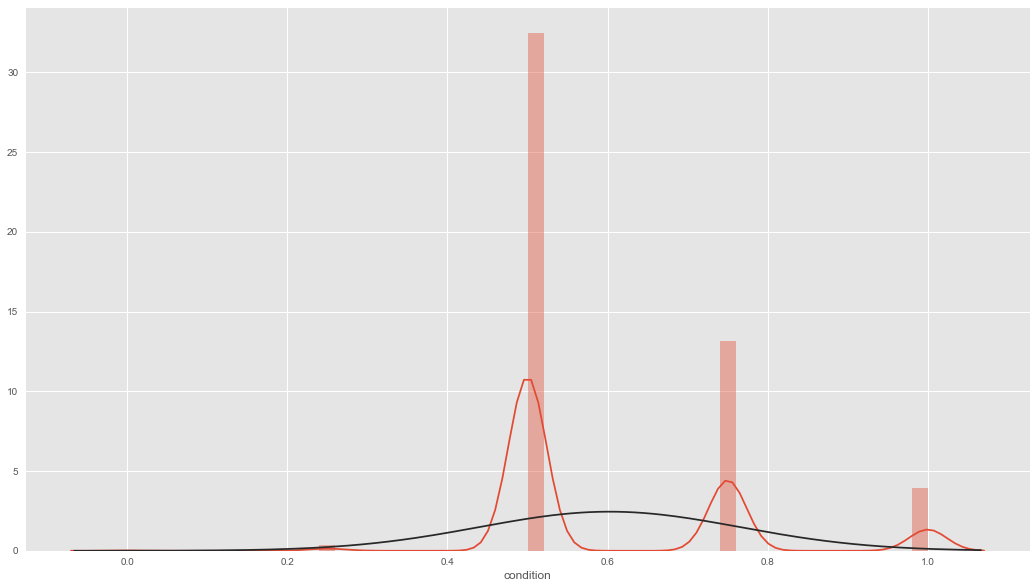

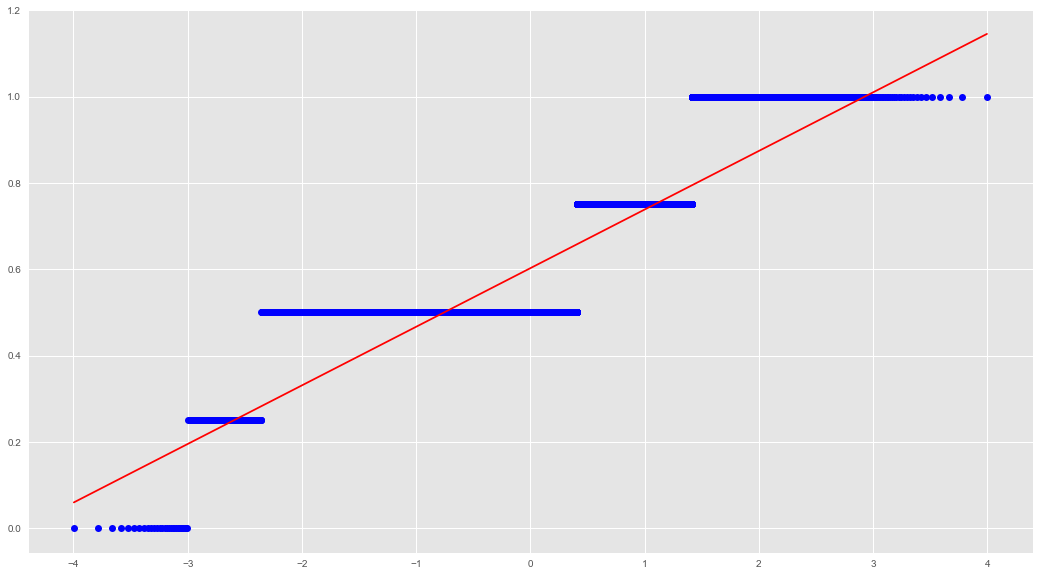

skewness: 1.036037
kurtosis: 0.519237


In [10]:
plt.figure(figsize=(18,10))
# kernel density plot
sns.distplot(kclr1.condition,fit=norm);
plt.ylabel =('Frequency')
plt.title = ('Condition Distribution');
(mu,sigma)= norm.fit(kclr1['condition']);

#QQ plot
plt.figure(figsize=(18,10))
res = stats.probplot(kclr1['condition'], plot=plt)
plt.show()

print("skewness: %f" % kclr1['condition'].skew())
print("kurtosis: %f" % kclr1 ['condition'].kurt()) 


#### Normalization

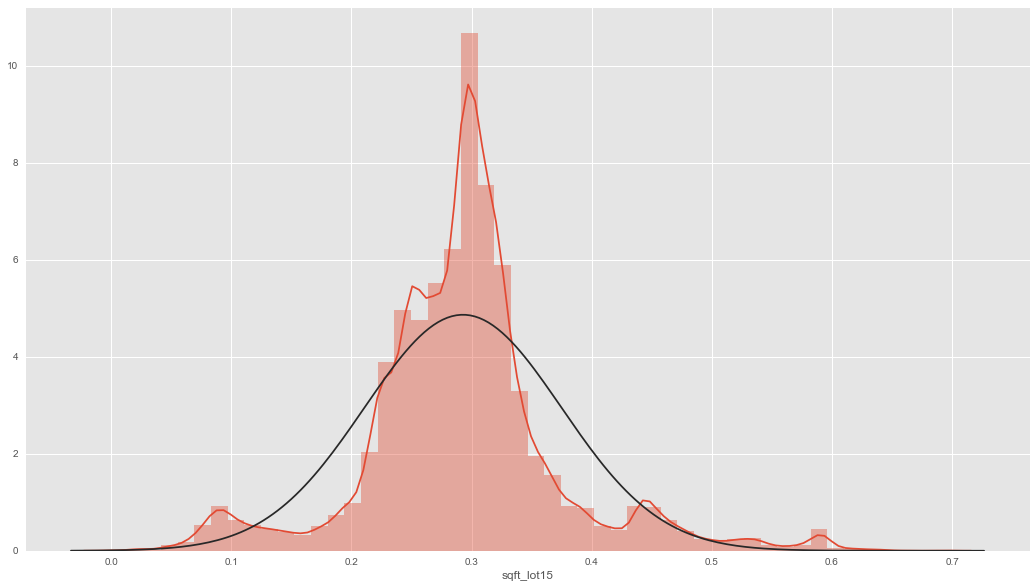

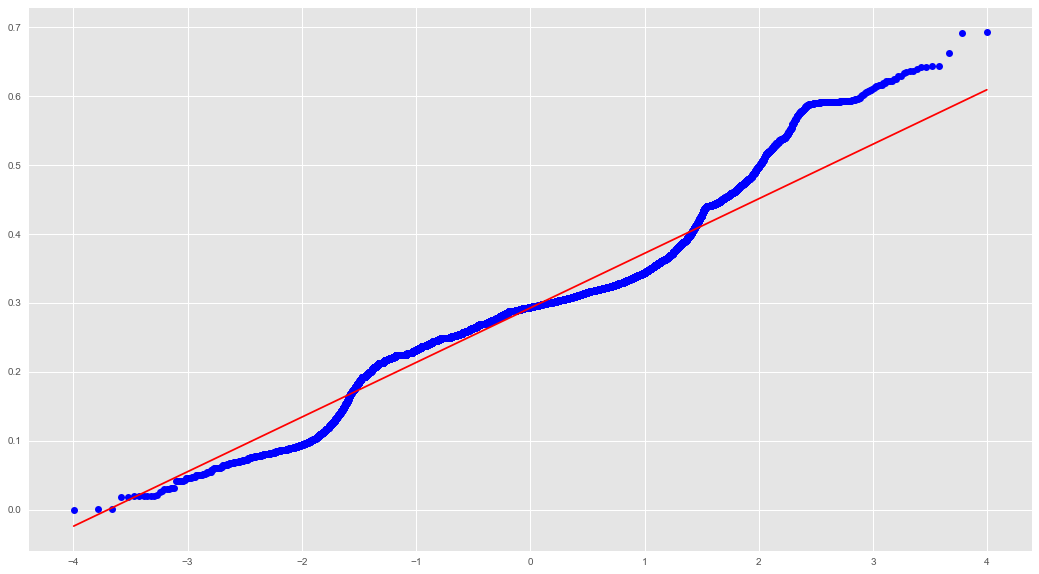

skewness: 0.416473
kurtosis: 2.567889


In [11]:
plt.figure(figsize=(18,10))

#log transform the target 
kclr1["sqft_lot15"] = np.log1p(kclr1["sqft_lot15"])

#Kernel Density plot
sns.distplot(kclr1.sqft_lot15,fit=norm);
plt.ylabel=('Frequency')
plt.title=('Square Foot Lot15 distribution');
#Get the fitted parameters used by the function
(mu,sigma)= norm.fit(kclr1['sqft_lot15']);



#QQ plot
plt.figure(figsize=(18,10))

res =stats. probplot(kclr1['sqft_lot15'], plot=plt)
plt.show()
print("skewness: %f" % kclr1['sqft_lot15'].skew())
print("kurtosis: %f" % kclr1['sqft_lot15'].kurt())

As a general rule of thumb: If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.


Both skew and kurtosis can be analyzed through descriptive statistics. Acceptable values of skewness fall between − 3 and + 3, and kurtosis is appropriate from a range of − 10 to + 10 when utilizing SEM (Brown, 2006).

#### KDE - Plotting histogram _ to check the distribution of predictors

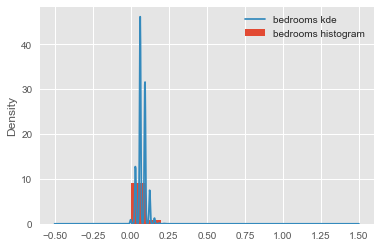

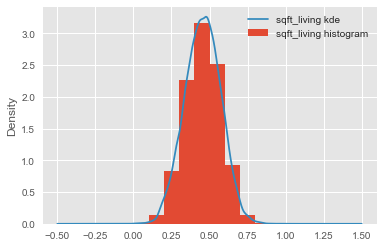

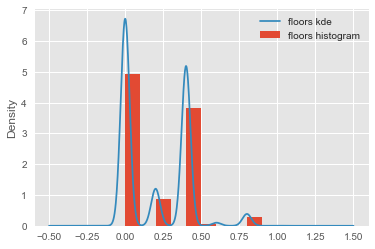

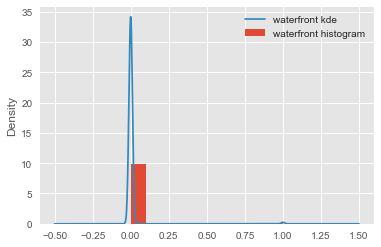

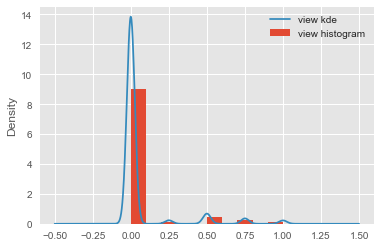

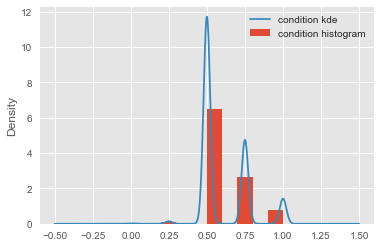

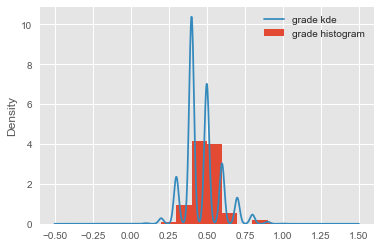

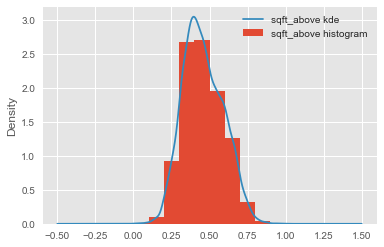

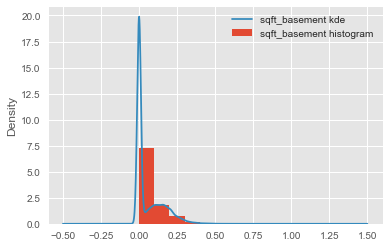

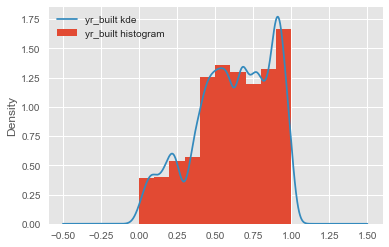

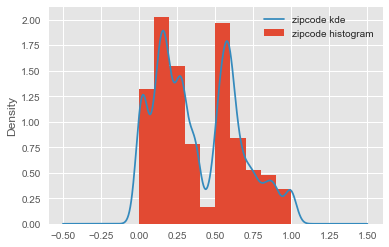

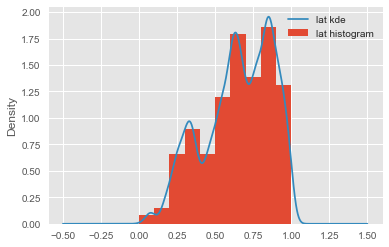

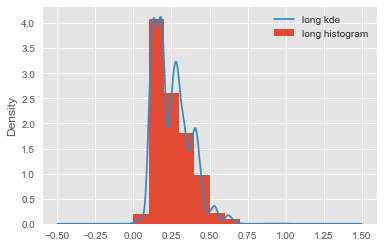

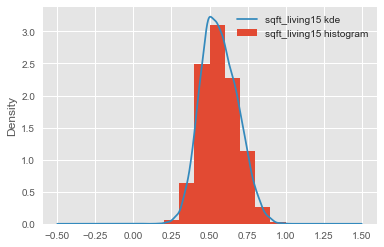

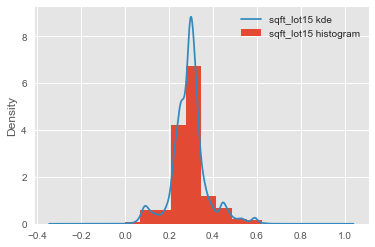

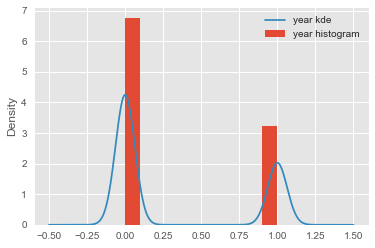

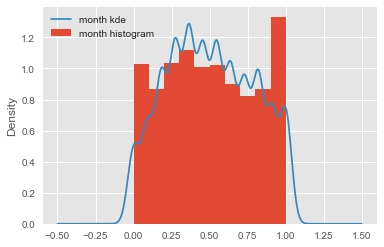

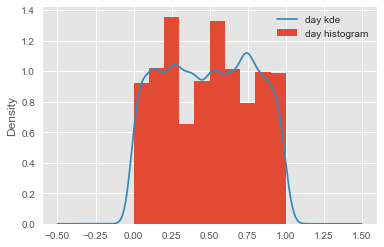

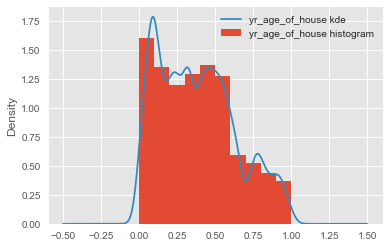

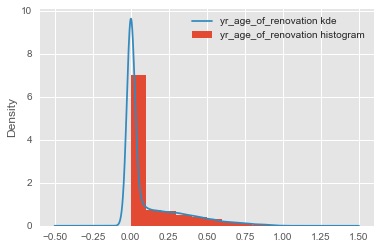

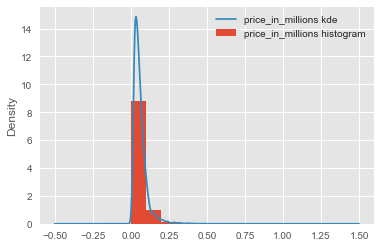

In [12]:
for column in kclr1:
    kclr1[column].plot.hist(density=True, label = column+' histogram')
    kclr1[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

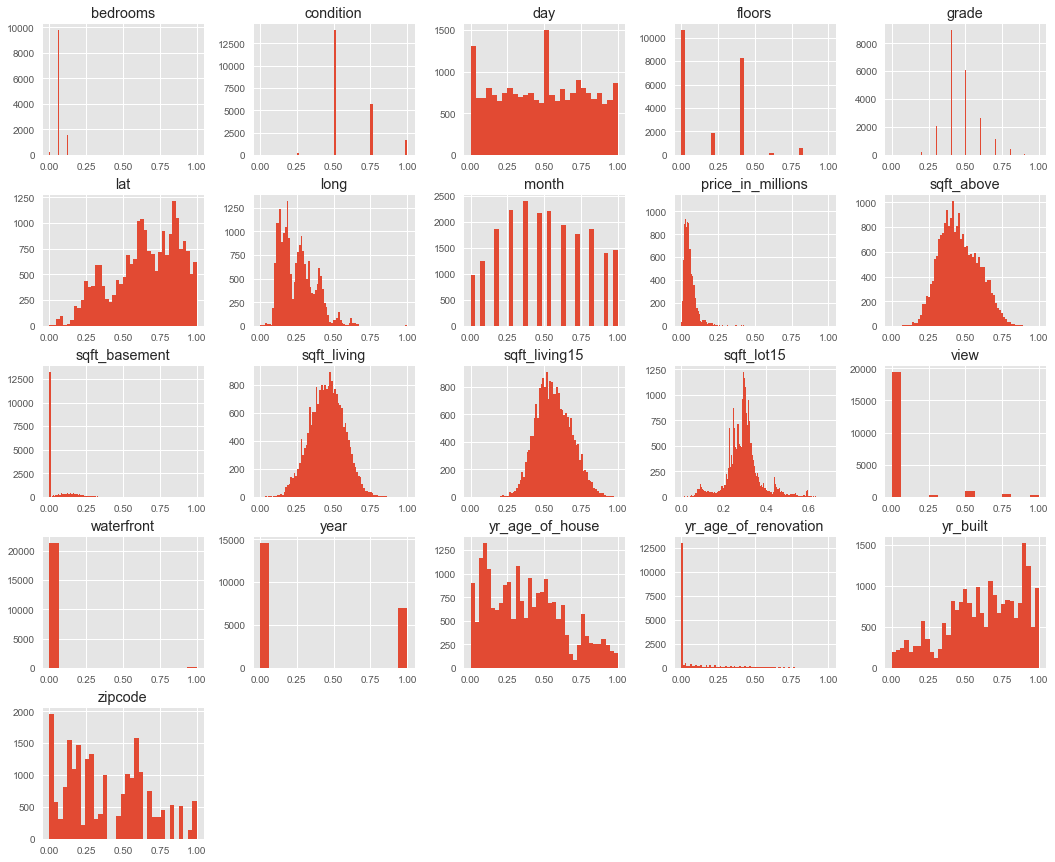

In [13]:
kclr1.hist(figsize=(18,15), bins='auto');

#### Testing linearity assumption

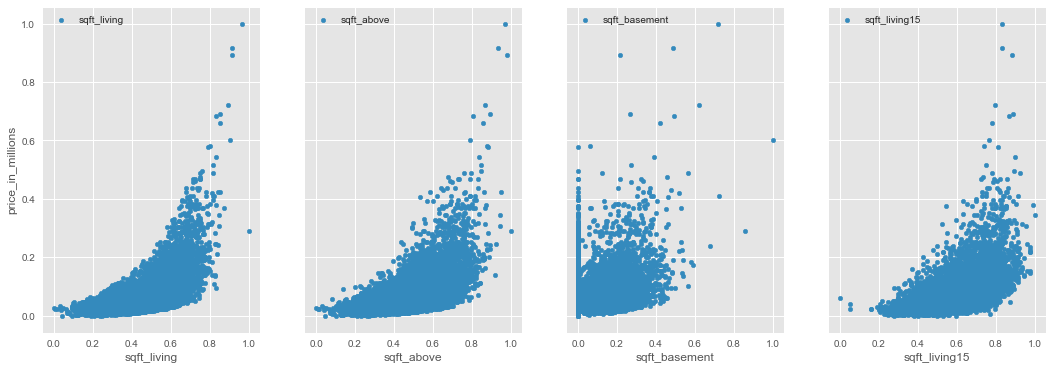

In [14]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(18, 6)) ## 1 line of 3 plots
for idx, age_house in enumerate(['sqft_living', 'sqft_above','sqft_basement', 'sqft_living15']):
    kclr1.plot(kind='scatter', x=age_house, y='price_in_millions', ax=axs[idx], label=age_house)
plt.legend() 
plt.show()

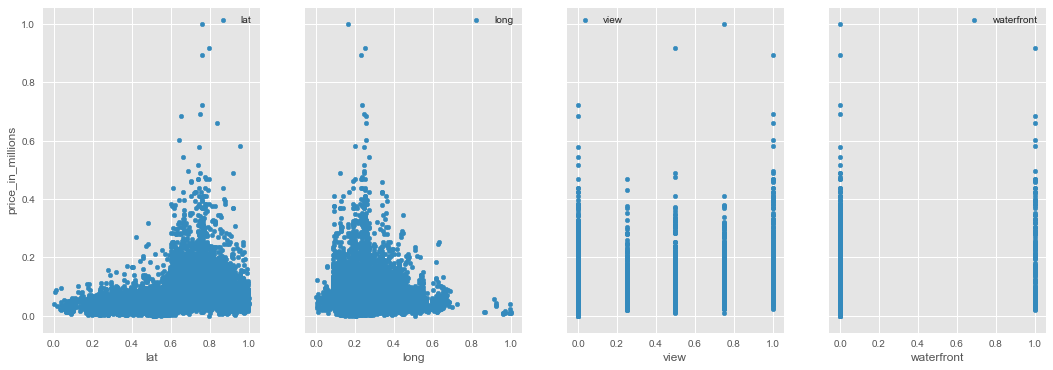

In [15]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(18, 6)) ## 1 line of 3 plots
for idx, age_house in enumerate(['lat', 'long','view', 'waterfront']):
    kclr1.plot(kind='scatter', x=age_house, y='price_in_millions', ax=axs[idx], label=age_house)
plt.legend() 
plt.show()

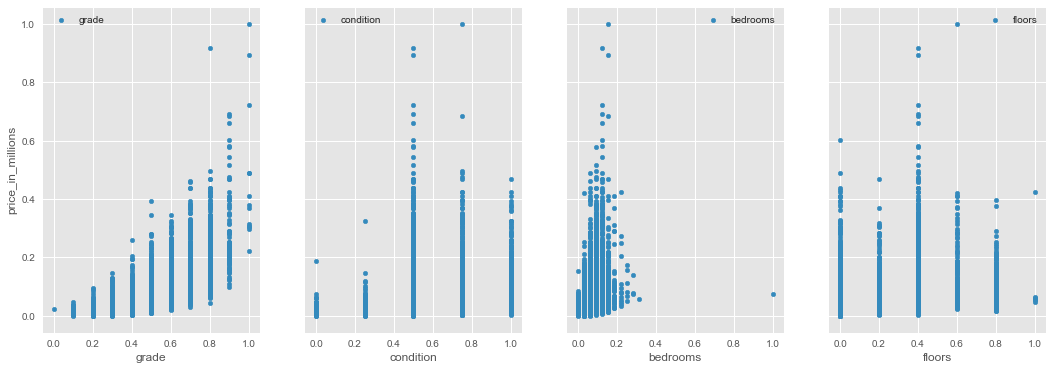

In [16]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(18, 6)) ## 1 line of 3 plots
for idx, age_house in enumerate(['grade', 'condition','bedrooms', 'floors']):
    kclr1.plot(kind='scatter', x=age_house, y='price_in_millions', ax=axs[idx], label=age_house)
plt.legend() 
plt.show()

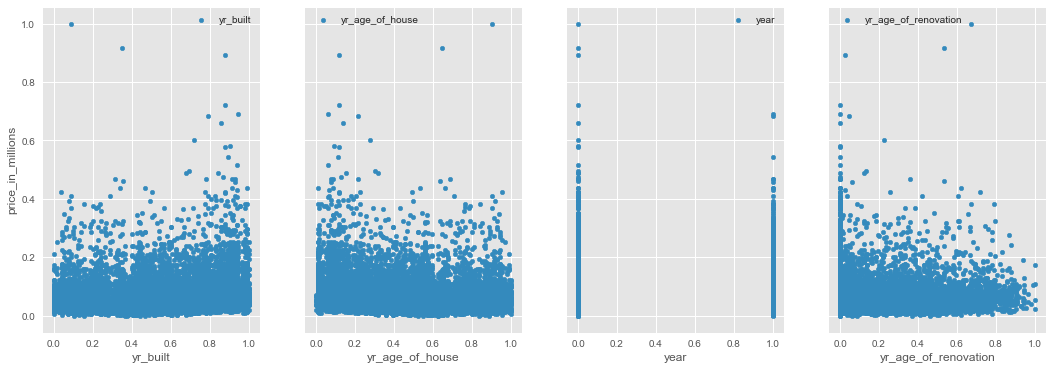

In [17]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(18, 6)) ## 1 line of 3 plots
for idx, age_house in enumerate(['yr_built', 'yr_age_of_house','year', 'yr_age_of_renovation']):
    kclr1.plot(kind='scatter', x=age_house, y='price_in_millions', ax=axs[idx], label=age_house)
plt.legend() 
plt.show()

#### Jointplot - Checking for Linearity for
    sqft_living
    view
    grade
    sqft_above
    sqft_basement
    sqft_living15

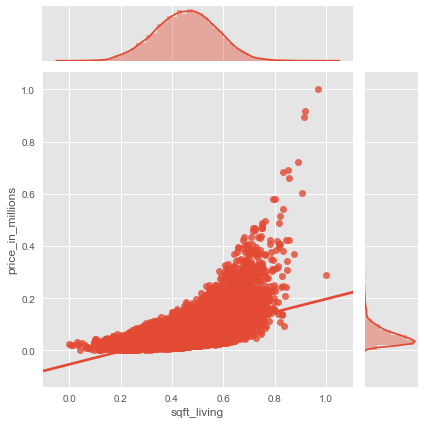

In [18]:
sns.jointplot('sqft_living','price_in_millions', data=kclr1, kind='reg');

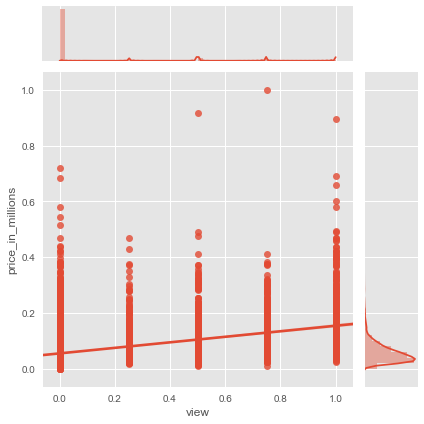

In [19]:
sns.jointplot('view','price_in_millions', data=kclr1, kind='reg');

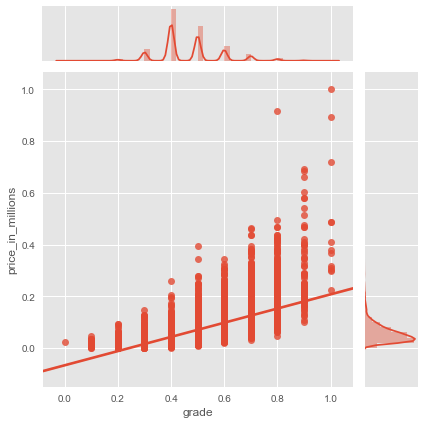

In [20]:
sns.jointplot('grade','price_in_millions', data=kclr1, kind='reg');

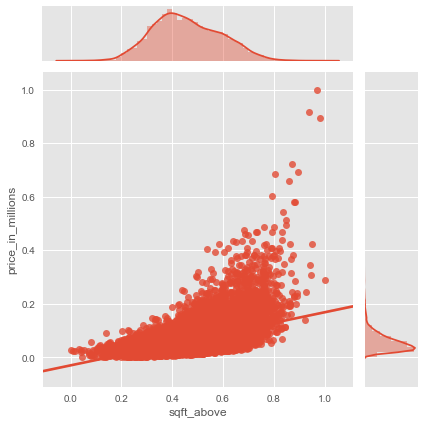

In [21]:
sns.jointplot('sqft_above','price_in_millions', data=kclr1, kind='reg');

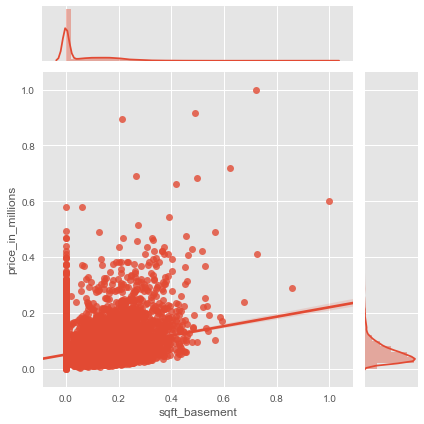

In [22]:
sns.jointplot('sqft_basement','price_in_millions', data=kclr1, kind='reg');

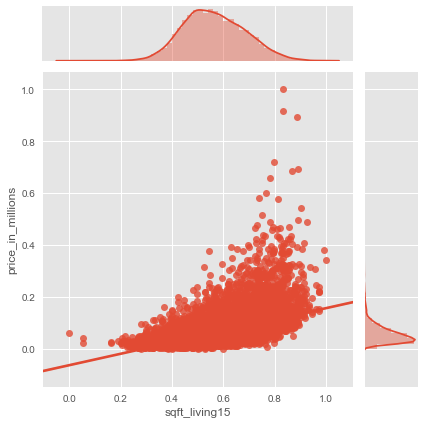

In [23]:
sns.jointplot('sqft_living15','price_in_millions', data=kclr1, kind='reg');

### Jointplot for all column

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\seaborn\axisgrid.py:1675: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


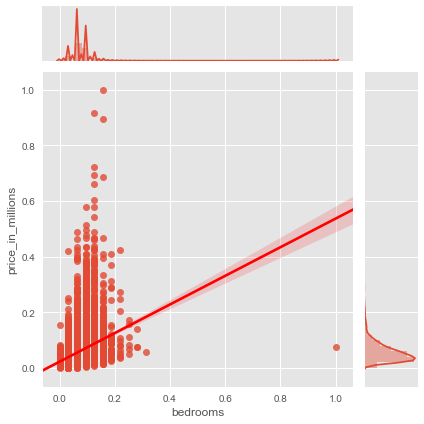

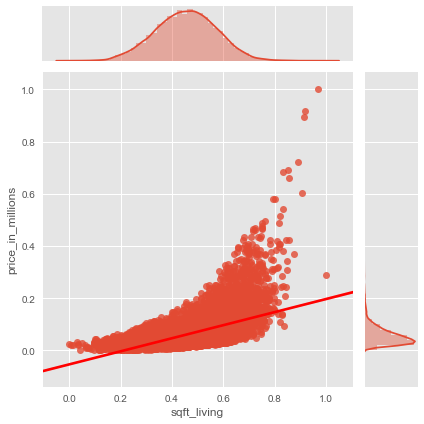

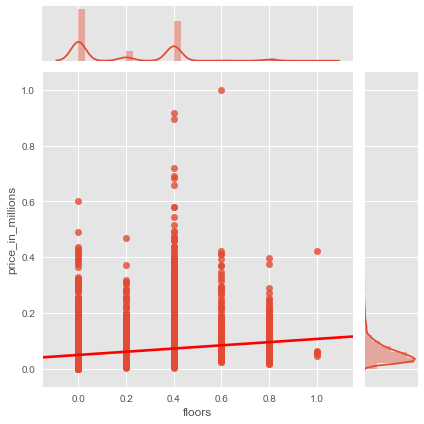

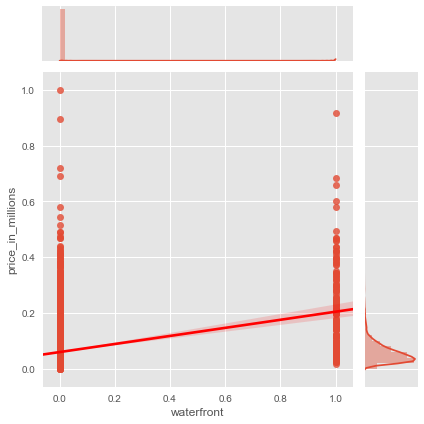

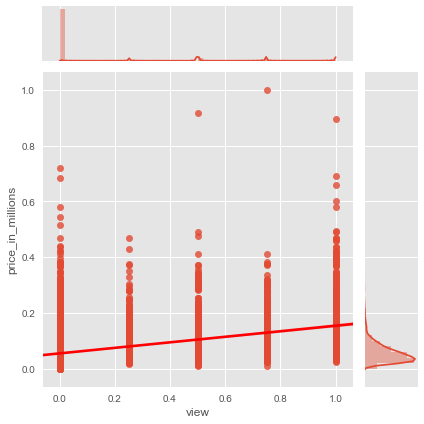

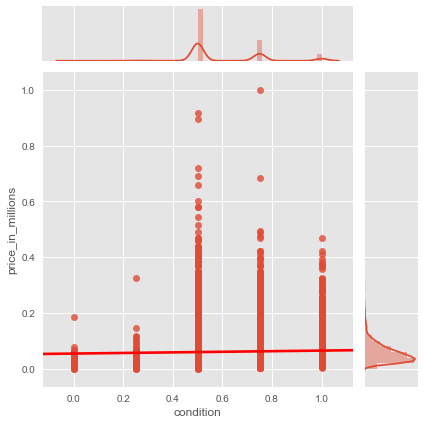

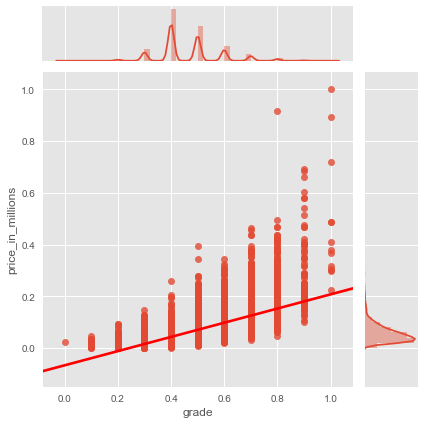

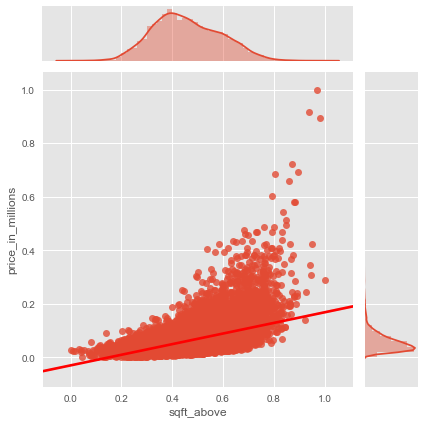

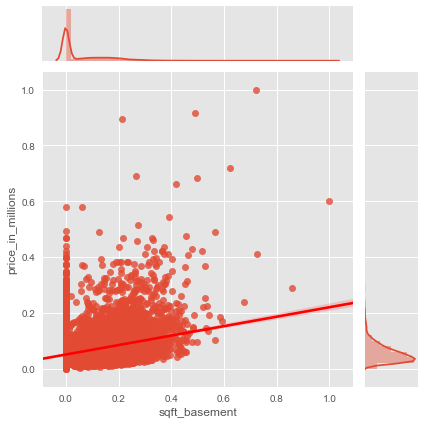

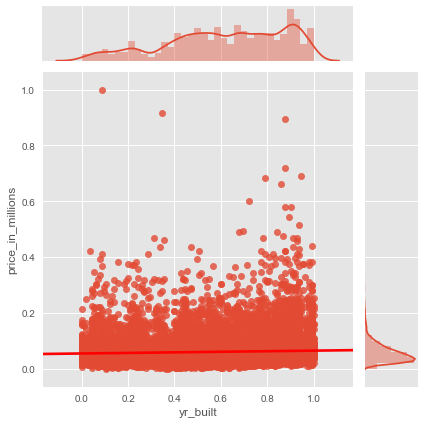

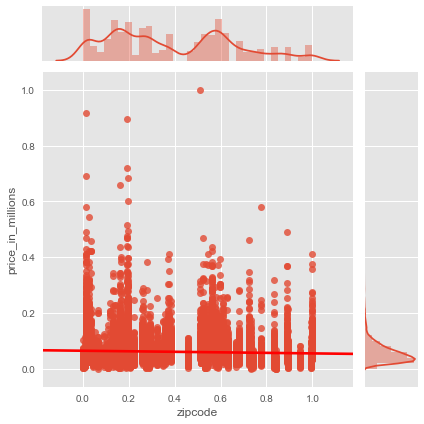

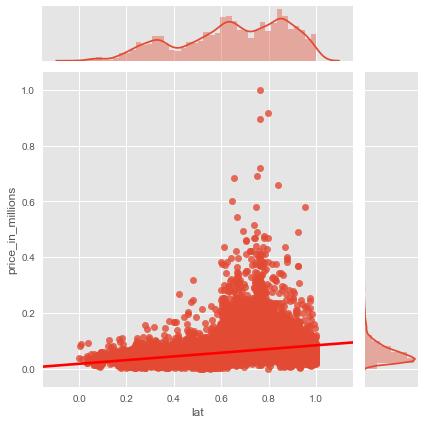

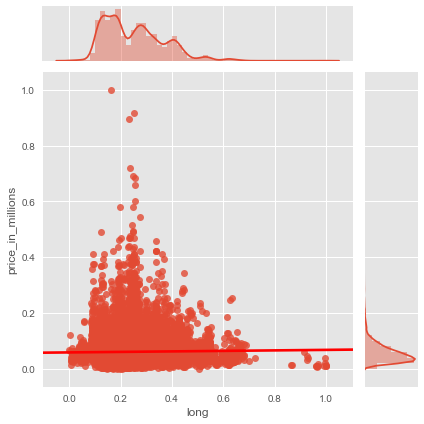

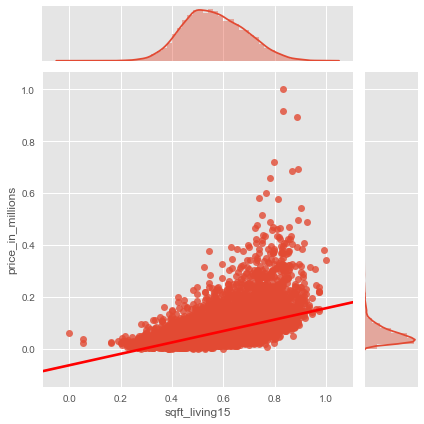

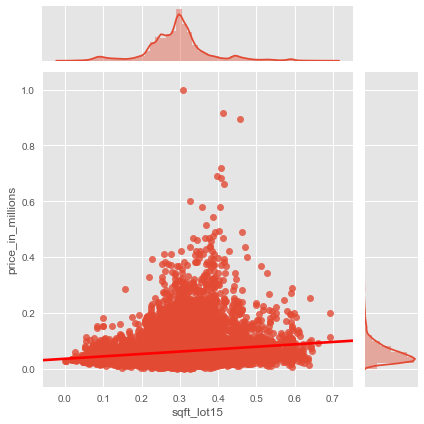

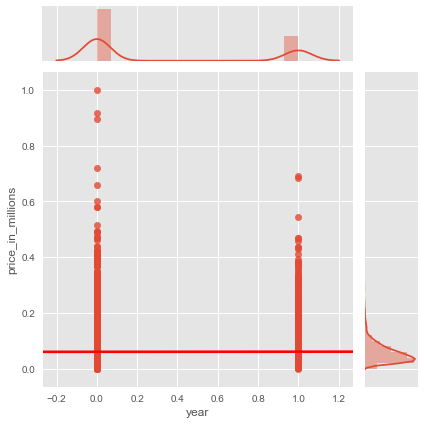

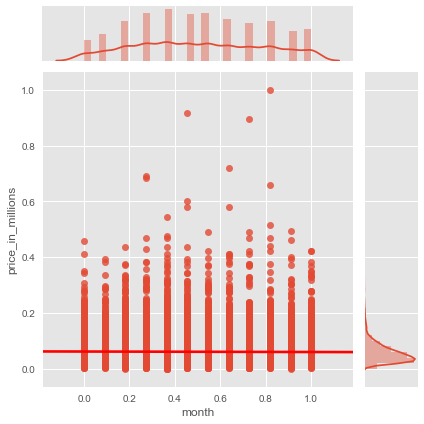

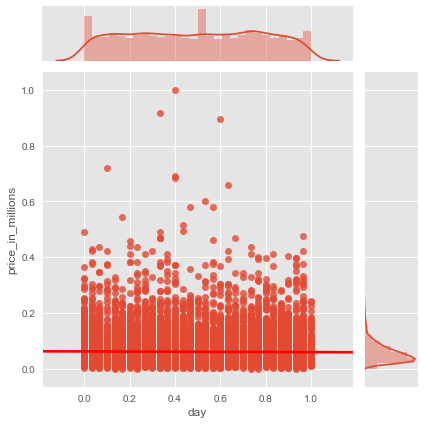

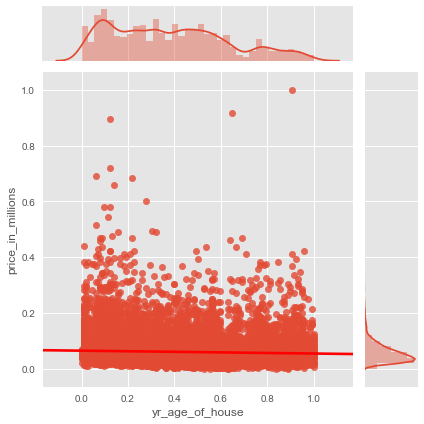

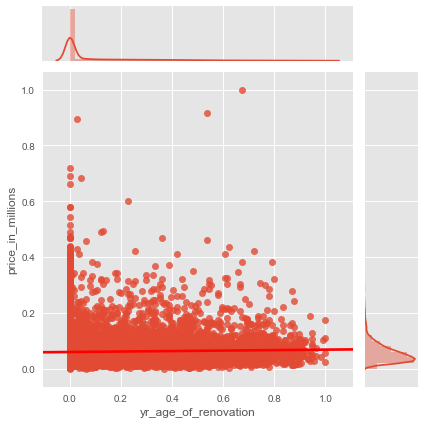

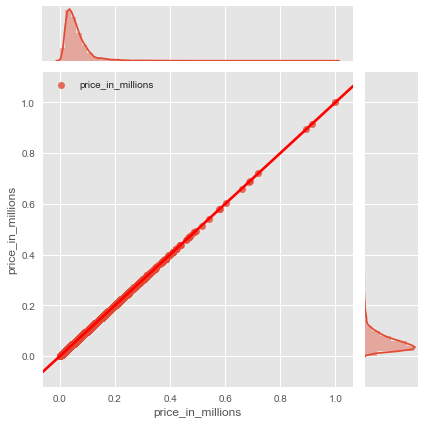

In [24]:
headers = list(kclr1)
for column in headers:
    sns.jointplot(x=column, y='price_in_millions',
    data=kclr1,
    kind= 'reg',
    label = column,
    joint_kws={'line_kws':{'color':'red'}}) 
plt.legend()
plt.show() 

#### Run a simple regression in Statsmodels with  the following as predictor
* sqft_living 
* view 
* grade 
* sqft_above 
* sqft_basement 
* sqft_living15 
* sqft_lot15
* bedrooms
* waterfront
* condition
* floors
* yr_built
* year
* yr_age_of_house
* yr_age_of_renovation
* month
* day
* zipcode 
* lat
* long

### sqft_living

In [25]:
f = 'price_in_millions~sqft_living'

In [26]:
model = ols(formula=f, data=kclr1).fit() 

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_in_millions   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                 1.292e+04
Date:                Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:14:48   Log-Likelihood:                 39911.
No. Observations:               21597   AIC:                        -7.982e+04
Df Residuals:                   21595   BIC:                        -7.980e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0532      0.001    -51.399      0.000      -0.055      -0.051
sqft_living     0.2503      0.002    113.670      0.000       0.246       0.255
==============================================================================
Omnibus:                    19384.826   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1655521.719
Skew:                           3.977   Prob(JB):                         0.00
Kurtosis:                      45.148   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
model.predict() 

array([ 0.02746069,  0.08157423, -0.00221582, ...,  0.01733085,
        0.04862869,  0.01733085])

In [29]:
# model.score

   sqft_living
0          0.0
1          1.0
0   -0.053166
1    0.197098
dtype: float64


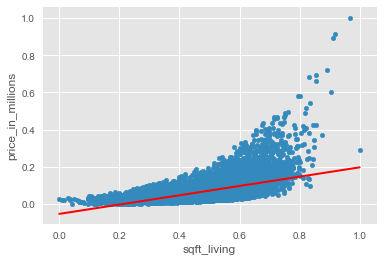

In [30]:
# create a DataFrame with the minimum and maximum values of bathrooms
X_new = pd.DataFrame({'sqft_living': [kclr1.sqft_living.min(), kclr1.sqft_living.max()]})
print(X_new.head())
# make predictions for those x values and store them
preds = model.predict(X_new)
print (preds)
# first, plot the observed data and the least squares line
kclr1.plot(kind='scatter', x='sqft_living', y='price_in_millions')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

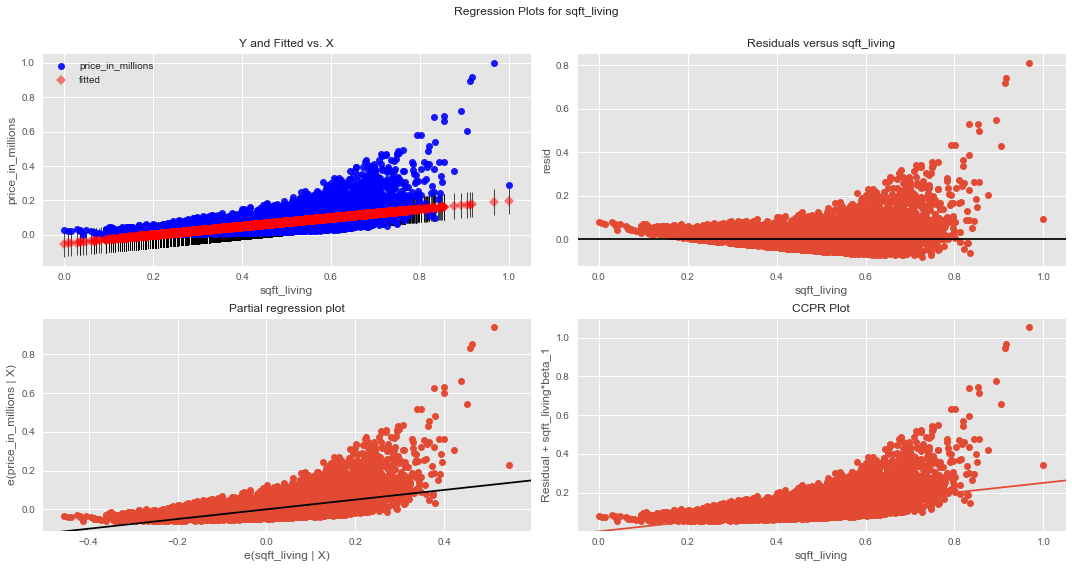

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


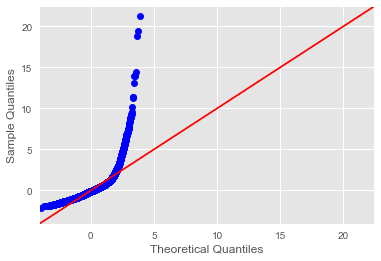

In [32]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show() 

### view

In [33]:
f = 'price_in_millions~view'
# +view+grade+sqft_above+sqft_basement+sqft_living15'

In [34]:
model = ols(formula=f, data=kclr1).fit() 

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_in_millions   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     3951.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:14:52   Log-Likelihood:                 36661.
No. Observations:               21597   AIC:                        -7.332e+04
Df Residuals:                   21595   BIC:                        -7.330e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0549      0.000    174.036      0.000       0.054       0.055
view           0.0991      0.002     62.854      0.000       0.096       0.102
==============================================================================
Omnibus:                    18082.913   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1077709.968
Skew:                           3.669   Prob(JB):                         0.00
Kurtosis:                      36.820   Cond. No.                         5.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
model.predict() 

array([0.05486968, 0.05486968, 0.05486968, ..., 0.05486968, 0.05486968,
       0.05486968])

In [37]:
# model.score

   view
0   0.0
1   1.0
0    0.054870
1    0.153978
dtype: float64


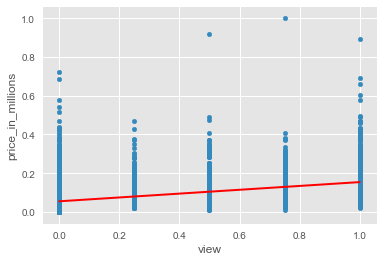

In [38]:
# create a DataFrame with the minimum and maximum values of bathrooms
X_new = pd.DataFrame({'view': [kclr1.view.min(), kclr1.view.max()]})
print(X_new.head())
# make predictions for those x values and store them
preds = model.predict(X_new)
print (preds)
# first, plot the observed data and the least squares line
kclr1.plot(kind='scatter', x='view', y='price_in_millions')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

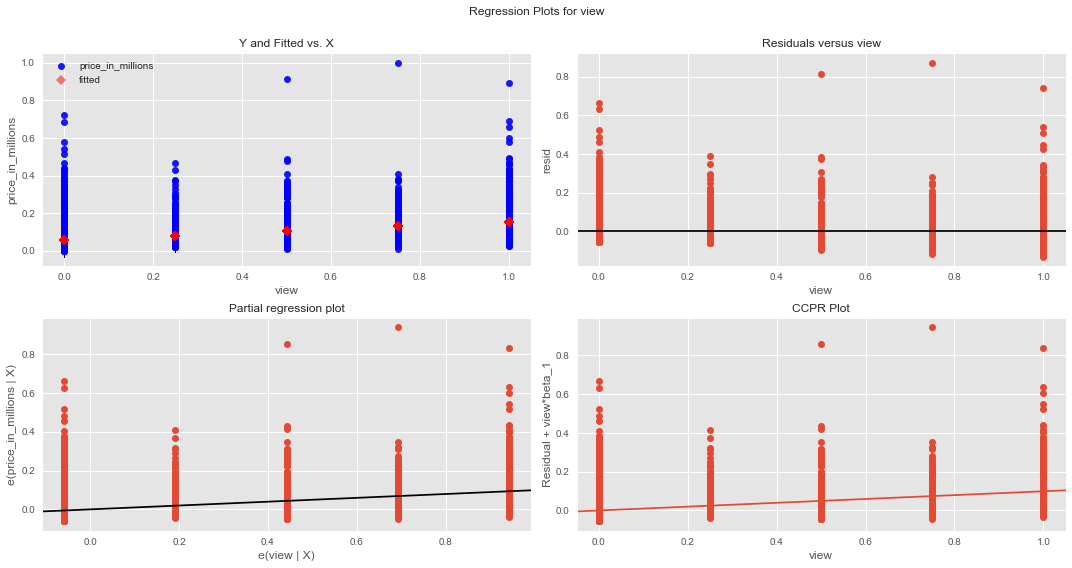

In [39]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "view", fig=fig)
plt.show()

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


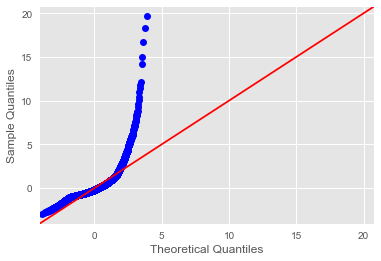

In [40]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show() 

### grade

In [41]:
f = 'price_in_millions~grade'

In [42]:
model = ols(formula=f, data=kclr1).fit() 

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_in_millions   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:14:55   Log-Likelihood:                 41228.
No. Observations:               21597   AIC:                        -8.245e+04
Df Residuals:                   21595   BIC:                        -8.244e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0672      0.001    -67.209      0.000      -0.069      -0.065
grade          0.2744      0.002    131.895      0.000       0.270       0.278
==============================================================================
Omnibus:                    19879.964   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043898.709
Skew:                           4.081   Prob(JB):                         0.00
Kurtosis:                      49.954   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
model.predict() 

array([0.04259885, 0.04259885, 0.01515753, ..., 0.04259885, 0.07004018,
       0.04259885])

   grade
0    0.0
1    1.0
0   -0.067166
1    0.207247
dtype: float64


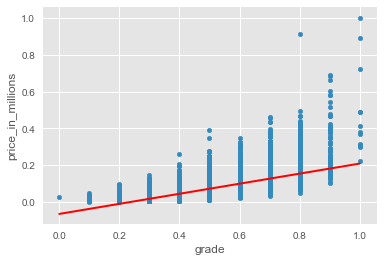

In [45]:
X_new = pd.DataFrame({'grade': [kclr1.grade.min(), kclr1.grade.max()]})
print(X_new.head())
preds = model.predict(X_new)
print (preds)
kclr1.plot(kind='scatter', x='grade', y='price_in_millions')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

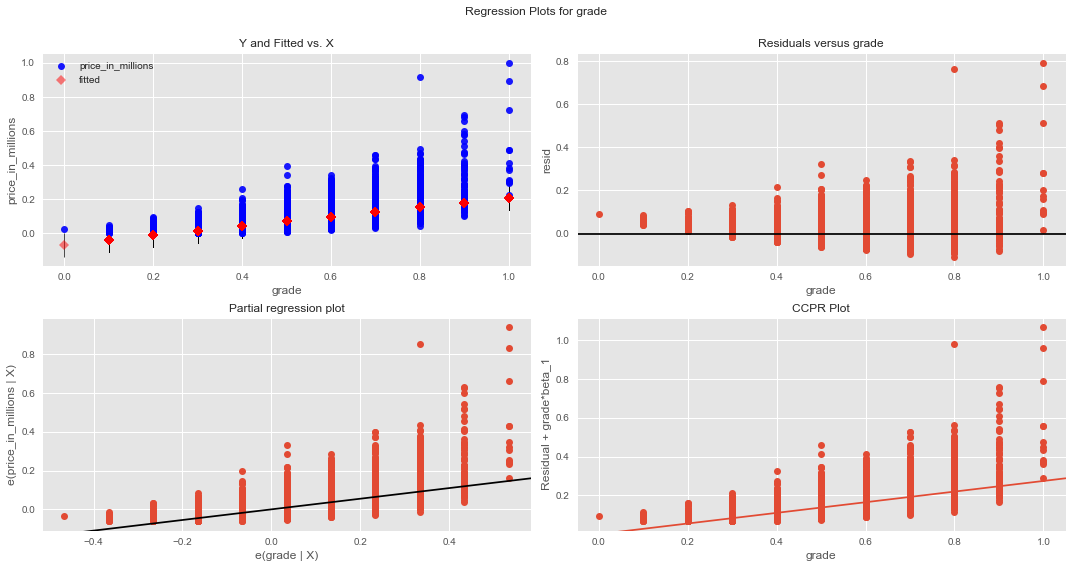

In [46]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "grade", fig=fig)
plt.show()

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


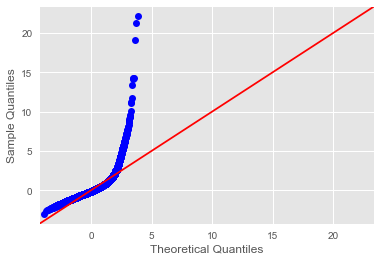

In [47]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show() 

### sqft_above

In [48]:
f = 'price_in_millions~sqft_above'

In [49]:
model = ols(formula=f, data=kclr1).fit() 

In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_in_millions   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     9014.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:14:58   Log-Likelihood:                 38614.
No. Observations:               21597   AIC:                        -7.722e+04
Df Residuals:                   21595   BIC:                        -7.721e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0301      0.001    -30.242      0.000      -0.032      -0.028
sqft_above     0.1982      0.002     94.944      0.000       0.194       0.202
==============================================================================
Omnibus:                    18898.928   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1392066.005
Skew:                           3.865   Prob(JB):                         0.00
Kurtosis:                      41.564   Cond. No.                         9.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
model.predict() 

array([0.0409426 , 0.07824795, 0.01480251, ..., 0.03201989, 0.0595881 ,
       0.03201989])

   sqft_above
0         0.0
1         1.0
0   -0.030076
1    0.168083
dtype: float64


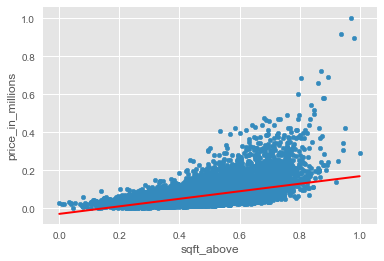

In [52]:
X_new = pd.DataFrame({'sqft_above': [kclr1.sqft_above.min(), kclr1.sqft_above.max()]})
print(X_new.head())
preds = model.predict(X_new)
print (preds)
kclr1.plot(kind='scatter', x='sqft_above', y='price_in_millions')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

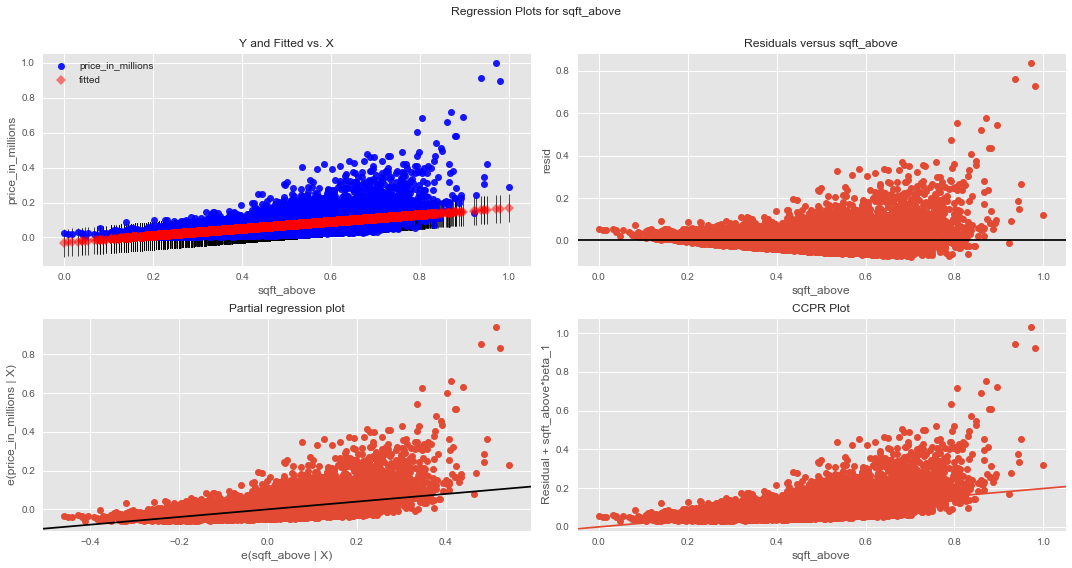

In [53]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_above", fig=fig)
plt.show()

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


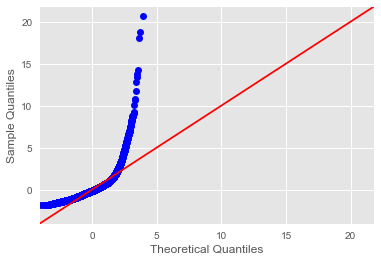

In [54]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show() 

### sqft_basement

In [55]:
f = 'price_in_millions~sqft_basement'

In [56]:
model = ols(formula=f, data=kclr1).fit() 

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_in_millions   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     2483.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:15:02   Log-Likelihood:                 36022.
No. Observations:               21597   AIC:                        -7.204e+04
Df Residuals:                   21595   BIC:                        -7.202e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0506      0.000    136.606      0.000       0.050       0.051
sqft_basement     0.1696      0.003     49.826      0.000       0.163       0.176
==============================================================================
Omnibus:                    17932.847   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           884293.556
Skew:                           3.692   Prob(JB):                         0.00
Kurtosis:                      33.466   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
model.predict() 

array([0.05059881, 0.06467445, 0.05059881, ..., 0.05059881, 0.05059881,
       0.05059881])

   sqft_basement
0            0.0
1            1.0
0    0.050599
1    0.220210
dtype: float64


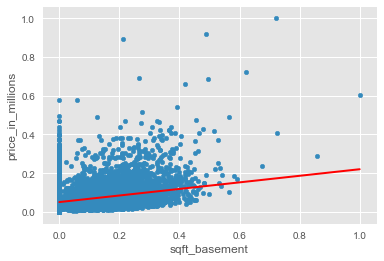

In [59]:
X_new = pd.DataFrame({'sqft_basement': [kclr1.sqft_basement.min(), kclr1.sqft_basement.max()]})
print(X_new.head())
preds = model.predict(X_new)
print (preds)
kclr1.plot(kind='scatter', x='sqft_basement', y='price_in_millions')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

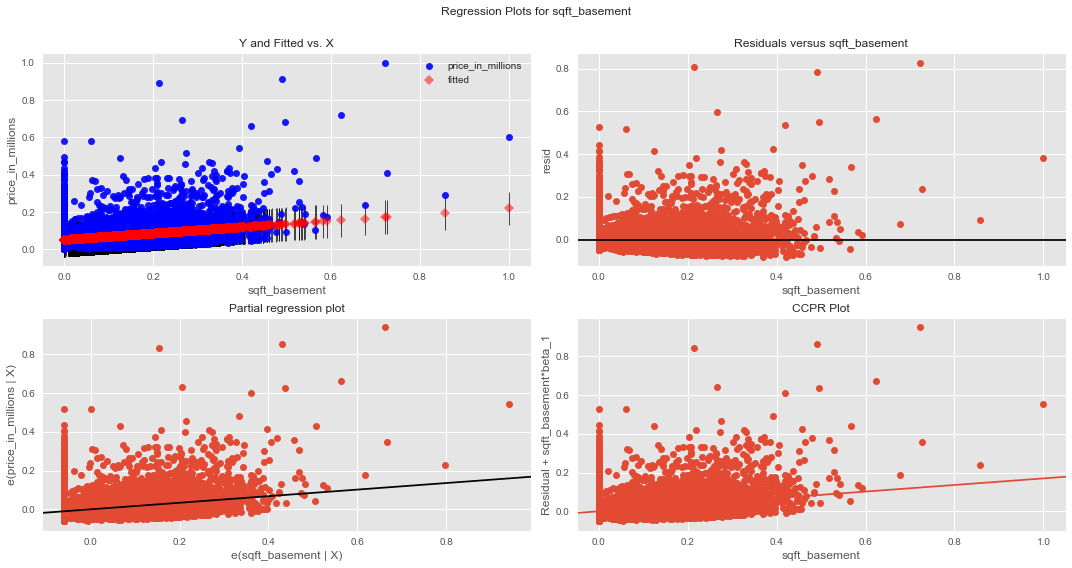

In [60]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_basement", fig=fig)
plt.show()

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


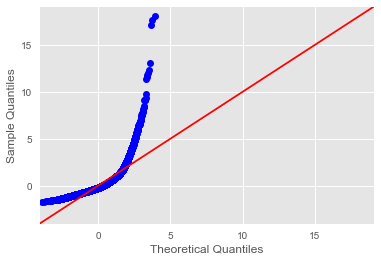

In [61]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show() 

### sqft_living15

In [62]:
f = 'price_in_millions~sqft_living15'

In [63]:
model = ols(formula=f, data=kclr1).fit() 

In [64]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_in_millions   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     9069.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:15:05   Log-Likelihood:                 38633.
No. Observations:               21597   AIC:                        -7.726e+04
Df Residuals:                   21595   BIC:                        -7.725e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0635      0.001    -47.640      0.000      -0.066      -0.061
sqft_living15     0.2197      0.002     95.230      0.000       0.215       0.224
==============================================================================
Omnibus:                    20314.294   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1914774.434
Skew:                           4.272   Prob(JB):                         0.00
Kurtosis:                      48.330   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
model.predict() 

array([0.03351261, 0.05208745, 0.09018047, ..., 0.01167135, 0.03758844,
       0.01167135])

   sqft_living15
0            0.0
1            1.0
0   -0.063457
1    0.156259
dtype: float64


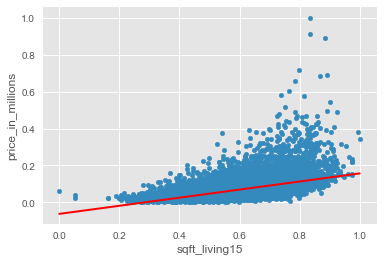

In [66]:
X_new = pd.DataFrame({'sqft_living15': [kclr1.sqft_living15.min(), kclr1.sqft_living15.max()]})
print(X_new.head())
preds = model.predict(X_new)
print (preds)
kclr1.plot(kind='scatter', x='sqft_living15', y='price_in_millions')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

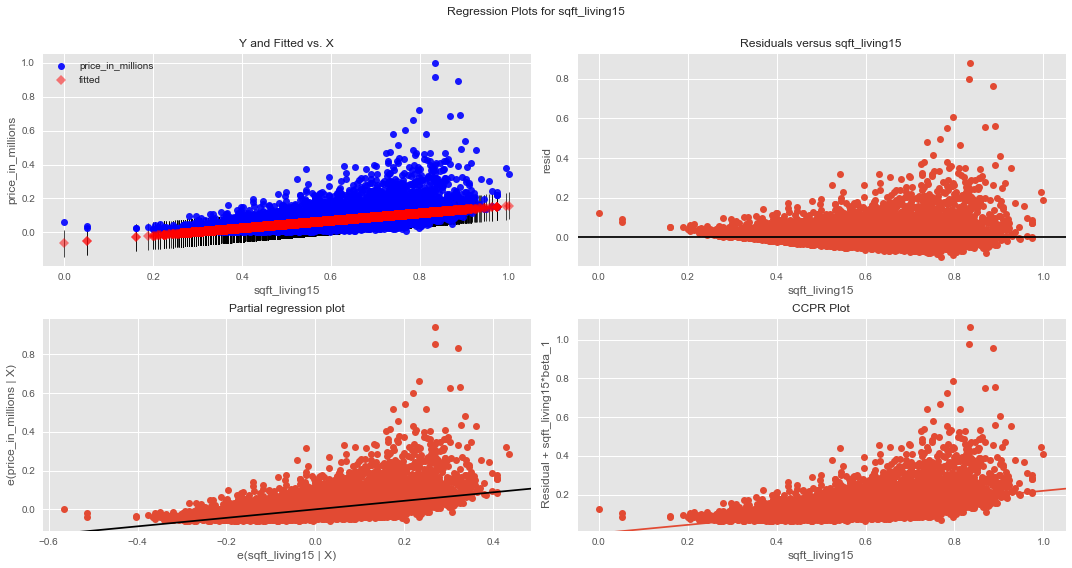

In [67]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living15", fig=fig)
plt.show()

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


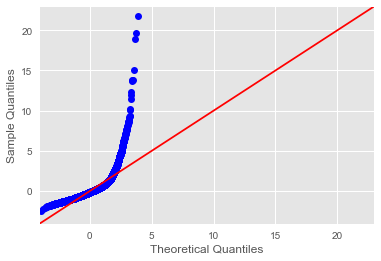

In [68]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show() 

### bedrooms

In [69]:
f = 'price_in_millions~bedrooms'

In [70]:
model = ols(formula=f, data=kclr1).fit() 

In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_in_millions   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2276.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:15:07   Log-Likelihood:                 35929.
No. Observations:               21597   AIC:                        -7.185e+04
Df Residuals:                   21595   BIC:                        -7.184e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0225      0.001     26.251      0.000       0.021       0.024
bedrooms       0.5142      0.011     47.709      0.000       0.493       0.535
==============================================================================
Omnibus:                    18831.341   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1195104.832
Skew:                           3.900   Prob(JB):                         0.00
Kurtosis:                      38.598   Cond. No.                         34.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
model.predict() 

array([0.05465663, 0.05465663, 0.0385894 , ..., 0.0385894 , 0.05465663,
       0.0385894 ])

   bedrooms
0       0.0
1       1.0
0    0.022522
1    0.536674
dtype: float64


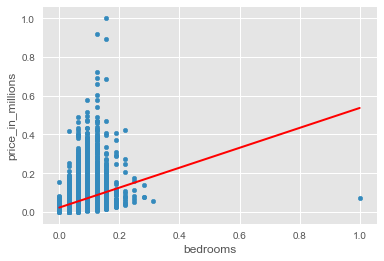

In [73]:
X_new = pd.DataFrame({'bedrooms': [kclr1.bedrooms.min(), kclr1.bedrooms.max()]})
print(X_new.head())
preds = model.predict(X_new)
print (preds)
kclr1.plot(kind='scatter', x='bedrooms', y='price_in_millions')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

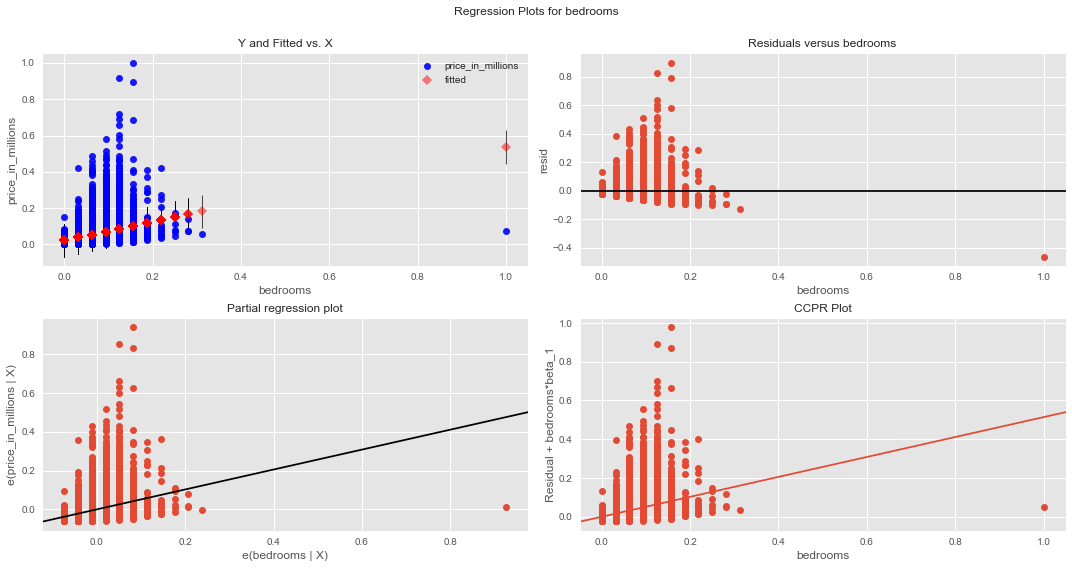

In [74]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bedrooms", fig=fig)
plt.show()

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


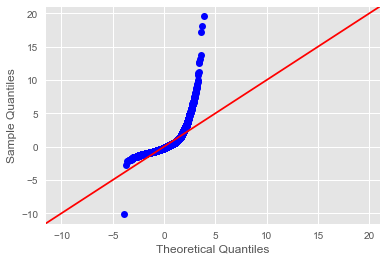

In [75]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show() 

### sqft_lot15

In [76]:
f = 'price_in_millions~sqft_lot15'

In [77]:
model = ols(formula=f, data=kclr1).fit() 

In [78]:
model.predict() 

array([0.05803692, 0.0607704 , 0.06124984, ..., 0.047937  , 0.04320958,
       0.04378687])

In [79]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_in_millions   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     474.3
Date:                Tue, 10 Nov 2020   Prob (F-statistic):          4.83e-104
Time:                        09:15:10   Log-Likelihood:                 35082.
No. Observations:               21597   AIC:                        -7.016e+04
Df Residuals:                   21595   BIC:                        -7.014e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0354      0.001     29.426      0.000       0.033       0.038
sqft_lot15     0.0862      0.004     21.779      0.000       0.078       0.094
==============================================================================
Omnibus:                    18830.246   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1103386.253
Skew:                           3.931   Prob(JB):                         0.00
Kurtosis:                      37.122   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

   sqft_lot15
0    0.000000
1    0.693147
0    0.035413
1    0.095155
dtype: float64


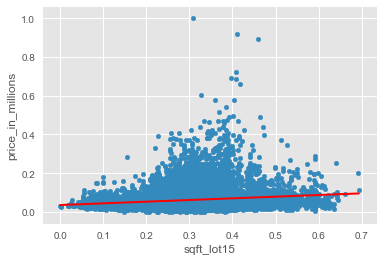

In [80]:
X_new = pd.DataFrame({'sqft_lot15': [kclr1.sqft_lot15.min(), kclr1.sqft_lot15.max()]})
print(X_new.head())
preds = model.predict(X_new)
print (preds)
kclr1.plot(kind='scatter', x='sqft_lot15', y='price_in_millions')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

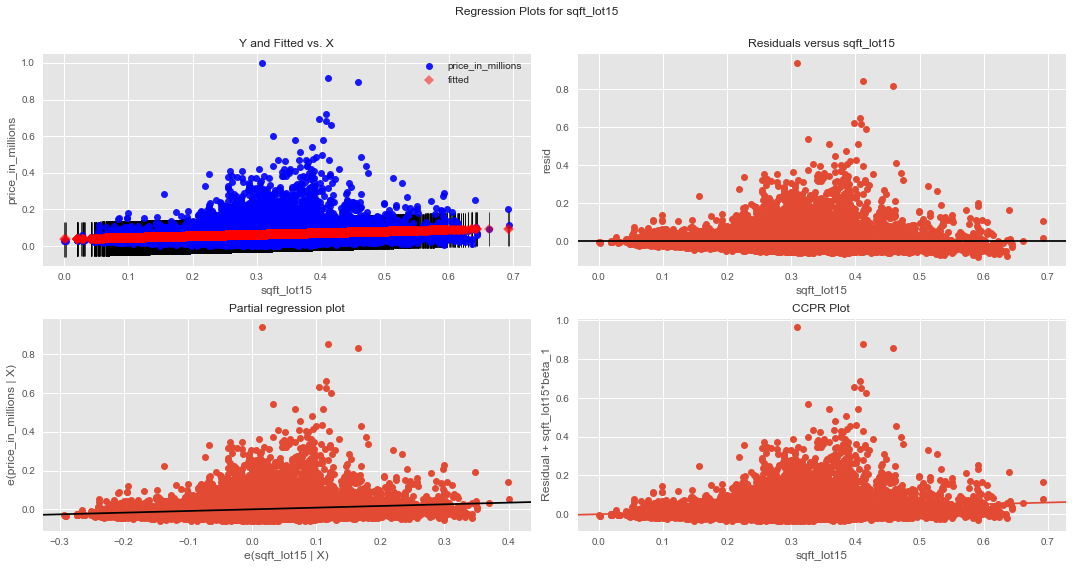

In [81]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_lot15", fig=fig)
plt.show()

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


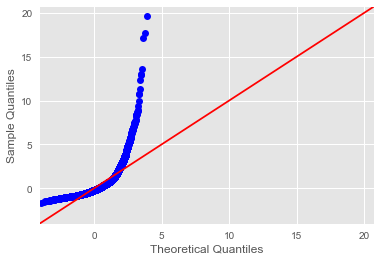

In [82]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show() 

### waterfront

In [83]:
f = 'price_in_millions~waterfront'

In [84]:
model = ols(formula=f, data=kclr1).fit() 

In [85]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_in_millions   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1513.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):          7.61e-320
Time:                        09:15:13   Log-Likelihood:                 35578.
No. Observations:               21597   AIC:                        -7.115e+04
Df Residuals:                   21595   BIC:                        -7.114e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0596      0.000    187.268      0.000       0.059       0.060
waterfront     0.1447      0.004     38.891      0.000       0.137       0.152
==============================================================================
Omnibus:                    17704.514   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           911731.193
Skew:                           3.599   Prob(JB):                         0.00
Kurtosis:                      34.006   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
model.predict() 

array([0.05959435, 0.05959435, 0.05959435, ..., 0.05959435, 0.05959435,
       0.05959435])

   waterfront
0         0.0
1         1.0
0    0.059594
1    0.204291
dtype: float64


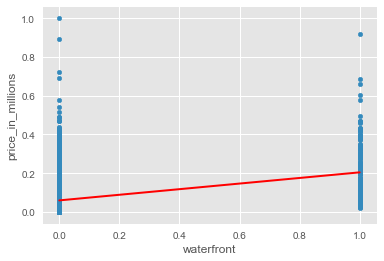

In [87]:
X_new = pd.DataFrame({'waterfront': [kclr1.waterfront.min(), kclr1.waterfront.max()]})
print(X_new.head())
preds = model.predict(X_new)
print (preds)
kclr1.plot(kind='scatter', x='waterfront', y='price_in_millions')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

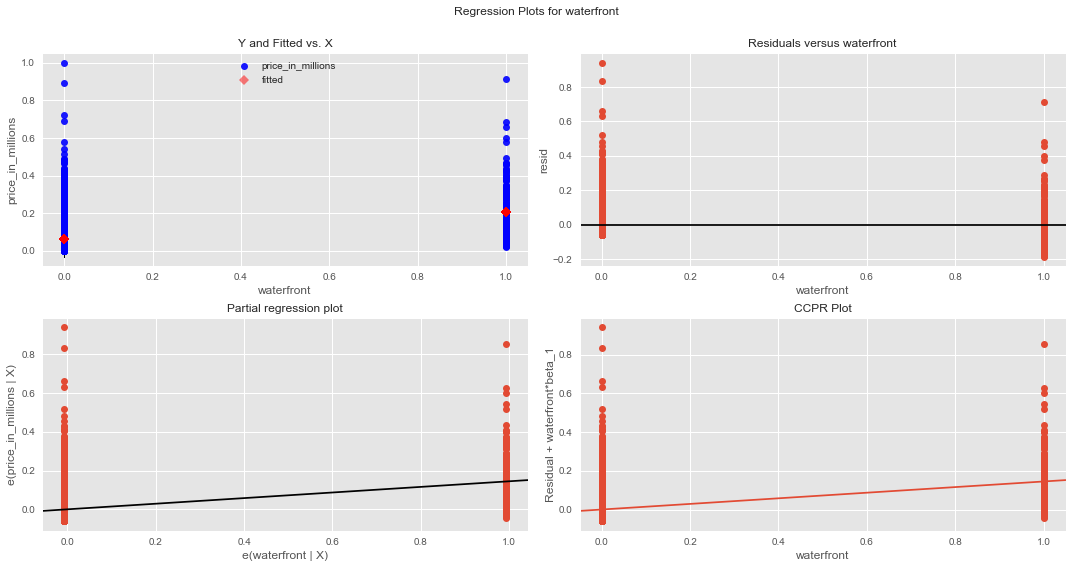

In [88]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "waterfront", fig=fig)
plt.show()

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


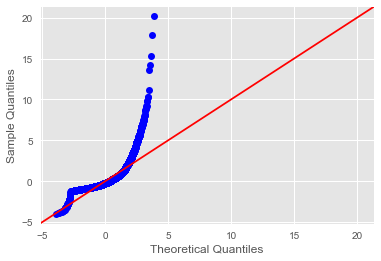

In [89]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show() 

### lat

In [90]:
f = 'price_in_millions~lat'

In [91]:
model = ols(formula=f, data=kclr1).fit() 

In [92]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_in_millions   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     2242.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:15:17   Log-Likelihood:                 35914.
No. Observations:               21597   AIC:                        -7.182e+04
Df Residuals:                   21595   BIC:                        -7.181e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0175      0.001     18.208      0.000       0.016       0.019
lat            0.0663      0.001     47.351      0.000       0.064       0.069
==============================================================================
Omnibus:                    20309.325   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1511477.644
Skew:                           4.367   Prob(JB):                         0.00
Kurtosis:                      43.042   Cond. No.                         6.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
model.predict() 

array([0.05543653, 0.07782008, 0.07962314, ..., 0.06431313, 0.05792241,
       0.06428113])

   lat
0  0.0
1  1.0
0    0.017530
1    0.083859
dtype: float64


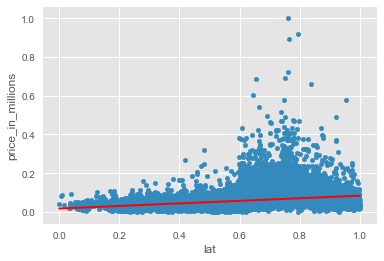

In [94]:
X_new = pd.DataFrame({'lat': [kclr1.lat.min(), kclr1.lat.max()]})
print(X_new.head())
preds = model.predict(X_new)
print (preds)
kclr1.plot(kind='scatter', x='lat', y='price_in_millions')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

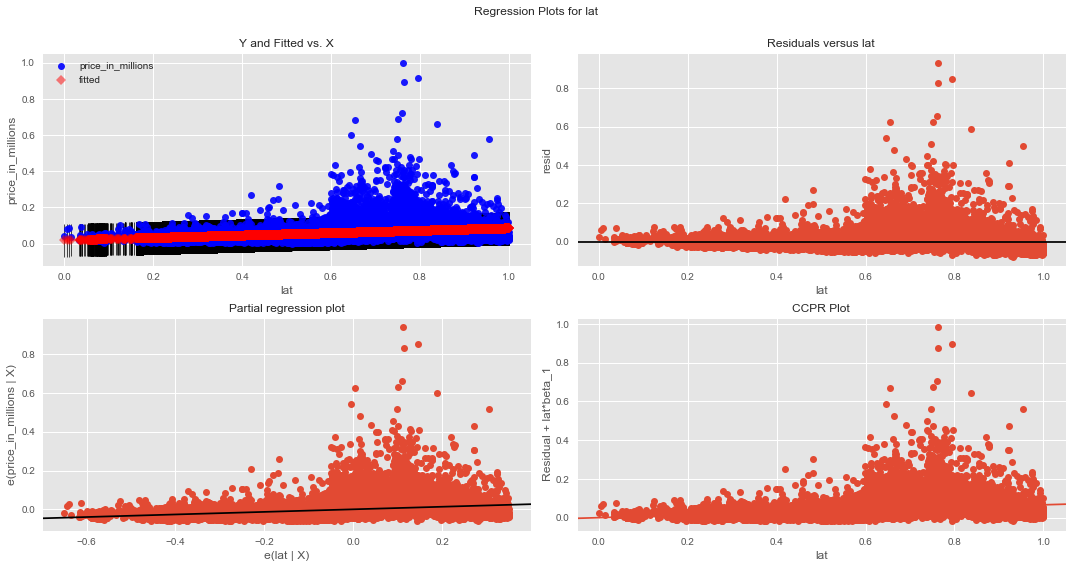

In [95]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "lat", fig=fig)
plt.show() 

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


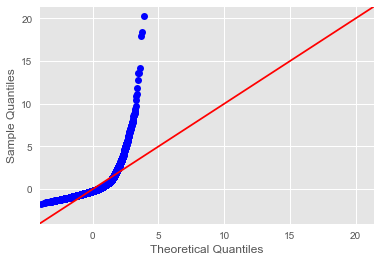

In [96]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show() 

### long

In [97]:
f = 'price_in_millions~long'

In [98]:
model = ols(formula=f, data=kclr1).fit() 

In [99]:
model.predict() 

array([0.06032825, 0.0598603 , 0.06050939, ..., 0.06001125, 0.06174718,
       0.06001125])

In [100]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_in_millions   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     10.49
Date:                Tue, 10 Nov 2020   Prob (F-statistic):            0.00120
Time:                        09:15:21   Log-Likelihood:                 34852.
No. Observations:               21597   AIC:                        -6.970e+04
Df Residuals:                   21595   BIC:                        -6.968e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0584      0.001     74.548      0.000       0.057       0.060
long           0.0091      0.003      3.239      0.001       0.004       0.015
==============================================================================
Omnibus:                    19133.231   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1137712.625
Skew:                           4.032   Prob(JB):                         0.00
Kurtosis:                      37.630   Cond. No.                         9.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

   long
0   0.0
1   1.0
0    0.058351
1    0.067438
dtype: float64


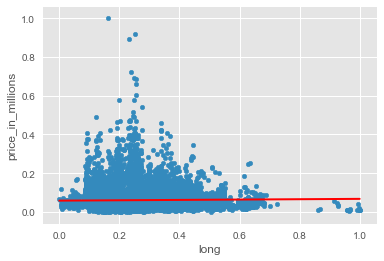

In [101]:
X_new = pd.DataFrame({'long': [kclr1.long.min(), kclr1.long.max()]})
print(X_new.head())
preds = model.predict(X_new)
print (preds)
kclr1.plot(kind='scatter', x='long', y='price_in_millions')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

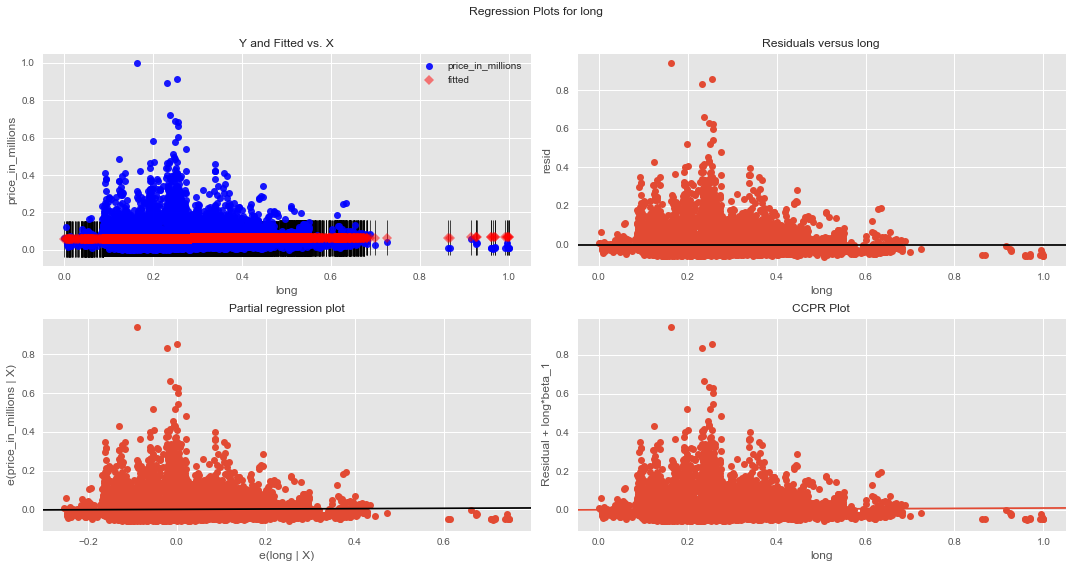

In [102]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "long", fig=fig)
plt.show()

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


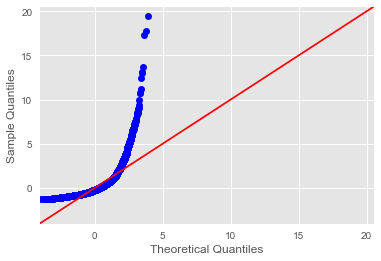

In [103]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show() 

### year

In [104]:
f = 'price_in_millions~year'

In [105]:
model = ols(formula=f, data=kclr1).fit() 

In [106]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_in_millions   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3000
Date:                Tue, 10 Nov 2020   Prob (F-statistic):              0.584
Time:                        09:15:24   Log-Likelihood:                 34847.
No. Observations:               21597   AIC:                        -6.969e+04
Df Residuals:                   21595   BIC:                        -6.967e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0605      0.000    151.854      0.000       0.060       0.061
year           0.0004      0.001      0.548      0.584      -0.001       0.002
==============================================================================
Omnibus:                    19104.341   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1131922.786
Skew:                           4.023   Prob(JB):                         0.00
Kurtosis:                      37.542   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
model.predict() 

array([0.06052885, 0.06052885, 0.06091302, ..., 0.06052885, 0.06091302,
       0.06052885])

   year
0   0.0
1   1.0
0    0.060529
1    0.060913
dtype: float64


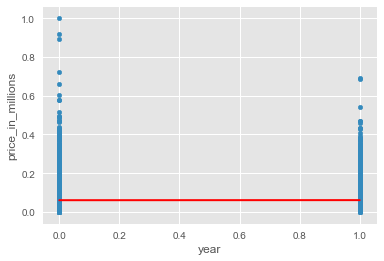

In [108]:
X_new = pd.DataFrame({'year': [kclr1.year.min(), kclr1.year.max()]})
print(X_new.head())
preds = model.predict(X_new)
print (preds)
kclr1.plot(kind='scatter', x='year', y='price_in_millions')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

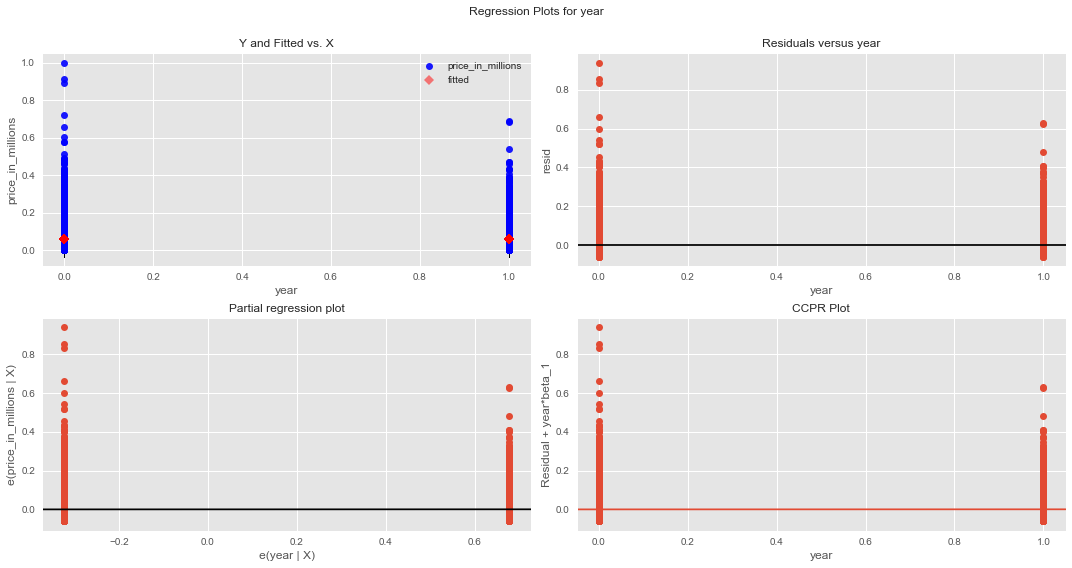

In [109]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "year", fig=fig)
plt.show()

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


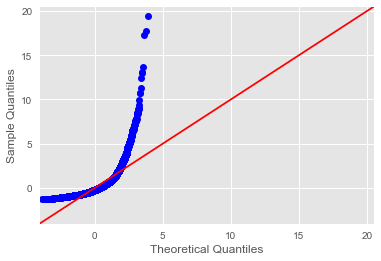

In [110]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show() 

### yr_built

In [111]:
f = 'price_in_millions~yr_built'

In [112]:
model = ols(formula=f, data=kclr1).fit() 

In [113]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_in_millions   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     63.05
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           2.12e-15
Time:                        09:15:27   Log-Likelihood:                 34879.
No. Observations:               21597   AIC:                        -6.975e+04
Df Residuals:                   21595   BIC:                        -6.974e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0544      0.001     63.465      0.000       0.053       0.056
yr_built       0.0102      0.001      7.940      0.000       0.008       0.013
==============================================================================
Omnibus:                    19135.901   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1142512.023
Skew:                           4.031   Prob(JB):                         0.00
Kurtosis:                      37.708   Cond. No.                         5.48
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
model.predict() 

array([0.05923654, 0.05888244, 0.05728897, ..., 0.06401693, 0.0635743 ,
       0.0639284 ])

   yr_built
0       0.0
1       1.0
0    0.054368
1    0.064548
dtype: float64


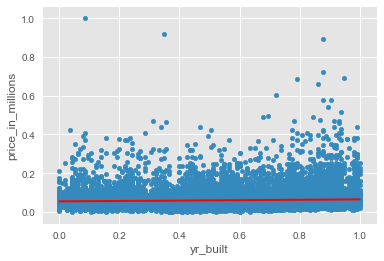

In [115]:
X_new = pd.DataFrame({'yr_built': [kclr1.yr_built.min(), kclr1.yr_built.max()]})
print(X_new.head())
preds = model.predict(X_new)
print (preds)
kclr1.plot(kind='scatter', x='yr_built', y='price_in_millions')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

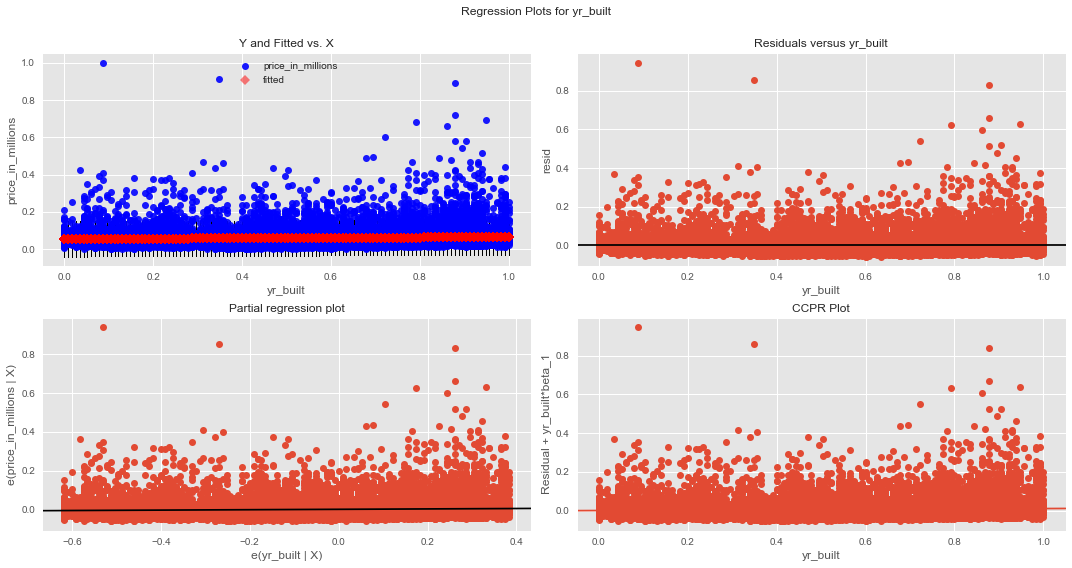

In [116]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "yr_built", fig=fig)
plt.show()

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


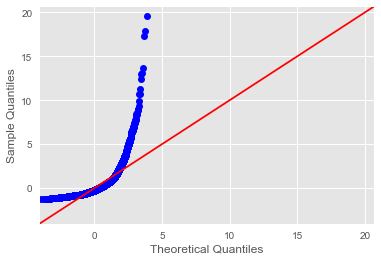

In [117]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show() 

### yr_age_of_renovation

In [118]:
f = 'price_in_millions~yr_age_of_renovation'

In [119]:
model = ols(formula=f, data=kclr1).fit() 

In [120]:
model.predict() 

array([0.05970868, 0.06266694, 0.05970868, ..., 0.05970868, 0.0600045 ,
       0.05970868])

In [121]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_in_millions   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     24.44
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           7.74e-07
Time:                        09:15:30   Log-Likelihood:                 34859.
No. Observations:               21597   AIC:                        -6.971e+04
Df Residuals:                   21595   BIC:                        -6.970e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0597      0.000    157.382      0.000       0.059       0.060
yr_age_of_renovation     0.0084      0.002      4.943      0.000       0.005       0.012
==============================================================================
Omnibus:                    19085.427   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1124789.793
Skew:                           4.019   Prob(JB):                         0.00
Kurtosis:                      37.429   Cond. No.                         5.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

   yr_age_of_renovation
0                   0.0
1                   1.0
0    0.059709
1    0.068140
dtype: float64


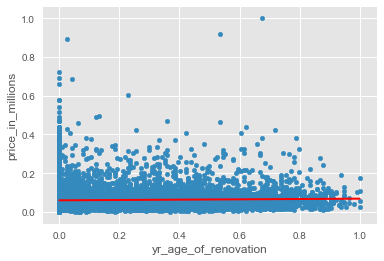

In [122]:
X_new = pd.DataFrame({'yr_age_of_renovation': [kclr1.yr_age_of_renovation.min(), kclr1.yr_age_of_renovation.max()]})
print(X_new.head())
preds = model.predict(X_new)
print (preds)
kclr1.plot(kind='scatter', x='yr_age_of_renovation', y='price_in_millions')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

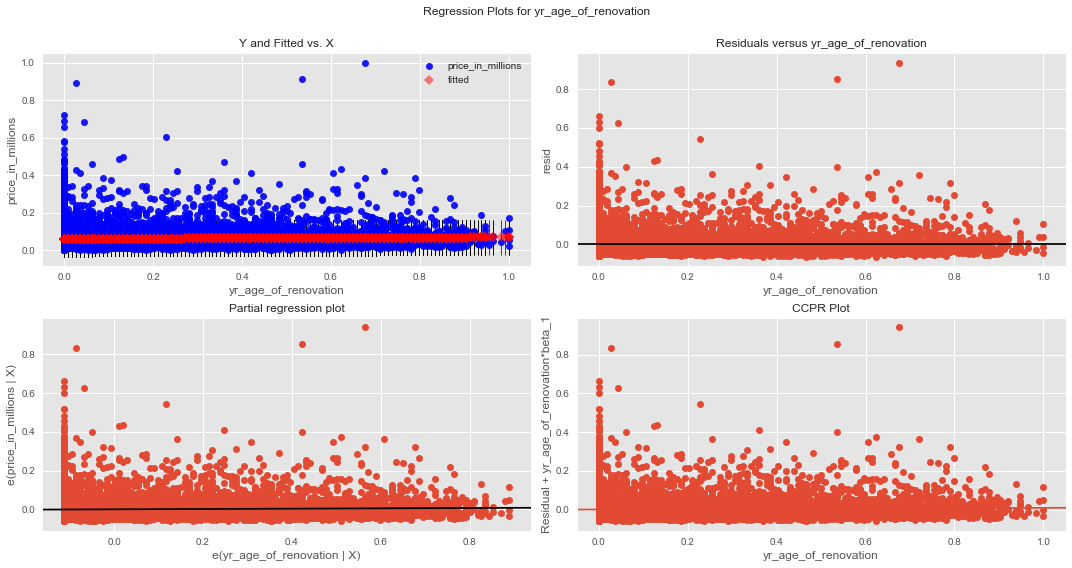

In [123]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "yr_age_of_renovation", fig=fig)
plt.show()

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


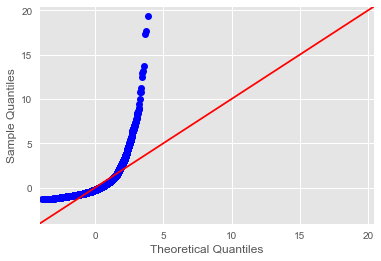

In [124]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show() 

### yr_age_of_house

In [125]:
f = 'price_in_millions~yr_age_of_house'

In [126]:
model = ols(formula=f, data=kclr1).fit() 

In [127]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_in_millions   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     62.90
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           2.28e-15
Time:                        09:15:32   Log-Likelihood:                 34878.
No. Observations:               21597   AIC:                        -6.975e+04
Df Residuals:                   21595   BIC:                        -6.974e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0646      0.001    108.925      0.000       0.063       0.066
yr_age_of_house    -0.0103      0.001     -7.931      0.000      -0.013      -0.008
==============================================================================
Omnibus:                    19135.572   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1142372.495
Skew:                           4.031   Prob(JB):                         0.00
Kurtosis:                      37.706   Cond. No.                         4.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
model.predict() 

array([0.05926685, 0.05891319, 0.05723328, ..., 0.06404132, 0.06351082,
       0.0639529 ])

   yr_age_of_house
0              0.0
1              1.0
0    0.064572
1    0.054316
dtype: float64


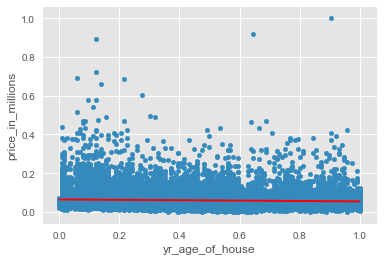

In [129]:
X_new = pd.DataFrame({'yr_age_of_house': [kclr1.yr_age_of_house.min(), kclr1.yr_age_of_house.max()]})
print(X_new.head())
preds = model.predict(X_new)
print (preds)
kclr1.plot(kind='scatter', x='yr_age_of_house', y='price_in_millions')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

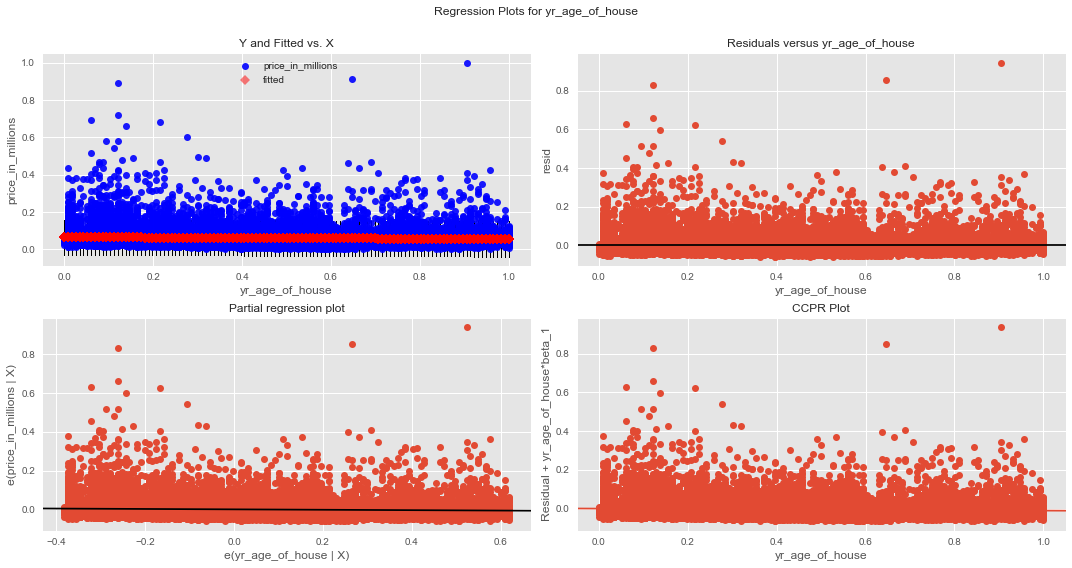

In [130]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "yr_age_of_house", fig=fig)
plt.show()

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


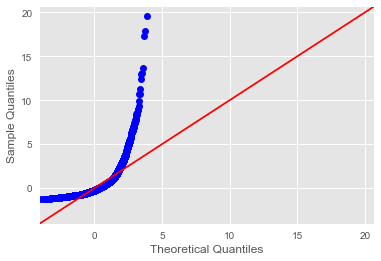

In [131]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show() 

### condition

In [132]:
f = 'price_in_millions~condition'

In [133]:
model = ols(formula=f, data=kclr1).fit() 

In [134]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_in_millions   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.11
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           1.16e-07
Time:                        09:15:35   Log-Likelihood:                 34861.
No. Observations:               21597   AIC:                        -6.972e+04
Df Residuals:                   21595   BIC:                        -6.970e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0542      0.001     43.109      0.000       0.052       0.057
condition      0.0107      0.002      5.302      0.000       0.007       0.015
==============================================================================
Omnibus:                    19113.390   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1136802.126
Skew:                           4.025   Prob(JB):                         0.00
Kurtosis:                      37.619   Cond. No.                         8.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
model.predict() 

array([0.05955812, 0.05955812, 0.05955812, ..., 0.05955812, 0.05955812,
       0.05955812])

   condition
0        0.0
1        1.0
0    0.054215
1    0.064901
dtype: float64


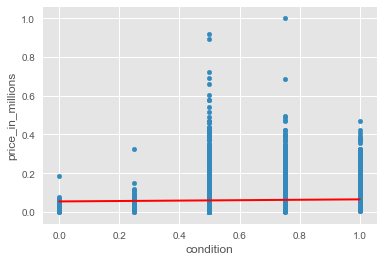

In [136]:
X_new = pd.DataFrame({'condition': [kclr1.condition.min(), kclr1.condition.max()]})
print(X_new.head())
preds = model.predict(X_new)
print (preds)
kclr1.plot(kind='scatter', x='condition', y='price_in_millions')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

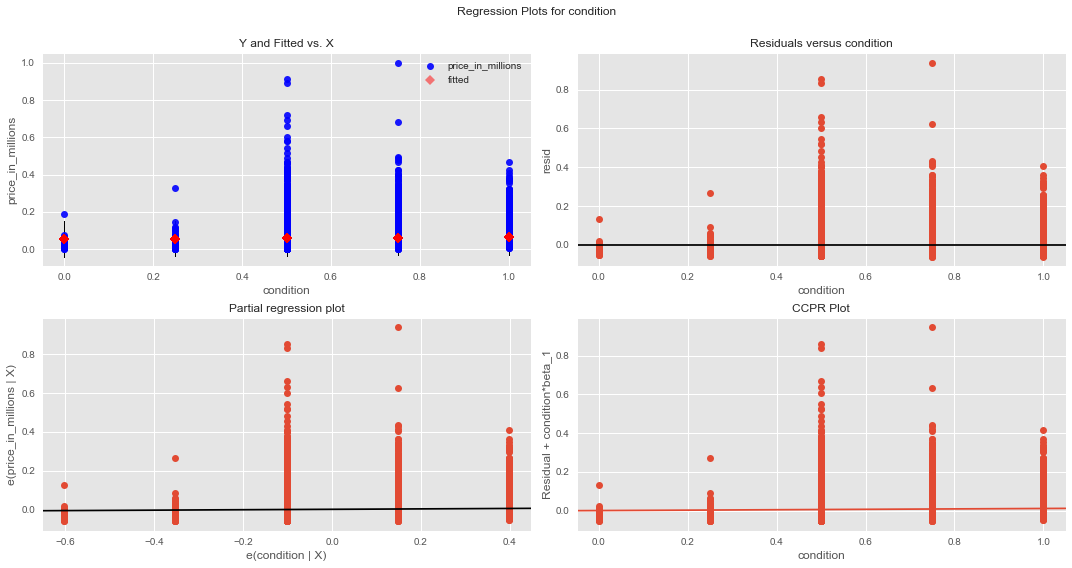

In [137]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "condition", fig=fig)
plt.show()

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


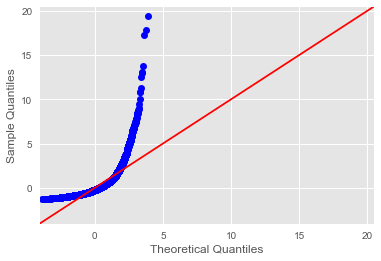

In [138]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show() 

### zipcode

In [139]:
f = 'price_in_millions~zipcode'

In [140]:
model = ols(formula=f, data=kclr1).fit() 

In [141]:
model.predict() 

array([0.05584073, 0.05838997, 0.06305554, ..., 0.05747609, 0.06310364,
       0.05747609])

In [142]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_in_millions   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     61.76
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           4.06e-15
Time:                        09:15:38   Log-Likelihood:                 34878.
No. Observations:               21597   AIC:                        -6.975e+04
Df Residuals:                   21595   BIC:                        -6.974e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0644      0.001    112.183      0.000       0.063       0.065
zipcode       -0.0095      0.001     -7.859      0.000      -0.012      -0.007
==============================================================================
Omnibus:                    19044.296   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1123391.740
Skew:                           4.004   Prob(JB):                         0.00
Kurtosis:                      37.413   Cond. No.                         4.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

   zipcode
0      0.0
1      1.0
0    0.064354
1    0.054831
dtype: float64


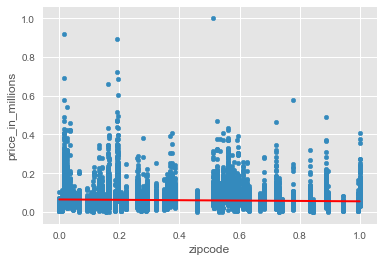

In [143]:
X_new = pd.DataFrame({'zipcode': [kclr1.zipcode.min(), kclr1.zipcode.max()]})
print(X_new.head())
preds = model.predict(X_new)
print (preds)
kclr1.plot(kind='scatter', x='zipcode', y='price_in_millions')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

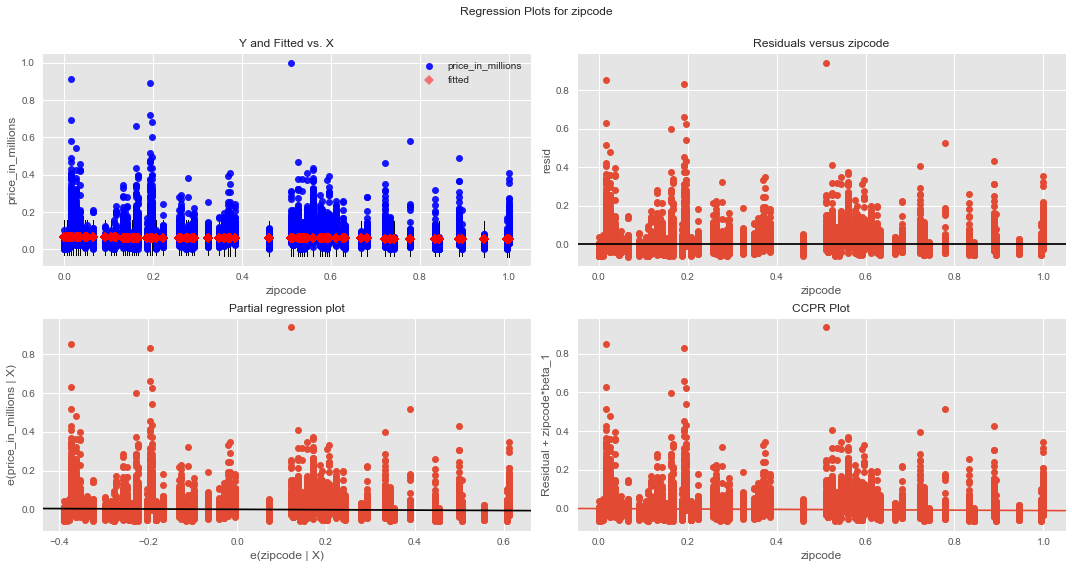

In [144]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "zipcode", fig=fig)
plt.show()

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


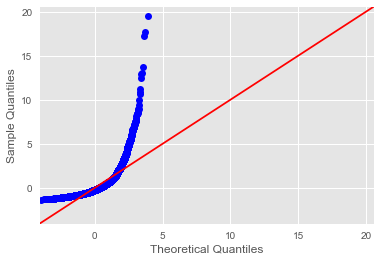

In [145]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show() 

### day

In [146]:
f = 'price_in_millions~day'

In [147]:
model = ols(formula=f, data=kclr1).fit() 

In [148]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_in_millions   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.658
Date:                Tue, 10 Nov 2020   Prob (F-statistic):             0.0309
Time:                        09:15:41   Log-Likelihood:                 34849.
No. Observations:               21597   AIC:                        -6.969e+04
Df Residuals:                   21595   BIC:                        -6.968e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0619      0.001     95.593      0.000       0.061       0.063
day           -0.0025      0.001     -2.158      0.031      -0.005      -0.000
==============================================================================
Omnibus:                    19100.321   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1130369.378
Skew:                           4.022   Prob(JB):                         0.00
Kurtosis:                      37.517   Cond. No.                         4.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
model.predict() 

array([0.0608732 , 0.06120106, 0.05988962, ..., 0.06005355, 0.0606273 ,
       0.06070927])

   day
0  0.0
1  1.0
0    0.061857
1    0.059398
dtype: float64


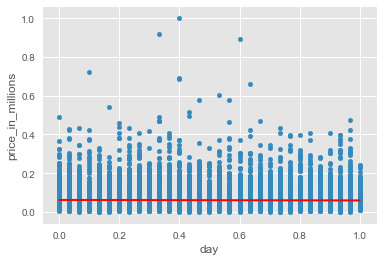

In [150]:
X_new = pd.DataFrame({'day': [kclr1.day.min(), kclr1.day.max()]})
print(X_new.head())
preds = model.predict(X_new)
print (preds)
kclr1.plot(kind='scatter', x='day', y='price_in_millions')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

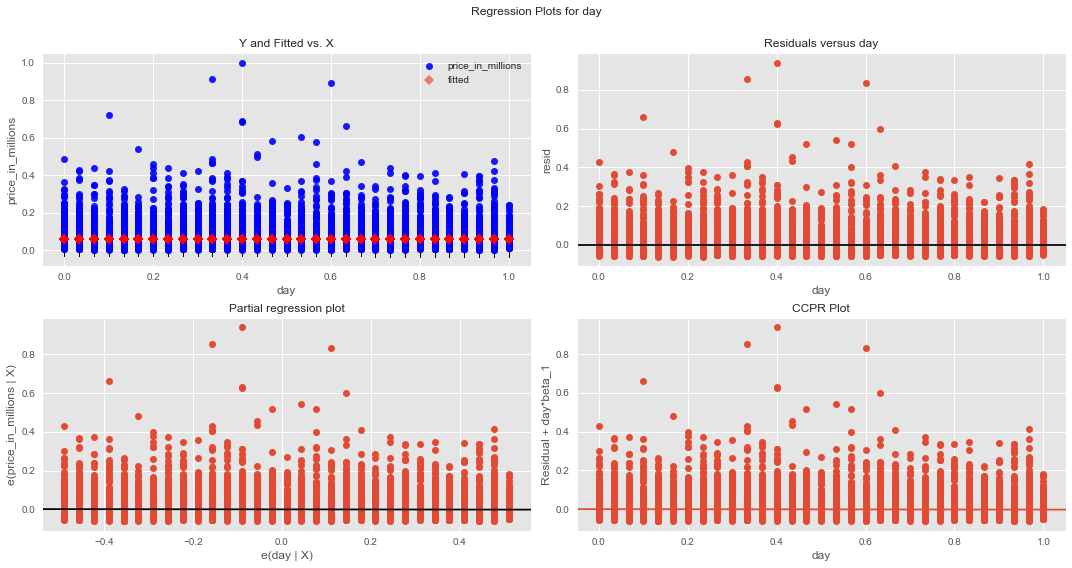

In [151]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "day", fig=fig)
plt.show()

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


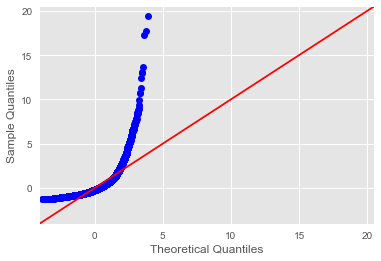

In [152]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show() 

### month

In [153]:
f = 'price_in_millions~month'

In [154]:
model = ols(formula=f, data=kclr1).fit() 

In [155]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_in_millions   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.129
Date:                Tue, 10 Nov 2020   Prob (F-statistic):              0.145
Time:                        09:15:43   Log-Likelihood:                 34848.
No. Observations:               21597   AIC:                        -6.969e+04
Df Residuals:                   21595   BIC:                        -6.968e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0615      0.001     91.493      0.000       0.060       0.063
month         -0.0017      0.001     -1.459      0.145      -0.004       0.001
==============================================================================
Omnibus:                    19108.430   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1133360.178
Skew:                           4.024   Prob(JB):                         0.00
Kurtosis:                      37.564   Cond. No.                         4.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
model.predict() 

array([0.06012662, 0.05981939, 0.06135556, ..., 0.06074109, 0.06150918,
       0.06012662])

   month
0    0.0
1    1.0
0    0.061509
1    0.059819
dtype: float64


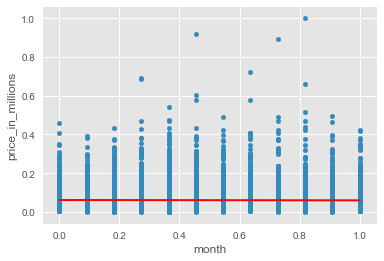

In [157]:
X_new = pd.DataFrame({'month': [kclr1.month.min(), kclr1.month.max()]})
print(X_new.head())
preds = model.predict(X_new)
print (preds)
kclr1.plot(kind='scatter', x='month', y='price_in_millions')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

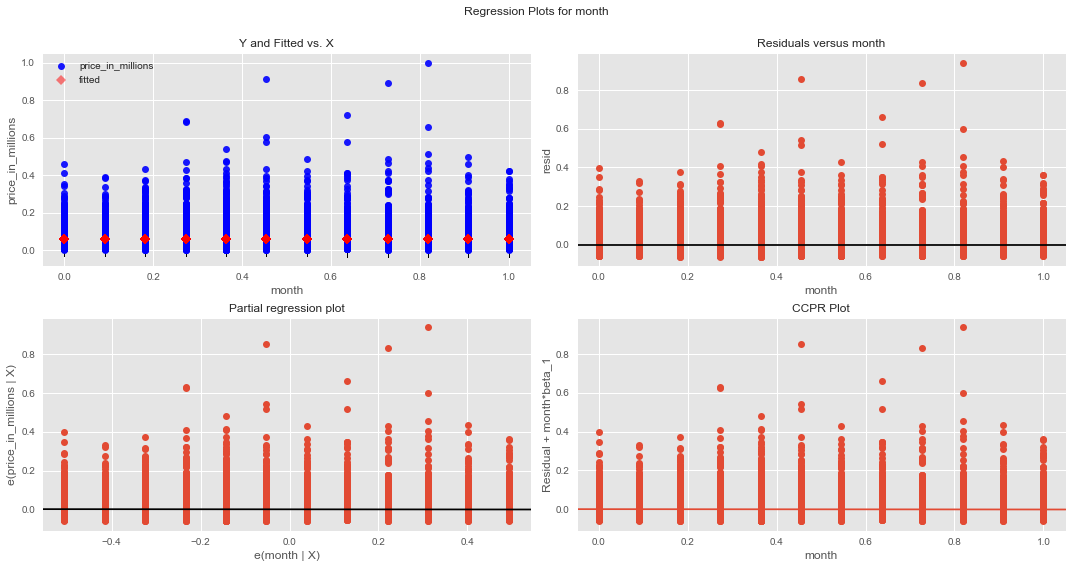

In [158]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "month", fig=fig)
plt.show()

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


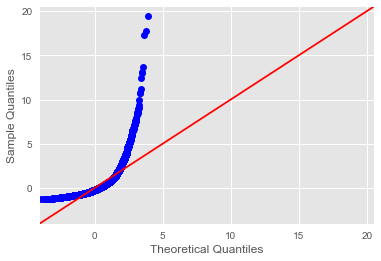

In [159]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show() 

### floors

In [160]:
f = 'price_in_millions~floors'

In [161]:
model = ols(formula=f, data=kclr1).fit() 

In [162]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_in_millions   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     1525.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):          2.57e-322
Time:                        09:15:46   Log-Likelihood:                 35584.
No. Observations:               21597   AIC:                        -7.116e+04
Df Residuals:                   21595   BIC:                        -7.115e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0493      0.000    114.762      0.000       0.048       0.050
floors         0.0573      0.001     39.047      0.000       0.054       0.060
==============================================================================
Omnibus:                    19356.966   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1255747.571
Skew:                           4.076   Prob(JB):                         0.00
Kurtosis:                      39.456   Cond. No.                         4.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
model.predict() 

array([0.04932092, 0.07225572, 0.04932092, ..., 0.07225572, 0.07225572,
       0.07225572])

   floors
0     0.0
1     1.0
0    0.049321
1    0.106658
dtype: float64


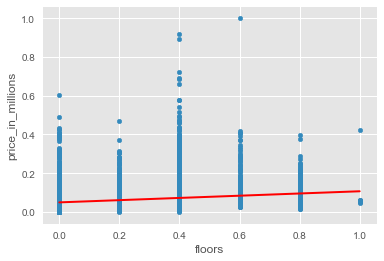

In [164]:
X_new = pd.DataFrame({'floors': [kclr1.floors.min(), kclr1.floors.max()]})
print(X_new.head())
preds = model.predict(X_new)
print (preds)
kclr1.plot(kind='scatter', x='floors', y='price_in_millions')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

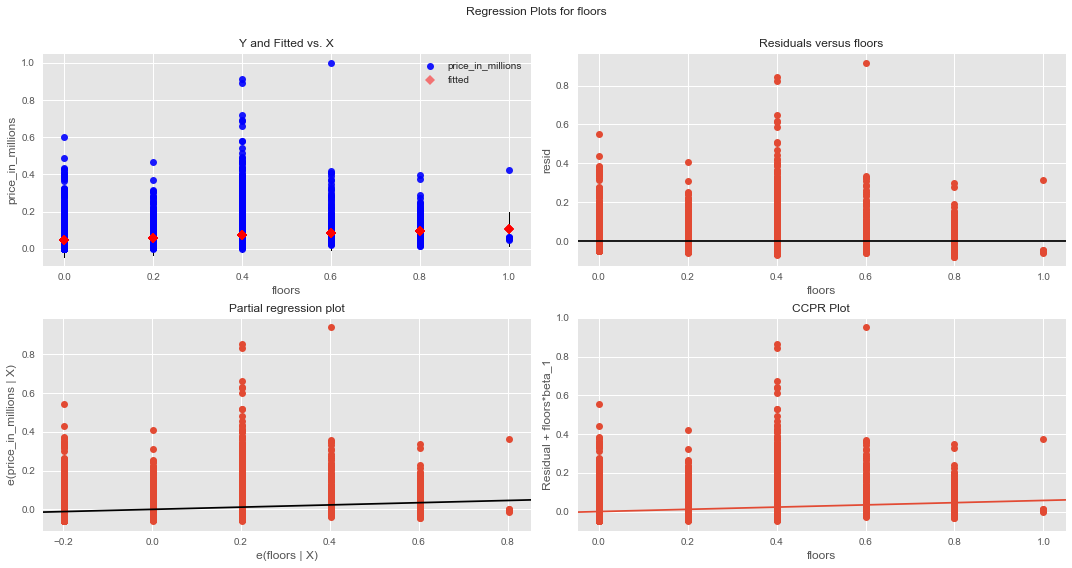

In [165]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "floors", fig=fig)
plt.show()

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


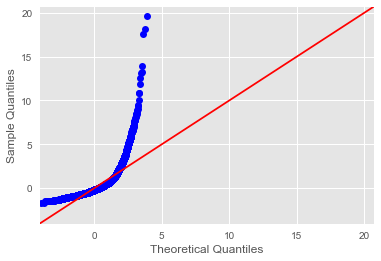

In [166]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show() 

### Model1 Size parameters
*  sqft_living+sqft_living15+sqft_above+sqft_basement+sqft_lot15

In [167]:
f = 'price_in_millions~sqft_living+sqft_living15+sqft_above+sqft_basement+sqft_lot15'

In [168]:
model = ols(formula=f, data=kclr1).fit() 

In [169]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_in_millions   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     3501.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:15:49   Log-Likelihood:                 41259.
No. Observations:               21597   AIC:                        -8.251e+04
Df Residuals:                   21591   BIC:                        -8.246e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0420      0.001    -30.791      0.000      -0.045      -0.039
sqft_living      -0.2369      0.011    -22.372      0.000      -0.258      -0.216
sqft_living15     0.0902      0.003     27.980      0.000       0.084       0.096
sqft_above        0.3434      0.009     40.142      0.000       0.327       0.360
sqft_basement     0.3022      0.007     44.448      0.000       0.289       0.316
sqft_lot15       -0.0534      0.003    -16.586      0.000      -0.060      -0.047
==============================================================================
Omnibus:                    17564.153   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1129396.785
Skew:                           3.468   Prob(JB):                         0.00
Kurtosis:                      37.741   Cond. No.                         82.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model2 Visual Parameters
view+grade+condition+floors+bedrooms+waterfront

In [170]:
f = 'price_in_millions~view+grade+condition+floors+bedrooms+waterfront'

In [171]:
model = ols(formula=f, data=kclr1).fit() 

In [172]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_in_millions   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     4157.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:15:49   Log-Likelihood:                 43140.
No. Observations:               21597   AIC:                        -8.627e+04
Df Residuals:                   21590   BIC:                        -8.621e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0871      0.001    -63.712      0.000      -0.090      -0.084
view           0.0455      0.001     34.959      0.000       0.043       0.048
grade          0.2493      0.002    106.443      0.000       0.245       0.254
condition      0.0323      0.001     22.495      0.000       0.029       0.035
floors        -0.0034      0.001     -2.853      0.004      -0.006      -0.001
bedrooms       0.1304      0.008     15.705      0.000       0.114       0.147
waterfront     0.0786      0.003     27.856      0.000       0.073       0.084
==============================================================================
Omnibus:                    18885.528   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2024875.461
Skew:                           3.719   Prob(JB):                         0.00
Kurtosis:                      49.849   Cond. No.                         47.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model3 Datetime Parameter
* yr_built+year+month+day+yr_age_of_house+yr_age_of_renovation

In [173]:
f = 'price_in_millions~yr_built+year+month+day+yr_age_of_house+yr_age_of_renovation'

In [174]:
model = ols(formula=f, data=kclr1).fit() 

In [175]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_in_millions   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     38.75
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           4.06e-47
Time:                        09:15:49   Log-Likelihood:                 34963.
No. Observations:               21597   AIC:                        -6.991e+04
Df Residuals:                   21590   BIC:                        -6.986e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             9.193e+10   6.32e+10      1.454      0.146    -3.2e+10    2.16e+11
yr_built             -9.193e+10   6.32e+10     -1.454      0.146   -2.16e+11     3.2e+10
year                  7.994e+08    5.5e+08      1.454      0.146   -2.79e+08    1.88e+09
month                   -0.0034      0.002     -1.810      0.070      -0.007       0.000
day                     -0.0028      0.001     -2.450      0.014      -0.005      -0.001
yr_age_of_house      -9.273e+10   6.38e+10     -1.454      0.146   -2.18e+11    3.23e+10
yr_age_of_renovation     0.0274      0.002     12.652      0.000       0.023       0.032
==============================================================================
Omnibus:                    19116.303   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1135065.914
Skew:                           4.027   Prob(JB):                         0.00
Kurtosis:                      37.590   Cond. No.                     4.94e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.9e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Model4 Location parameters
* lat+long+zipcode

In [176]:
f = 'price_in_millions~lat+long+zipcode'

In [177]:
model = ols(formula=f, data=kclr1).fit() 

In [178]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_in_millions   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     926.1
Date:                Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:15:49   Log-Likelihood:                 36154.
No. Observations:               21597   AIC:                        -7.230e+04
Df Residuals:                   21593   BIC:                        -7.227e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0249      0.001     16.968      0.000       0.022       0.028
lat            0.0748      0.001     52.025      0.000       0.072       0.078
long          -0.0081      0.003     -2.521      0.012      -0.014      -0.002
zipcode       -0.0279      0.001    -19.641      0.000      -0.031      -0.025
==============================================================================
Omnibus:                    20326.349   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1541487.319
Skew:                           4.365   Prob(JB):                         0.00
Kurtosis:                      43.457   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model5 Size, Datetime & Visual Parameter
* yr_built+sqft_living+sqft_living15+view+grade+condition+bedrooms+floors

In [179]:
f = 'price_in_millions~yr_built+sqft_living+sqft_living15+view+grade+condition+bedrooms+floors'

In [180]:
model = ols(formula=f, data=kclr1).fit() 

In [181]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      price_in_millions   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     3831.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                        09:15:50   Log-Likelihood:                 44389.
No. Observations:               21597   AIC:                        -8.876e+04
Df Residuals:                   21588   BIC:                        -8.869e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0710      0.001    -47.916      0.000      -0.074      -0.068
yr_built         -0.0540      0.001    -51.590      0.000      -0.056      -0.052
sqft_living       0.0946      0.004     25.878      0.000       0.087       0.102
sqft_living15     0.0209      0.003      7.379      0.000       0.015       0.026
view              0.0438      0.001     37.267      0.000       0.042       0.046
grade             0.2183      0.003     71.107      0.000       0.212       0.224
condition         0.0107      0.001      7.596      0.000       0.008       0.013
bedrooms         -0.0444      0.010     -4.651      0.000      -0.063      -0.026
floors            0.0141      0.001     11.822      0.000       0.012       0.016
==============================================================================
Omnibus:                    21000.534   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3143765.627
Skew:                           4.346   Prob(JB):                         0.00
Kurtosis:                      61.464   Cond. No.                         74.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation final model5 
* Based on the target variable : price_in_millions, the multi co-linearity and some other details lets interpret the statistical significance of Model5 - the P-Value, the overall F statistics, the R squared value etc
* The Adjusted R Square post penalizing R squared values that include non useful predictors is 0.587 which is same as the R squared which indicate that the model is a well fitted model and is not blowing the overall model performance out of proportion. Also its indicating the model has relevant features
* the intercept value in this case is -0.0710
* As we see the P values is Zero which is better than the targeted value of 0.05 and the f statistics value is large we can reject the null hypothesis as we can see the evidence that the selected features and the target variable have a linear relationship 
* As we can see the T value of Sqft living -View & grade dominate the rejection of the null hypothesis and accept the alternate hypothesis with their high T values and 0 P value
* The pre transformation and post transformation values in these features did not show much difference so it can be confirmed that the features like Sqft living , grade and view play a vital role in influencing the price and sale of the property
*  Considering that the co-linearity between these features are the least or negligible we can easily confirm the accuracy of the model
* Finally As we know linear regression is not the best model for this dataset it will be advisable to run other regressors to check better options


### Q & A based on observation
* What is more important to a buyer ,sqft_above or lot size
* Looks like both have a good positive relationship
* Which features impact the most while buying
* yr_built+sqft_living+view+grade+condition+bedrooms+floors 
* sqft_living15 or sqft_lot15
* sqft_living15 appears to be have a better chance 

### Checking with Test Data

In [182]:
kclr_test = pd.read_csv('kc_test.csv')
subset = ['bedrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'year', 'month', 'day',
       'yr_age_of_house', 'yr_age_of_renovation', 'price_in_millions']
kclr_test1 = kclr_test.loc[:, subset] 
kclr_test1.head() 

bedrooms  sqft_living  floors  waterfront  view  condition  grade  \
0   0.06250     0.322166     0.0         0.0   0.0        0.5    0.4   
1   0.06250     0.538392     0.4         0.0   0.0        0.5    0.4   
2   0.03125     0.203585     0.0         0.0   0.0        0.5    0.3   
3   0.09375     0.463123     0.0         0.0   0.0        1.0    0.4   
4   0.06250     0.420302     0.0         0.0   0.0        0.5    0.5   

   sqft_above  sqft_basement  yr_built   zipcode       lat      long  \
0    0.358392       0.000000  0.478261  0.893939  0.571498  0.217608   
1    0.546652       0.082988  0.443478  0.626263  0.908959  0.166113   
2    0.226478       0.000000  0.286957  0.136364  0.936143  0.237542   
3    0.322322       0.188797  0.565217  0.681818  0.586939  0.104651   
4    0.467563       0.000000  0.756522  0.368687  0.741354  0.393688   

   sqft_living15  sqft_lot15  year     month       day  yr_age_of_house  \
0       0.441342    0.300162   0.0  0.818182  0.400000         0.517241   
1       0.525882    0.342058   0.0  1.000000  0.266667         0.551724   
2       0.699256    0.349544   1.0  0.090909  0.800000         0.715517   
3       0.446739    0.283185   0.0  1.000000  0.266667         0.431034   
4       0.548854    0.339562   1.0  0.090909  0.566667         0.250000   

   yr_age_of_renovation  price_in_millions  
0              0.000000           0.018880  
1              0.350877           0.060352  
2              0.000000           0.013382  
3              0.192982           0.069011  
4              0.122807           0.056678

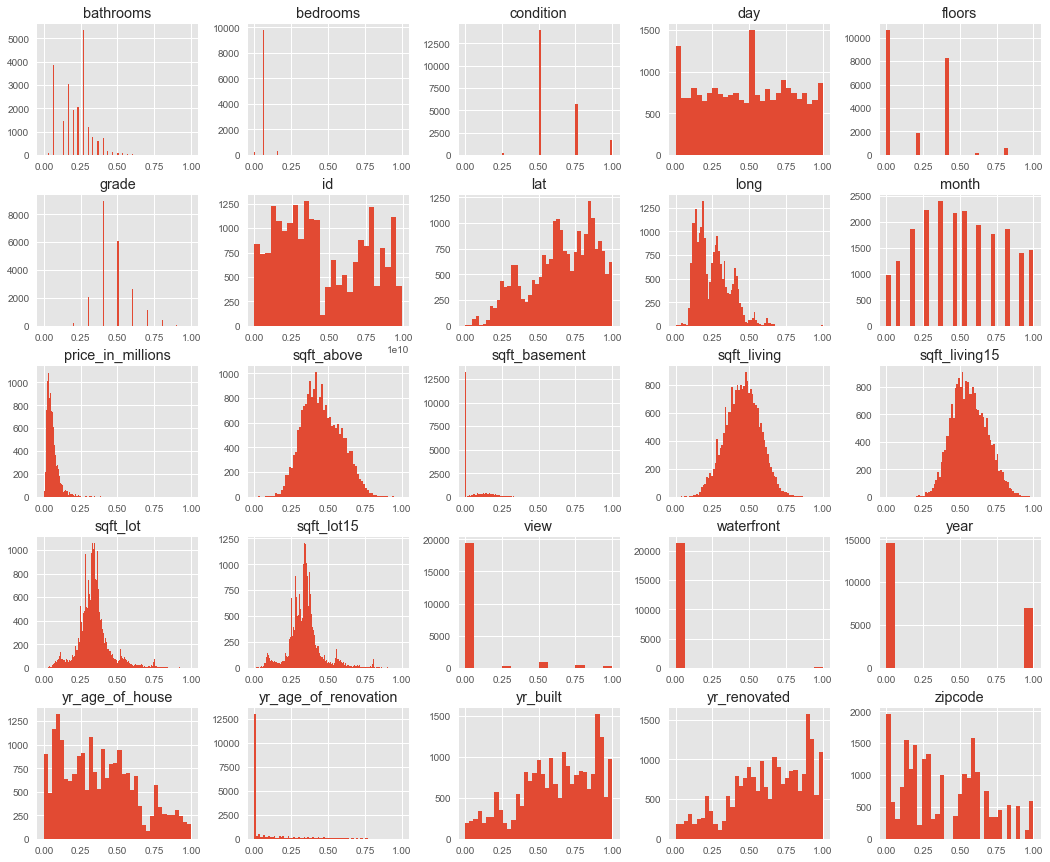

In [183]:
kclr_test.hist(figsize=(18,15), bins='auto');

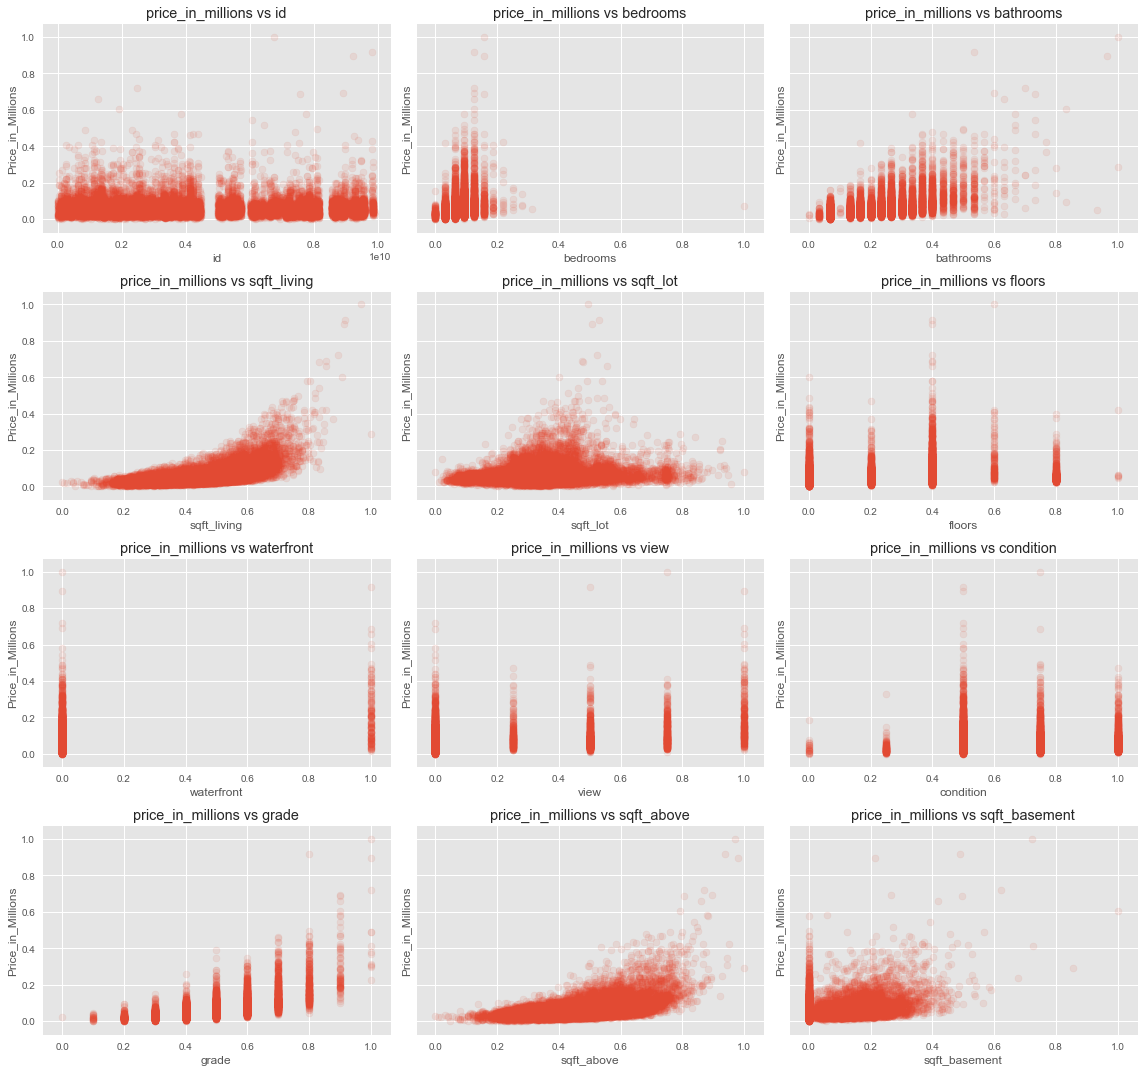

In [184]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), kclr_test.columns):
    ax.scatter(kclr_test[column], kclr_test['price_in_millions'], label=column, alpha=.1)
    ax.set_title(f'price_in_millions vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price_in_Millions')

fig.tight_layout()

In [185]:
pd.DataFrame(results, columns=['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]) # converting the array of results into dataframe for easy viewing)

ind_var  r_squared     intercept     slope        p-value  \
0               bedrooms   0.095350  2.252217e-02  0.514151   0.000000e+00   
1            sqft_living   0.374346 -5.316595e-02  0.250264   0.000000e+00   
2                 floors   0.065948  4.932092e-02  0.057337   0.000000e+00   
3             waterfront   0.065455  5.959435e-02  0.144696   0.000000e+00   
4                   view   0.154650  5.486968e-02  0.099108   0.000000e+00   
5              condition   0.001300  5.421535e-02  0.010686   1.156557e-07   
6                  grade   0.446158 -6.716645e-02  0.274413   0.000000e+00   
7             sqft_above   0.294497 -3.007611e-02  0.198159   0.000000e+00   
8          sqft_basement   0.103110  5.059881e-02  0.169612   0.000000e+00   
9               yr_built   0.002911  5.436762e-02  0.010180   2.117581e-15   
10               zipcode   0.002852  6.435421e-02 -0.009524   4.057896e-15   
11                   lat   0.094060  1.752961e-02  0.066329   0.000000e+00   
12                  long   0.000486  5.835079e-02  0.009087   1.200988e-03   
13         sqft_living15   0.295749 -6.345731e-02  0.219716   0.000000e+00   
14            sqft_lot15   0.021878  3.887573e-02  0.063159  6.772714e-106   
15                  year   0.000014  6.052885e-02  0.000384   5.838927e-01   
16                 month   0.000099  6.150918e-02 -0.001690   1.445638e-01   
17                   day   0.000216  6.185678e-02 -0.002459   3.092905e-02   
18       yr_age_of_house   0.002904  6.457181e-02 -0.010256   2.282093e-15   
19  yr_age_of_renovation   0.001130  5.970868e-02  0.008431   7.737006e-07   
20     price_in_millions   1.000000  2.591269e-16  1.000000   0.000000e+00   

    normality (JB)  
0     1.195105e+06  
1     1.655522e+06  
2     1.255748e+06  
3     9.117312e+05  
4     1.077710e+06  
5     1.136802e+06  
6     2.043899e+06  
7     1.392066e+06  
8     8.842936e+05  
9     1.142512e+06  
10    1.123392e+06  
11    1.511478e+06  
12    1.137713e+06  
13    1.914774e+06  
14    1.105628e+06  
15    1.131923e+06  
16    1.133360e+06  
17    1.130369e+06  
18    1.142372e+06  
19    1.124790e+06  
20    1.173063e+06